(20174, 65)
(5368, 65)


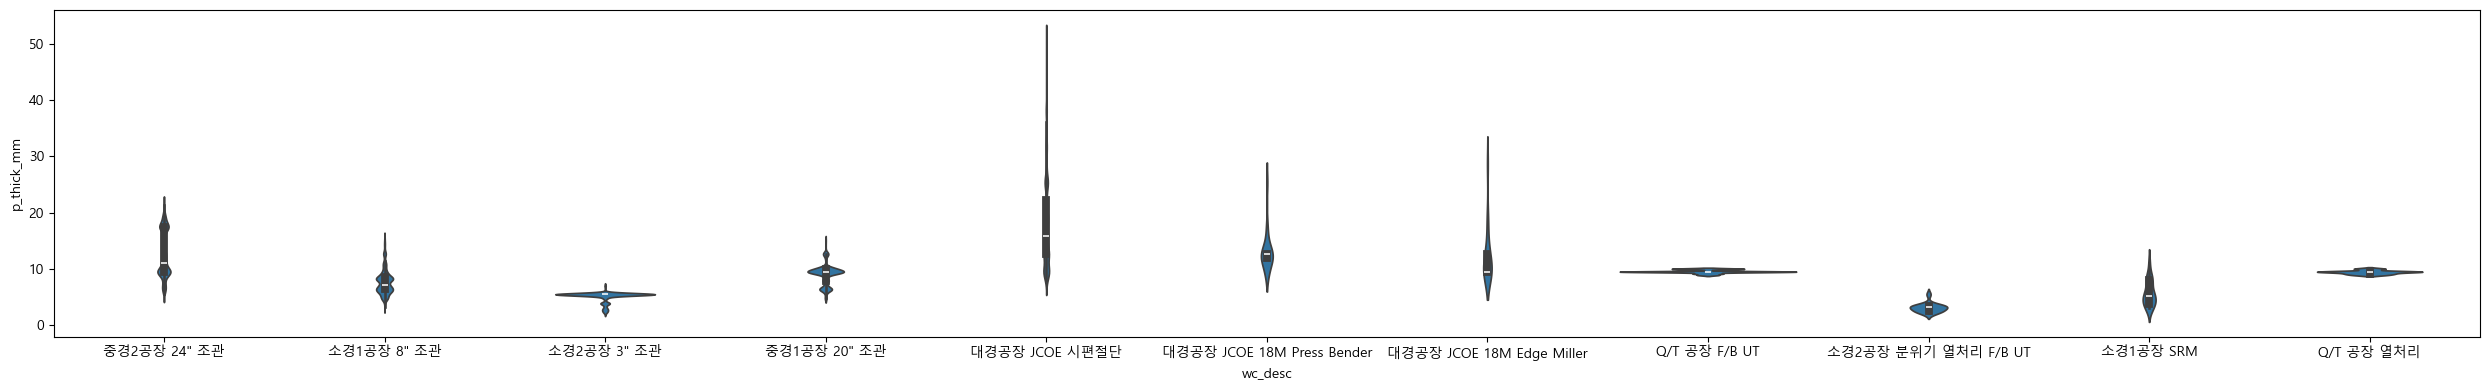

In [2]:
import plotly
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib

# 1. 사용할 한글 폰트 경로 지정 (예: 맑은고딕)
font_path = "C:/Windows/Fonts/malgun.ttf"  # 또는 NanumGothic.ttf 등
font_prop = fm.FontProperties(fname=font_path)

# 2. matplotlib에 기본 폰트로 설정
matplotlib.rcParams['font.family'] = font_prop.get_name()



data = pd.read_excel('./joined_coil_jiwoong.xlsx')

select_data = data[data['wc_desc'] == data['wc_desc'].unique()[0]]

print(data.shape)
print(select_data.shape)

fig, ax = plt.subplots(figsize = (25, 4))
#sns.scatterplot(x = data.index, y = data['wc_id'], ax = ax, hue = data['wc_desc'])
# sns.boxplot(x = data['wc_desc'], y = data['p_thick_mm'], ax = ax, zorder = 1.2)
sns.violinplot(x = data['wc_desc'], y = data['p_thick_mm'], ax = ax, zorder = 1.1)


plt.tight_layout()
plt.show()

In [17]:
data['wc_desc'].value_counts()

wc_desc
대경공장 JCOE 시편절단                9111
중경2공장 24" 조관                  5368
중경1공장 20" 조관                  2578
소경1공장 8" 조관                   1850
소경2공장 3" 조관                    791
Q/T 공장 F/B UT                  314
Q/T 공장 열처리                      57
대경공장 JCOE 18M Press Bender      36
대경공장 JCOE 18M Edge Miller       34
소경1공장 SRM                       20
소경2공장 분위기 열처리 F/B UT            15
Name: count, dtype: int64

In [27]:
data['ys1_stress'].value_counts()

ys1_stress
0.000      2836
460.444       4
427.436       3
547.977       3
326.739       3
           ... 
301.256       1
407.252       1
314.066       1
195.615       1
466.794       1
Name: count, Length: 16779, dtype: int64

In [28]:
print("p_thick_mm 값의 갯수:", data['p_thick_mm'].count())

p_thick_mm 값의 갯수: 20168


In [29]:
# 문제 설명: '중경2공장'의 갯수를 구해야 합니다. wc_desc 컬럼에서 '중경2공장'이 포함된 값의 개수를 세면 됩니다.
# 계획: wc_desc 컬럼에서 '중경2공장'이 포함된 행을 필터링하여 개수를 출력합니다.

count_junggyeong2 = data[data['wc_desc'].str.contains('중경2공장')].shape[0]
print("중경2공장 갯수:", count_junggyeong2)


중경2공장 갯수: 5368


In [32]:
# 문제 설명: '중경2공장' 데이터 중 p_thick_mm 값이 9.5 이하인 행의 개수를 구해야 합니다.
# 계획: wc_desc에 '중경2공장'이 포함된 데이터에서 p_thick_mm <= 9.5 조건을 추가하여 개수를 출력합니다.

count_junggyeong2_thin = data[(data['wc_desc'].str.contains('중경2공장')) & (data['p_thick_mm'] <= 9.5)].shape[0]
print("중경2공장 중 p_thick_mm이 9.5 이하인 갯수:", count_junggyeong2_thin)


중경2공장 중 p_thick_mm이 9.5 이하인 갯수: 2235


In [ ]:
# 전체 데이터에서 공장별 분포 확인
print("전체 공장 목록:")
print(data['wc_desc'].value_counts())
print("\n" + "="*50 + "\n")


In [ ]:
# 중경1공장 데이터만 추출
junggyeong1_data = data[data['wc_desc'].str.contains('중경1공장', na=False)]

print(f"전체 데이터 개수: {data.shape[0]:,}개")
print(f"중경1공장 데이터 개수: {junggyeong1_data.shape[0]:,}개")
print(f"중경1공장 데이터 비율: {junggyeong1_data.shape[0]/data.shape[0]*100:.2f}%")

print(f"\n중경1공장 데이터 형태: {junggyeong1_data.shape}")
print("\n중경1공장 데이터 기본 정보:")
print(junggyeong1_data.head())


In [ ]:
# 중경1공장 데이터의 주요 컬럼 통계 확인
print("중경1공장 데이터의 주요 통계:")
print("\n1. 두께(p_thick_mm) 통계:")
print(junggyeong1_data['p_thick_mm'].describe())

print("\n2. 항복강도(ys1_stress) 통계:")
print(junggyeong1_data['ys1_stress'].describe())

print("\n3. 인장강도(ys2_stress) 통계:")
print(junggyeong1_data['ys2_stress'].describe())

# 중경1공장 데이터를 별도 파일로 저장
junggyeong1_data.to_excel('./중경1공장_데이터.xlsx', index=False)
print(f"\n중경1공장 데이터를 '중경1공장_데이터.xlsx' 파일로 저장했습니다.")


In [33]:
# 문제 설명: '중경2공장' 데이터에서 p_thick_mm(두께)별로 몇 개씩 있는지 집계해야 합니다.
# 계획: wc_desc에 '중경2공장'이 포함된 데이터에서 p_thick_mm 컬럼의 값별 개수를 value_counts로 구합니다.

junggyeong2_data = data[data['wc_desc'].str.contains('중경2공장')]
thickness_counts = junggyeong2_data['p_thick_mm'].value_counts().sort_index()
print("중경2공장 두께별 갯수:")
print(thickness_counts)


중경2공장 두께별 갯수:
p_thick_mm
5.60        4
6.30        2
6.35       18
6.40      315
7.00      113
7.10       12
7.80       81
7.90       82
7.92       12
8.00       11
8.40        6
8.70        6
8.89        4
9.00       34
9.30      143
9.50     1392
9.53       40
9.65       53
10.00      33
10.16       2
10.30       8
10.40      16
11.05     368
11.10       6
11.13      28
11.90      78
12.00     118
12.57       7
12.70     405
14.00      39
14.30      73
15.09      46
15.10       4
15.90      70
16.00      76
16.13      34
17.40       1
17.50    1169
18.10      16
19.00       6
19.10     382
20.60      54
21.40       1
Name: count, dtype: int64


In [3]:
# 데이터의 기본 정보 확인
print("전체 데이터 컬럼:")
print(data.columns.tolist())
print("\n공장별 데이터 개수:")
print(data['wc_desc'].value_counts())


전체 데이터 컬럼:
['m_heat_no', 'm_coil_no', 'in_comp', 'ms_date', 'cr_date', 'pcm', 'ceq', 'c', 'si', 'mn', 'p', 's', 's_al', 't_al', 'cr', 'ni', 'b', 'ca', 'cu', 'fe', 'h', 'mg', 'mo', 'n', 'nb', 'o', 'sn', 'ti', 'v', 'co', 'sb', 'zinc_coating', 'hardness', 'm_ys', 'm_ts', 'm_el', 'sur_thk', 'sur_wdt', 'sur_len', 'sp_no_dt', 'wo_no', 'wc_id', 'wc_desc', 'factory_id', 'factory_desc', 'batch_no', 'p_spec', 'p_od_c', 'p_thick_mm', 'i_heat_no', 'i_coil_no', 'pipe_no', 'sp_vec', 'quality', 'vendor_desc', 'i_ys', 'i_ts', 'i_el', 'ys1_load', 'ys1_stress', 'ys2_load', 'ys2_stress', 'ts_stress', 'elongation', 'create_date']

공장별 데이터 개수:
wc_desc
대경공장 JCOE 시편절단                9111
중경2공장 24" 조관                  5368
중경1공장 20" 조관                  2578
소경1공장 8" 조관                   1850
소경2공장 3" 조관                    791
Q/T 공장 F/B UT                  314
Q/T 공장 열처리                      57
대경공장 JCOE 18M Press Bender      36
대경공장 JCOE 18M Edge Miller       34
소경1공장 SRM                       20
소경2공장 분위기 열

In [4]:
# 중경2공장 데이터 필터링
junggyeong2_data = data[data['wc_desc'] == '중경2공장']
print(f"중경2공장 데이터 개수: {len(junggyeong2_data)}")

# 두께와 품질 컬럼 확인
thickness_cols = [col for col in data.columns if 'thick' in col.lower()]
quality_cols = [col for col in data.columns if 'quality' in col.lower()]

print(f"\n두께 관련 컬럼: {thickness_cols}")
print(f"품질 관련 컬럼: {quality_cols}")

# 실제 데이터 확인
if thickness_cols and quality_cols:
    print(f"\n중경2공장 두께 데이터 요약:")
    print(junggyeong2_data[thickness_cols[0]].describe())
    print(f"\n중경2공장 품질 데이터 요약:")
    print(junggyeong2_data[quality_cols[0]].describe())


중경2공장 데이터 개수: 0

두께 관련 컬럼: ['p_thick_mm']
품질 관련 컬럼: ['quality']

중경2공장 두께 데이터 요약:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: p_thick_mm, dtype: float64

중경2공장 품질 데이터 요약:
count       0
unique      0
top       NaN
freq      NaN
Name: quality, dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_14896\1728408782.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\DELL\Desktop\jiwoong-data-anal\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


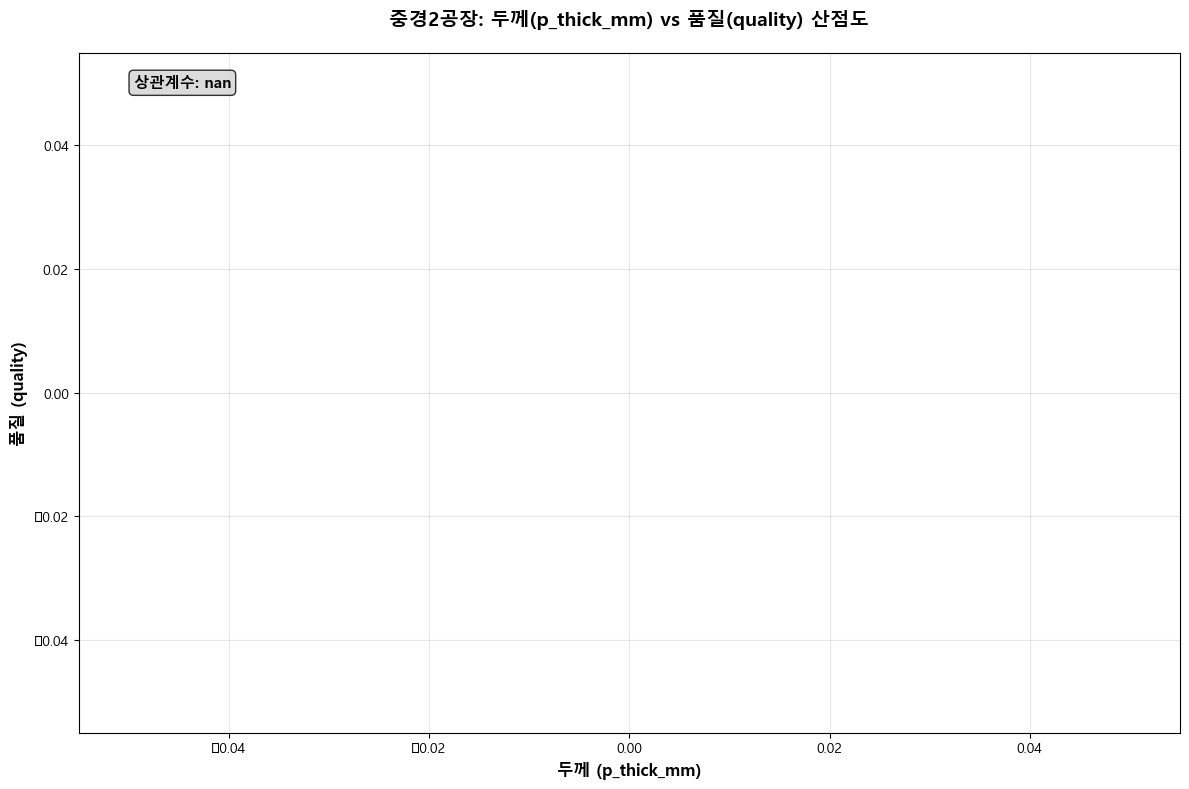

분석 완료:
- 총 데이터 포인트: 0
- 두께와 품질 간 상관계수: nan


In [5]:
# 중경2공장 두께 vs 품질 산점도 시각화
plt.figure(figsize=(12, 8))

# 결측치 제거
clean_data = junggyeong2_data.dropna(subset=['p_thick_mm', 'quality'])

# 산점도 그리기
plt.scatter(clean_data['p_thick_mm'], clean_data['quality'], 
           alpha=0.6, s=50, c='steelblue', edgecolors='white', linewidth=0.5)

plt.xlabel('두께 (p_thick_mm)', fontsize=12, fontweight='bold')
plt.ylabel('품질 (quality)', fontsize=12, fontweight='bold')
plt.title('중경2공장: 두께(p_thick_mm) vs 품질(quality) 산점도', fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)

# 상관계수 계산 및 표시
correlation = clean_data['p_thick_mm'].corr(clean_data['quality'])
plt.text(0.05, 0.95, f'상관계수: {correlation:.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8),
         fontsize=11, fontweight='bold')

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"분석 완료:")
print(f"- 총 데이터 포인트: {len(clean_data)}")
print(f"- 두께와 품질 간 상관계수: {correlation:.3f}")


In [34]:
# 문제 설명: '중경2공장' 데이터에서 quality 컬럼의 값 개수를 구해야 합니다.
# 계획: wc_desc에 '중경2공장'이 포함된 데이터에서 quality 컬럼의 value_counts를 출력합니다.

junggyeong2_quality_counts = data[data['wc_desc'].str.contains('중경2공장')]['quality'].value_counts()
print("중경2공장 quality별 갯수:")
print(junggyeong2_quality_counts)


중경2공장 quality별 갯수:
quality
POSHP300Y-D        736
API-X52L2C         652
API-X56L2-D        632
SPHT3U             341
API-POSJ55CAD-D    326
SPHT3-D            311
STK490             250
SPHT3              217
API-X65L2          180
JFE-HP410E         153
SNT355E            120
API-X52MS*CVE      105
SHT460             102
API-X65*KGC         96
API-X52L2*PLP       84
API-X52L2Y          81
API-X52L2C-D        78
API-X65MS*EOG       72
SHT460Z             67
POSH690-D           63
API-X52L2*P66       62
API-POSJ55C-D       58
API-X52MS*MOM       54
SHT460-D            49
API-POSJ55C         47
API-X70L2           42
API-X65L2*WIL-D     36
API-X65L2-D         34
API-X52MS*CVE-D     30
API-K55C            26
API-X60L2I          24
API-X56L2           22
API-X65L2*KRE       22
API-X65L2*HALA      22
API-X52MS*SGEN      22
API-HDJ55C          17
STK490*CENO         16
API-X65MO           16
API-X65L2*WILC      15
STK490-D            12
API-X52             12
API-X52L2*KRE       12
API-X65

In [1]:
# 문제 설명: '중경2공장' 데이터에서 두께(p_thick_mm)와 품질(quality) 간의 관계를 산점도로 시각화하고자 합니다.
# 계획: wc_desc에 '중경2공장'이 포함된 데이터를 추출한 후, p_thick_mm을 x축, quality를 y축으로 하여 scatter plot을 그립니다.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(junggyeong2_data['p_thick_mm'], junggyeong2_data['quality'], alpha=0.5)
plt.xlabel('p_thick_mm')
plt.ylabel('quality')
plt.title('중경2공장: 두께(p_thick_mm) vs 품질(quality) 산점도')
plt.grid(True)
plt.show()


NameError: name 'junggyeong2_data' is not defined

<Figure size 1000x600 with 0 Axes>

In [6]:
# 문제 해결: 올바른 중경2공장 데이터 필터링
# 기존 코드에서는 정확한 문자열 매칭('중경2공장')을 사용했지만, 
# 실제 데이터에서는 str.contains를 사용해야 합니다.

print("실제 데이터의 공장명(wc_desc) 확인:")
print(data['wc_desc'].unique())

# 올바른 중경2공장 데이터 필터링
junggyeong2_data = data[data['wc_desc'].str.contains('중경2공장', na=False)]
print(f"\n중경2공장 데이터 개수: {len(junggyeong2_data)}")

# 두께와 품질 데이터 확인
print(f"\n중경2공장 두께 데이터 요약:")
print(junggyeong2_data['p_thick_mm'].describe())
print(f"\n중경2공장 품질 데이터 요약:")
print(junggyeong2_data['quality'].describe())


실제 데이터의 공장명(wc_desc) 확인:
['중경2공장 24" 조관' '소경1공장 8" 조관' '소경2공장 3" 조관' '중경1공장 20" 조관'
 '대경공장 JCOE 시편절단' '대경공장 JCOE 18M Press Bender' '대경공장 JCOE 18M Edge Miller'
 'Q/T 공장 F/B UT' '소경2공장 분위기 열처리 F/B UT' '소경1공장 SRM' 'Q/T 공장 열처리']

중경2공장 데이터 개수: 5368

중경2공장 두께 데이터 요약:
count    5368.000000
mean       12.582835
std         4.099199
min         5.600000
25%         9.500000
50%        11.050000
75%        17.500000
max        21.400000
Name: p_thick_mm, dtype: float64

중경2공장 품질 데이터 요약:
count            5368
unique             50
top       POSHP300Y-D
freq              736
Name: quality, dtype: object


quality 컬럼의 고유값 확인:
quality
POSHP300Y-D        736
API-X52L2C         652
API-X56L2-D        632
SPHT3U             341
API-POSJ55CAD-D    326
SPHT3-D            311
STK490             250
SPHT3              217
API-X65L2          180
JFE-HP410E         153
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['POSHP300Y-D', 'API-X52L2C', 'API-X56L2-D', 'SPHT3U', 'API-POSJ55CAD-D']
필터링된 데이터 개수: 2687


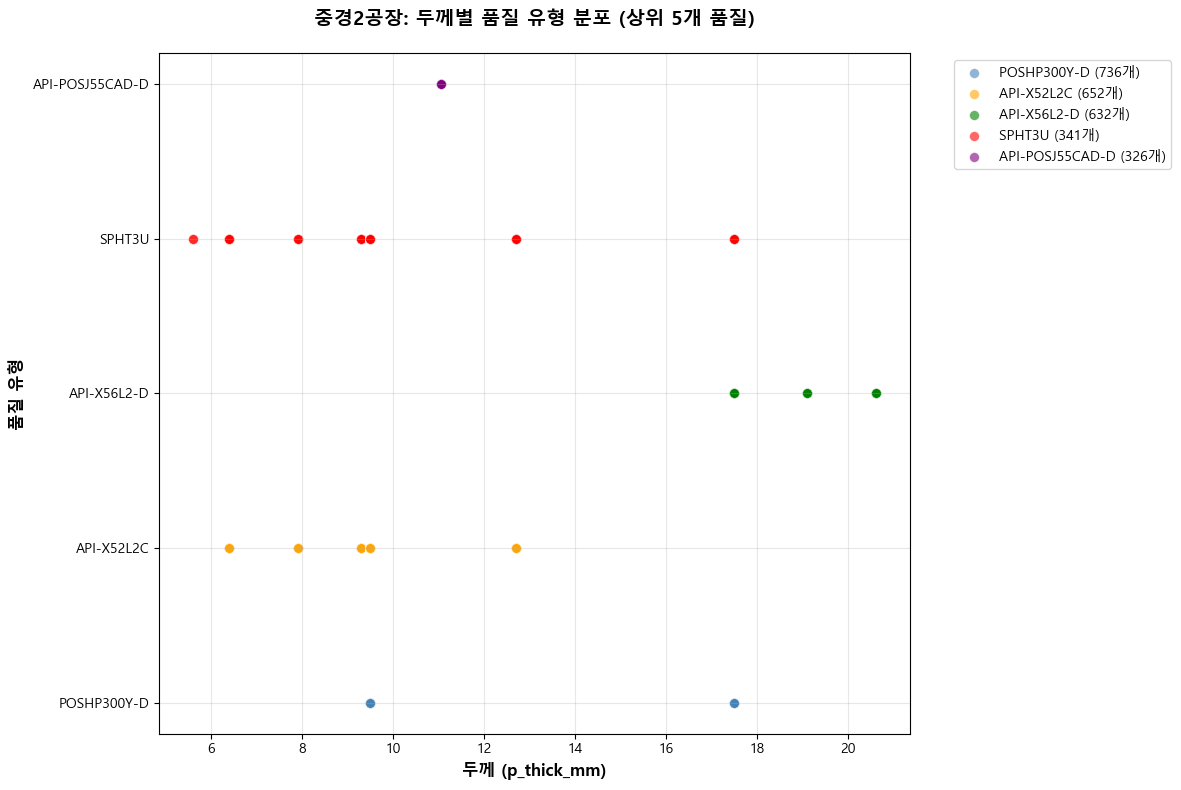


분석 완료:
- 전체 데이터 포인트: 5368
- 상위 5개 품질 유형 데이터 포인트: 2687
- 품질은 문자열 데이터이므로 상관계수 대신 분포를 시각화했습니다.


In [8]:
# 중경2공장 두께 vs 품질 산점도 시각화 (수정된 버전)

# 결측치 제거
clean_data = junggyeong2_data.dropna(subset=['p_thick_mm', 'quality'])

# quality 컬럼의 데이터 타입 확인
print("quality 컬럼의 고유값 확인:")
quality_counts = clean_data['quality'].value_counts()
print(quality_counts.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities = quality_counts.head(5).index.tolist()
filtered_data = clean_data[clean_data['quality'].isin(top_5_qualities)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities}")
print(f"필터링된 데이터 개수: {len(filtered_data)}")

# 색상 맵 설정 (각 품질 유형별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']
color_map = dict(zip(top_5_qualities, colors))

plt.figure(figsize=(12, 8))

# 각 품질 유형별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities):
    quality_data = filtered_data[filtered_data['quality'] == quality_type]
    plt.scatter(quality_data['p_thick_mm'], [i] * len(quality_data), 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('두께 (p_thick_mm)', fontsize=12, fontweight='bold')
plt.ylabel('품질 유형', fontsize=12, fontweight='bold')
plt.title('중경2공장: 두께별 품질 유형 분포 (상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.yticks(range(len(top_5_qualities)), top_5_qualities)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- 전체 데이터 포인트: {len(clean_data)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(filtered_data)}")
print(f"- 품질은 문자열 데이터이므로 상관계수 대신 분포를 시각화했습니다.")


p_spec 컬럼의 고유값 확인:
p_spec
NX42L1       858
N5LBT        753
NX52L2T      609
NX56L2KDD    588
NX52L2       384
J55CBTBAD    322
NX65L2       300
N5LBTC350    234
J55CPAN      122
SNT355E      121
Name: count, dtype: int64

가장 많은 5개 p_spec 유형: ['NX42L1', 'N5LBT', 'NX52L2T', 'NX56L2KDD', 'NX52L2']
필터링된 데이터 개수: 3192


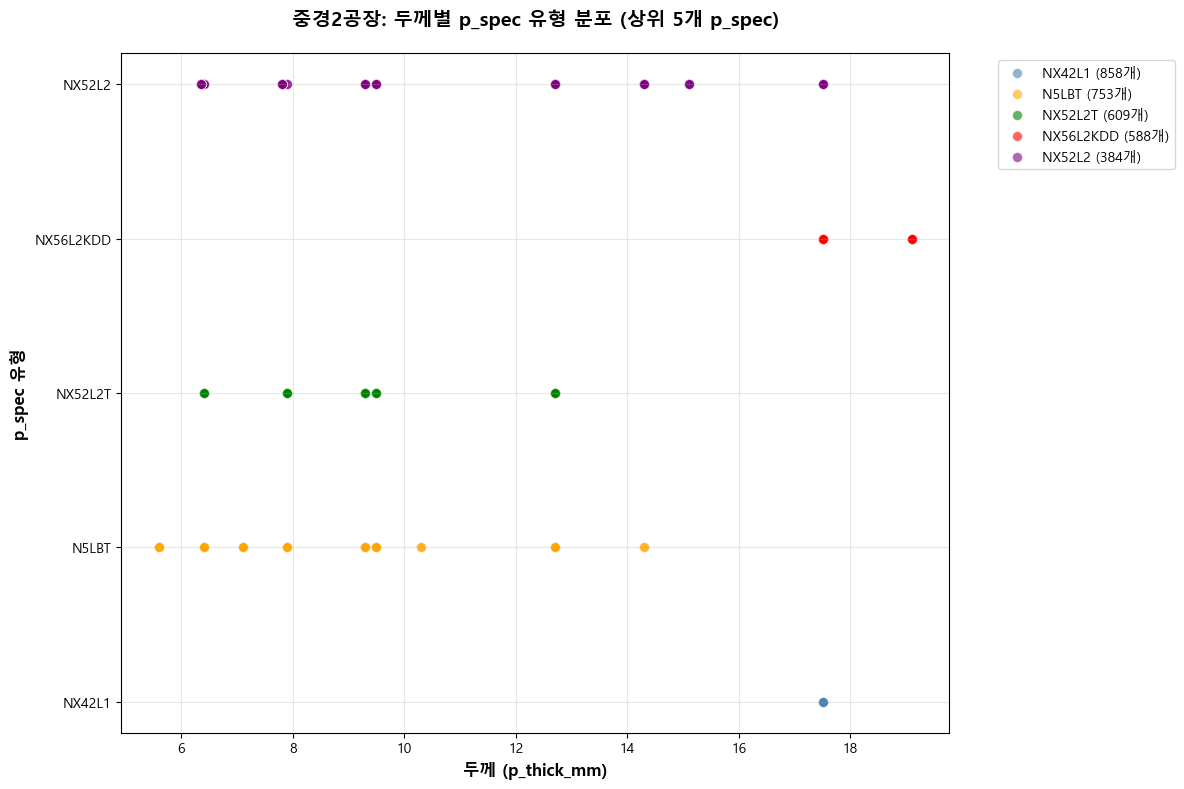


분석 완료:
- 전체 데이터 포인트: 5368
- 상위 5개 p_spec 유형 데이터 포인트: 3192
- p_spec별 두께 분포를 시각화했습니다.


In [9]:
# 중경2공장 두께 vs p_spec 산점도 시각화

# 결측치 제거
clean_data_spec = junggyeong2_data.dropna(subset=['p_thick_mm', 'p_spec'])

# p_spec 컬럼의 데이터 타입 확인
print("p_spec 컬럼의 고유값 확인:")
spec_counts = clean_data_spec['p_spec'].value_counts()
print(spec_counts.head(10))

# 가장 많은 5개의 p_spec 값만 선택
top_5_specs = spec_counts.head(5).index.tolist()
filtered_data_spec = clean_data_spec[clean_data_spec['p_spec'].isin(top_5_specs)]

print(f"\n가장 많은 5개 p_spec 유형: {top_5_specs}")
print(f"필터링된 데이터 개수: {len(filtered_data_spec)}")

# 색상 맵 설정 (각 p_spec 유형별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']
color_map = dict(zip(top_5_specs, colors))

plt.figure(figsize=(12, 8))

# 각 p_spec 유형별로 산점도 그리기
for i, spec_type in enumerate(top_5_specs):
    spec_data = filtered_data_spec[filtered_data_spec['p_spec'] == spec_type]
    plt.scatter(spec_data['p_thick_mm'], [i] * len(spec_data), 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{spec_type} ({len(spec_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('두께 (p_thick_mm)', fontsize=12, fontweight='bold')
plt.ylabel('p_spec 유형', fontsize=12, fontweight='bold')
plt.title('중경2공장: 두께별 p_spec 유형 분포 (상위 5개 p_spec)', fontsize=14, fontweight='bold', pad=20)
plt.yticks(range(len(top_5_specs)), top_5_specs)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- 전체 데이터 포인트: {len(clean_data_spec)}")
print(f"- 상위 5개 p_spec 유형 데이터 포인트: {len(filtered_data_spec)}")
print(f"- p_spec별 두께 분포를 시각화했습니다.")


In [10]:
# 중경2공장 데이터에서 pcm, ceq, hardness 값이 0인 데이터 필터링

print("필터링 전 중경2공장 데이터 개수:", len(junggyeong2_data))

# 각 컬럼의 0값 개수 확인
print("\n각 컬럼의 0값 개수:")
print(f"pcm = 0인 개수: {(junggyeong2_data['pcm'] == 0).sum()}")
print(f"ceq = 0인 개수: {(junggyeong2_data['ceq'] == 0).sum()}")
print(f"hardness = 0인 개수: {(junggyeong2_data['hardness'] == 0).sum()}")

# pcm, ceq, hardness 값이 0이 아닌 데이터만 필터링
filtered_junggyeong2_data = junggyeong2_data[
    (junggyeong2_data['pcm'] != 0) & 
    (junggyeong2_data['ceq'] != 0) & 
    (junggyeong2_data['hardness'] != 0)
]

print(f"\n필터링 후 중경2공장 데이터 개수: {len(filtered_junggyeong2_data)}")
print(f"제거된 데이터 개수: {len(junggyeong2_data) - len(filtered_junggyeong2_data)}")

# 필터링된 데이터의 기본 통계 확인
print(f"\n필터링된 데이터의 pcm, ceq, hardness 기본 통계:")
print("pcm 통계:")
print(filtered_junggyeong2_data['pcm'].describe())
print("\nceq 통계:")
print(filtered_junggyeong2_data['ceq'].describe())
print("\nhardness 통계:")
print(filtered_junggyeong2_data['hardness'].describe())


필터링 전 중경2공장 데이터 개수: 5368

각 컬럼의 0값 개수:
pcm = 0인 개수: 2525
ceq = 0인 개수: 2210
hardness = 0인 개수: 2715

필터링 후 중경2공장 데이터 개수: 1368
제거된 데이터 개수: 4000

필터링된 데이터의 pcm, ceq, hardness 기본 통계:
pcm 통계:
count    1368.000000
mean        0.124493
std         0.014022
min         0.095000
25%         0.119000
50%         0.125000
75%         0.129000
max         0.175000
Name: pcm, dtype: float64

ceq 통계:
count    1368.000000
mean        0.238550
std         0.040759
min         0.139000
25%         0.233000
50%         0.239000
75%         0.246000
max         0.364000
Name: ceq, dtype: float64

hardness 통계:
count    1368.000000
mean      166.208333
std        11.896711
min       138.800000
25%       158.500000
50%       163.000000
75%       170.000000
max       205.000000
Name: hardness, dtype: float64


필터링된 데이터의 quality 컬럼 고유값 확인:
quality
API-X52L2C         652
API-X52MS*CVE      105
API-X65*KGC         96
API-X52L2*PLP       84
API-X52L2Y          81
API-X52L2C-D        78
API-X52L2*P66       62
API-X52MS*MOM       54
API-X52MS*CVE-D     30
API-X60L2I          24
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['API-X52L2C', 'API-X52MS*CVE', 'API-X65*KGC', 'API-X52L2*PLP', 'API-X52L2Y']
최종 필터링된 데이터 개수: 1018


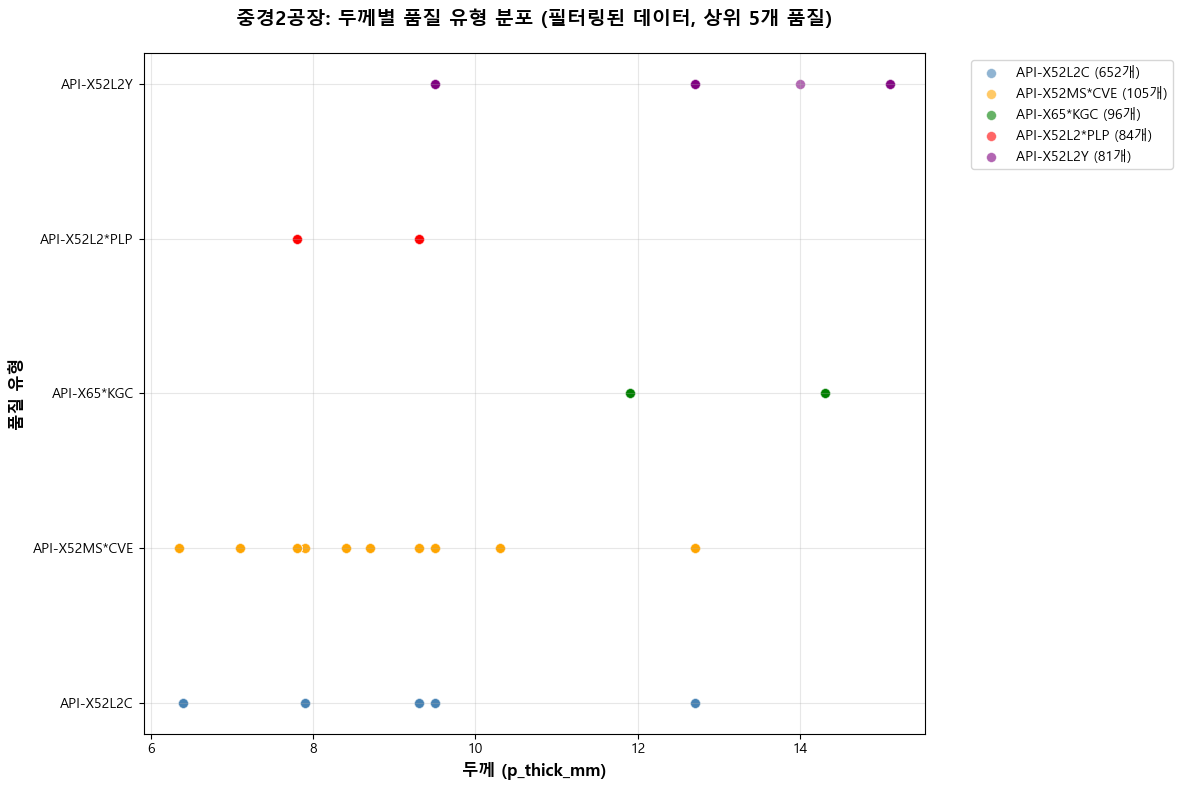


분석 완료:
- 필터링된 전체 데이터 포인트: 1368
- 상위 5개 품질 유형 데이터 포인트: 1018
- pcm, ceq, hardness가 0이 아닌 데이터로 필터링된 결과입니다.


In [11]:
# 필터링된 중경2공장 데이터로 두께 vs 품질 산점도 시각화 (상위 5개 품질)

# 결측치 제거
clean_filtered_data = filtered_junggyeong2_data.dropna(subset=['p_thick_mm', 'quality'])

# quality 컬럼의 데이터 타입 확인
print("필터링된 데이터의 quality 컬럼 고유값 확인:")
quality_counts_filtered = clean_filtered_data['quality'].value_counts()
print(quality_counts_filtered.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_filtered = quality_counts_filtered.head(5).index.tolist()
final_filtered_data = clean_filtered_data[clean_filtered_data['quality'].isin(top_5_qualities_filtered)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_filtered}")
print(f"최종 필터링된 데이터 개수: {len(final_filtered_data)}")

# 색상 맵 설정 (각 품질 유형별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']
color_map = dict(zip(top_5_qualities_filtered, colors))

plt.figure(figsize=(12, 8))

# 각 품질 유형별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_filtered):
    quality_data = final_filtered_data[final_filtered_data['quality'] == quality_type]
    plt.scatter(quality_data['p_thick_mm'], [i] * len(quality_data), 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('두께 (p_thick_mm)', fontsize=12, fontweight='bold')
plt.ylabel('품질 유형', fontsize=12, fontweight='bold')
plt.title('중경2공장: 두께별 품질 유형 분포 (필터링된 데이터, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.yticks(range(len(top_5_qualities_filtered)), top_5_qualities_filtered)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- 필터링된 전체 데이터 포인트: {len(clean_filtered_data)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(final_filtered_data)}")
print(f"- pcm, ceq, hardness가 0이 아닌 데이터로 필터링된 결과입니다.")


필터링된 데이터의 p_spec 컬럼 고유값 확인:
p_spec
NX52L2T       609
NX52L2        384
NX65KGC        96
NX52MS         76
Z359C2SSCG     61
NX65L2         54
Z359C2         33
NX60L2         24
Z359C2CGCO     12
N5LBT           8
Name: count, dtype: int64

가장 많은 5개 품종(p_spec) 유형: ['NX52L2T', 'NX52L2', 'NX65KGC', 'NX52MS', 'Z359C2SSCG']
최종 필터링된 데이터 개수: 1226


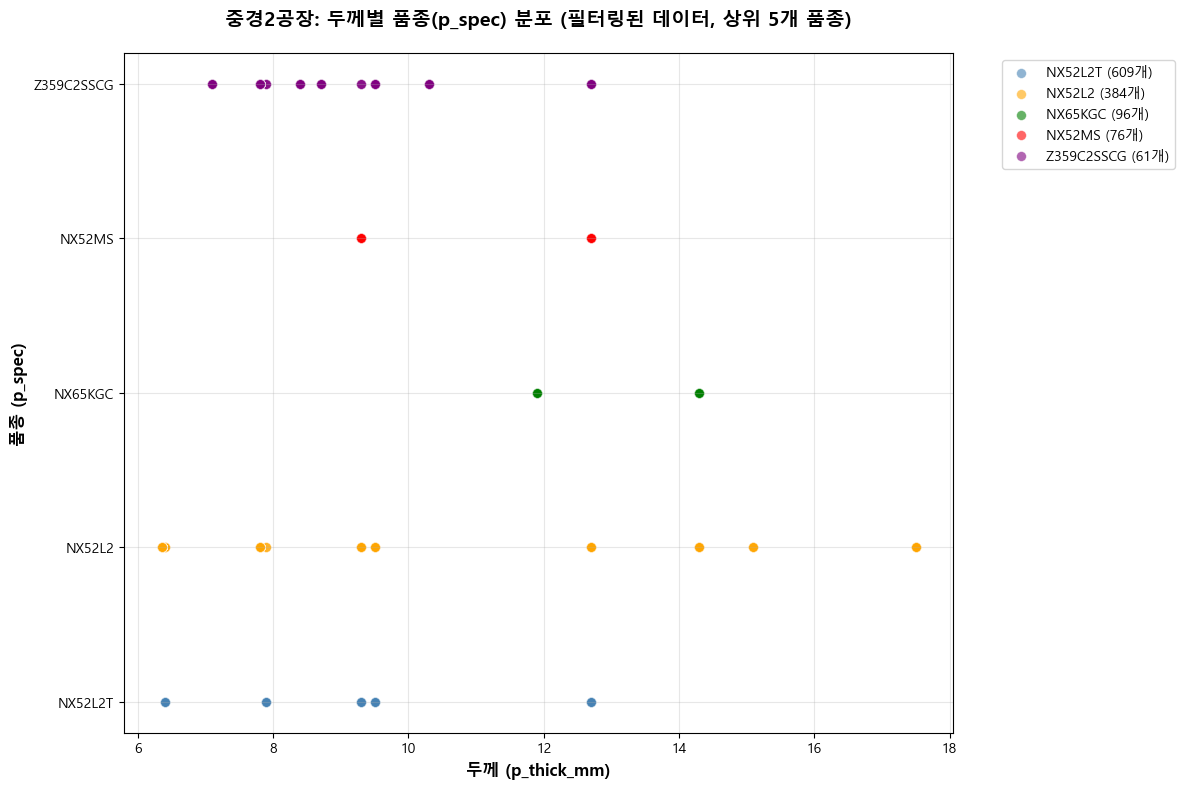


분석 완료:
- 필터링된 전체 데이터 포인트: 1368
- 상위 5개 품종 데이터 포인트: 1226
- pcm, ceq, hardness가 0이 아닌 데이터로 필터링된 결과입니다.


In [12]:
# 필터링된 중경2공장 데이터로 두께 vs p_spec(품종) 산점도 시각화 (상위 5개 품종)

# 결측치 제거
clean_filtered_data_spec = filtered_junggyeong2_data.dropna(subset=['p_thick_mm', 'p_spec'])

# p_spec 컬럼의 데이터 타입 확인
print("필터링된 데이터의 p_spec 컬럼 고유값 확인:")
spec_counts_filtered = clean_filtered_data_spec['p_spec'].value_counts()
print(spec_counts_filtered.head(10))

# 가장 많은 5개의 p_spec 값만 선택
top_5_specs_filtered = spec_counts_filtered.head(5).index.tolist()
final_filtered_data_spec = clean_filtered_data_spec[clean_filtered_data_spec['p_spec'].isin(top_5_specs_filtered)]

print(f"\n가장 많은 5개 품종(p_spec) 유형: {top_5_specs_filtered}")
print(f"최종 필터링된 데이터 개수: {len(final_filtered_data_spec)}")

# 색상 맵 설정 (각 품종별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']
color_map = dict(zip(top_5_specs_filtered, colors))

plt.figure(figsize=(12, 8))

# 각 품종별로 산점도 그리기
for i, spec_type in enumerate(top_5_specs_filtered):
    spec_data = final_filtered_data_spec[final_filtered_data_spec['p_spec'] == spec_type]
    plt.scatter(spec_data['p_thick_mm'], [i] * len(spec_data), 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{spec_type} ({len(spec_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('두께 (p_thick_mm)', fontsize=12, fontweight='bold')
plt.ylabel('품종 (p_spec)', fontsize=12, fontweight='bold')
plt.title('중경2공장: 두께별 품종(p_spec) 분포 (필터링된 데이터, 상위 5개 품종)', fontsize=14, fontweight='bold', pad=20)
plt.yticks(range(len(top_5_specs_filtered)), top_5_specs_filtered)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- 필터링된 전체 데이터 포인트: {len(clean_filtered_data_spec)}")
print(f"- 상위 5개 품종 데이터 포인트: {len(final_filtered_data_spec)}")
print(f"- pcm, ceq, hardness가 0이 아닌 데이터로 필터링된 결과입니다.")


필터링된 데이터의 quality 컬럼 고유값 확인:
quality
API-X52L2C         652
API-X52MS*CVE      105
API-X65*KGC         96
API-X52L2*PLP       84
API-X52L2Y          81
API-X52L2C-D        78
API-X52L2*P66       62
API-X52MS*MOM       54
API-X52MS*CVE-D     30
API-X60L2I          24
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['API-X52L2C', 'API-X52MS*CVE', 'API-X65*KGC', 'API-X52L2*PLP', 'API-X52L2Y']
최종 필터링된 데이터 개수: 1018


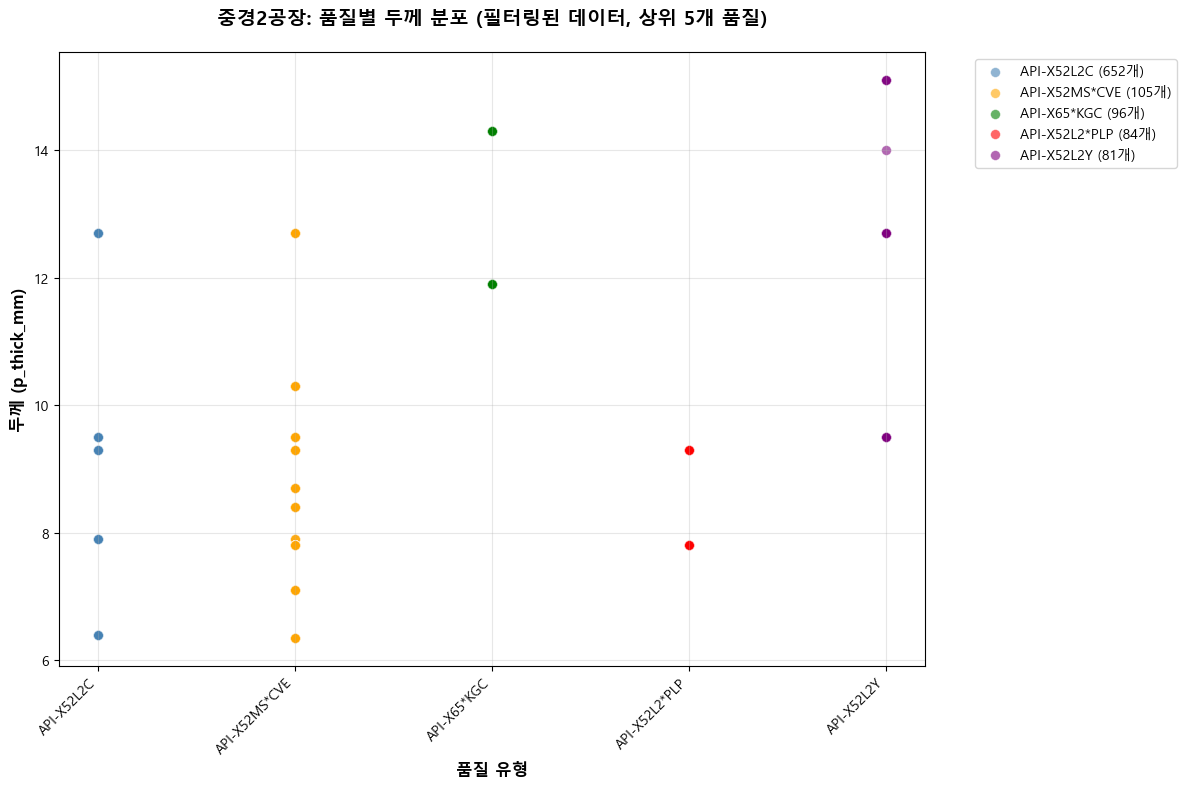


분석 완료:
- 필터링된 전체 데이터 포인트: 1368
- 상위 5개 품질 유형 데이터 포인트: 1018
- x축: 품질, y축: 두께로 축을 바꿔서 시각화했습니다.


In [13]:
# 필터링된 중경2공장 데이터로 품질 vs 두께 산점도 시각화 (x축: 품질, y축: 두께)

# 결측치 제거
clean_filtered_data_xy = filtered_junggyeong2_data.dropna(subset=['quality', 'p_thick_mm'])

# quality 컬럼의 데이터 타입 확인
print("필터링된 데이터의 quality 컬럼 고유값 확인:")
quality_counts_xy = clean_filtered_data_xy['quality'].value_counts()
print(quality_counts_xy.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_xy = quality_counts_xy.head(5).index.tolist()
final_filtered_data_xy = clean_filtered_data_xy[clean_filtered_data_xy['quality'].isin(top_5_qualities_xy)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_xy}")
print(f"최종 필터링된 데이터 개수: {len(final_filtered_data_xy)}")

# 색상 맵 설정 (각 품질별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']
color_map = dict(zip(top_5_qualities_xy, colors))

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_xy):
    quality_data = final_filtered_data_xy[final_filtered_data_xy['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['p_thick_mm'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('두께 (p_thick_mm)', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 두께 분포 (필터링된 데이터, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_xy)), top_5_qualities_xy, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- 필터링된 전체 데이터 포인트: {len(clean_filtered_data_xy)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(final_filtered_data_xy)}")
print(f"- x축: 품질, y축: 두께로 축을 바꿔서 시각화했습니다.")


필터링된 데이터의 quality 컬럼 고유값 확인:
quality
API-X52L2C         652
API-X52MS*CVE      105
API-X65*KGC         96
API-X52L2*PLP       84
API-X52L2Y          81
API-X52L2C-D        78
API-X52L2*P66       62
API-X52MS*MOM       54
API-X52MS*CVE-D     30
API-X60L2I          24
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['API-X52L2C', 'API-X52MS*CVE', 'API-X65*KGC', 'API-X52L2*PLP', 'API-X52L2Y']
최종 필터링된 데이터 개수: 1018

TS_STRESS 기본 통계:
count    1018.000000
mean      546.214675
std        27.787028
min       498.547000
25%       528.733250
50%       541.293500
75%       554.842250
max       641.383000
Name: ts_stress, dtype: float64


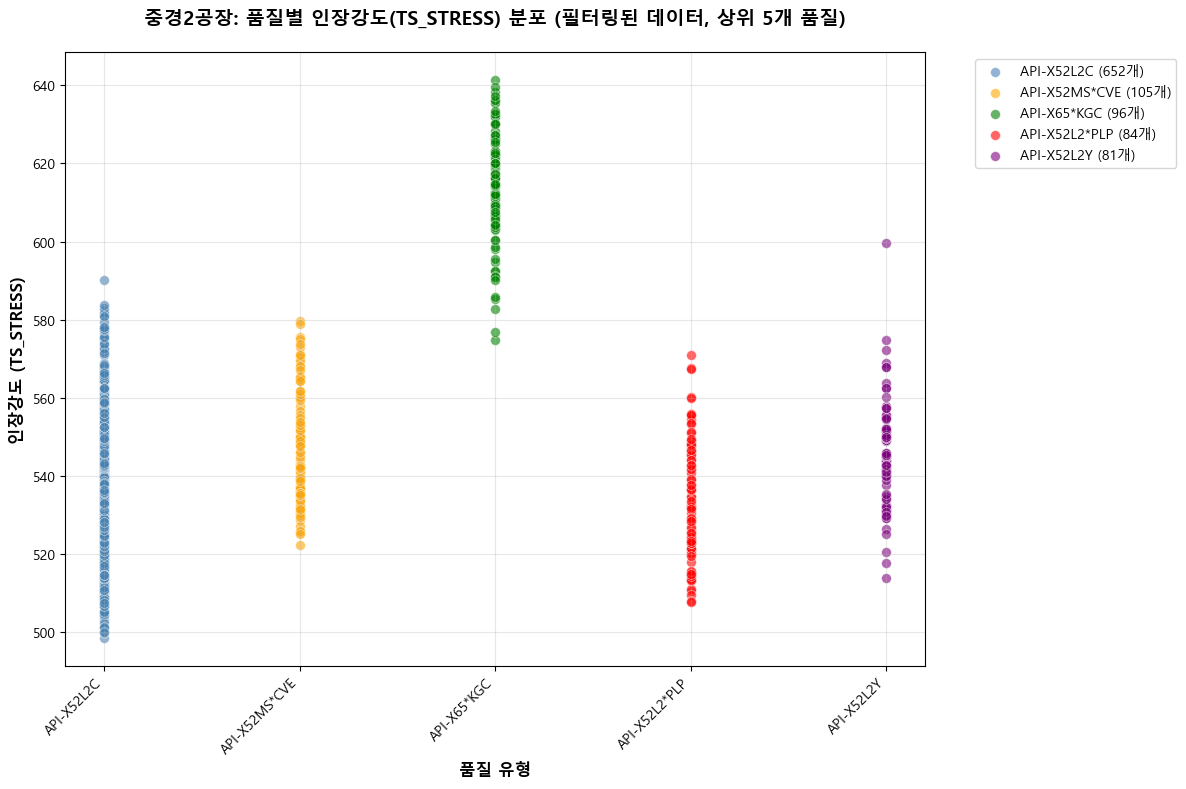


분석 완료:
- 필터링된 전체 데이터 포인트: 1368
- 상위 5개 품질 유형 데이터 포인트: 1018
- x축: 품질, y축: TS_STRESS로 시각화했습니다.


In [14]:
# 필터링된 중경2공장 데이터로 품질 vs TS_STRESS 산점도 시각화 (x축: 품질, y축: TS_STRESS)

# 결측치 제거
clean_filtered_data_ts = filtered_junggyeong2_data.dropna(subset=['quality', 'ts_stress'])

# quality 컬럼의 데이터 타입 확인
print("필터링된 데이터의 quality 컬럼 고유값 확인:")
quality_counts_ts = clean_filtered_data_ts['quality'].value_counts()
print(quality_counts_ts.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_ts = quality_counts_ts.head(5).index.tolist()
final_filtered_data_ts = clean_filtered_data_ts[clean_filtered_data_ts['quality'].isin(top_5_qualities_ts)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_ts}")
print(f"최종 필터링된 데이터 개수: {len(final_filtered_data_ts)}")

# TS_STRESS 데이터 기본 통계
print(f"\nTS_STRESS 기본 통계:")
print(final_filtered_data_ts['ts_stress'].describe())

# 색상 맵 설정 (각 품질별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']
color_map = dict(zip(top_5_qualities_ts, colors))

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_ts):
    quality_data = final_filtered_data_ts[final_filtered_data_ts['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['ts_stress'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('인장강도 (TS_STRESS)', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 인장강도(TS_STRESS) 분포 (필터링된 데이터, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_ts)), top_5_qualities_ts, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- 필터링된 전체 데이터 포인트: {len(clean_filtered_data_ts)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(final_filtered_data_ts)}")
print(f"- x축: 품질, y축: TS_STRESS로 시각화했습니다.")


In [15]:
# 필터링된 중경2공장 데이터로 품질 vs (TS_STRESS-TS) 산점도 시각화

# TS_STRESS-TS 새로운 컬럼 생성
filtered_junggyeong2_data_copy = filtered_junggyeong2_data.copy()
filtered_junggyeong2_data_copy['ts_diff'] = filtered_junggyeong2_data_copy['ts_stress'] - filtered_junggyeong2_data_copy['ts']

# 결측치 제거
clean_filtered_data_ts_diff = filtered_junggyeong2_data_copy.dropna(subset=['quality', 'ts_diff'])

# quality 컬럼의 데이터 타입 확인
print("필터링된 데이터의 quality 컬럼 고유값 확인:")
quality_counts_ts_diff = clean_filtered_data_ts_diff['quality'].value_counts()
print(quality_counts_ts_diff.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_ts_diff = quality_counts_ts_diff.head(5).index.tolist()
final_filtered_data_ts_diff = clean_filtered_data_ts_diff[clean_filtered_data_ts_diff['quality'].isin(top_5_qualities_ts_diff)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_ts_diff}")
print(f"최종 필터링된 데이터 개수: {len(final_filtered_data_ts_diff)}")

# TS_STRESS-TS 데이터 기본 통계
print(f"\n(TS_STRESS-TS) 기본 통계:")
print(final_filtered_data_ts_diff['ts_diff'].describe())

# 색상 맵 설정 (각 품질별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']
color_map = dict(zip(top_5_qualities_ts_diff, colors))

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_ts_diff):
    quality_data = final_filtered_data_ts_diff[final_filtered_data_ts_diff['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['ts_diff'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('TS_STRESS - TS', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 (TS_STRESS-TS) 분포 (필터링된 데이터, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_ts_diff)), top_5_qualities_ts_diff, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 0 기준선 추가
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- 필터링된 전체 데이터 포인트: {len(clean_filtered_data_ts_diff)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(final_filtered_data_ts_diff)}")
print(f"- x축: 품질, y축: (TS_STRESS-TS)로 시각화했습니다.")
print(f"- 0 기준선을 추가하여 양수/음수 영역을 구분했습니다.")


KeyError: 'ts'

In [ ]:
# 문제 진단: ts와 ts_stress 컬럼 확인

print("필터링된 데이터의 컬럼 중 'ts'가 포함된 컬럼들:")
ts_columns = [col for col in filtered_junggyeong2_data.columns if 'ts' in col.lower()]
print(ts_columns)

print(f"\n데이터 형태: {filtered_junggyeong2_data.shape}")

# ts_stress 컬럼 확인
if 'ts_stress' in filtered_junggyeong2_data.columns:
    print(f"\nts_stress 컬럼 존재: True")
    print(f"ts_stress 결측치 개수: {filtered_junggyeong2_data['ts_stress'].isna().sum()}")
    print(f"ts_stress 기본 통계:")
    print(filtered_junggyeong2_data['ts_stress'].describe())
else:
    print(f"\nts_stress 컬럼 존재: False")

# ts 컬럼 확인
if 'ts' in filtered_junggyeong2_data.columns:
    print(f"\nts 컬럼 존재: True")
    print(f"ts 결측치 개수: {filtered_junggyeong2_data['ts'].isna().sum()}")
    print(f"ts 기본 통계:")
    print(filtered_junggyeong2_data['ts'].describe())
else:
    print(f"\nts 컬럼 존재: False")
    print("대신 사용 가능한 유사 컬럼들:")
    for col in ts_columns:
        print(f"  - {col}")


필터링된 데이터의 quality 컬럼 고유값 확인:
quality
API-X52L2C         652
API-X52MS*CVE      105
API-X65*KGC         96
API-X52L2*PLP       84
API-X52L2Y          81
API-X52L2C-D        78
API-X52L2*P66       62
API-X52MS*MOM       54
API-X52MS*CVE-D     30
API-X60L2I          24
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['API-X52L2C', 'API-X52MS*CVE', 'API-X65*KGC', 'API-X52L2*PLP', 'API-X52L2Y']
최종 필터링된 데이터 개수: 1018

(TS_STRESS-i_ts) 기본 통계:
count    1018.000000
mean       19.115461
std        20.330119
min       -45.740000
25%         5.186500
50%        15.794500
75%        32.930500
max       113.162000
Name: ts_diff_corrected, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_14896\1342192773.py:51: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\DELL\Desktop\jiwoong-data-anal\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


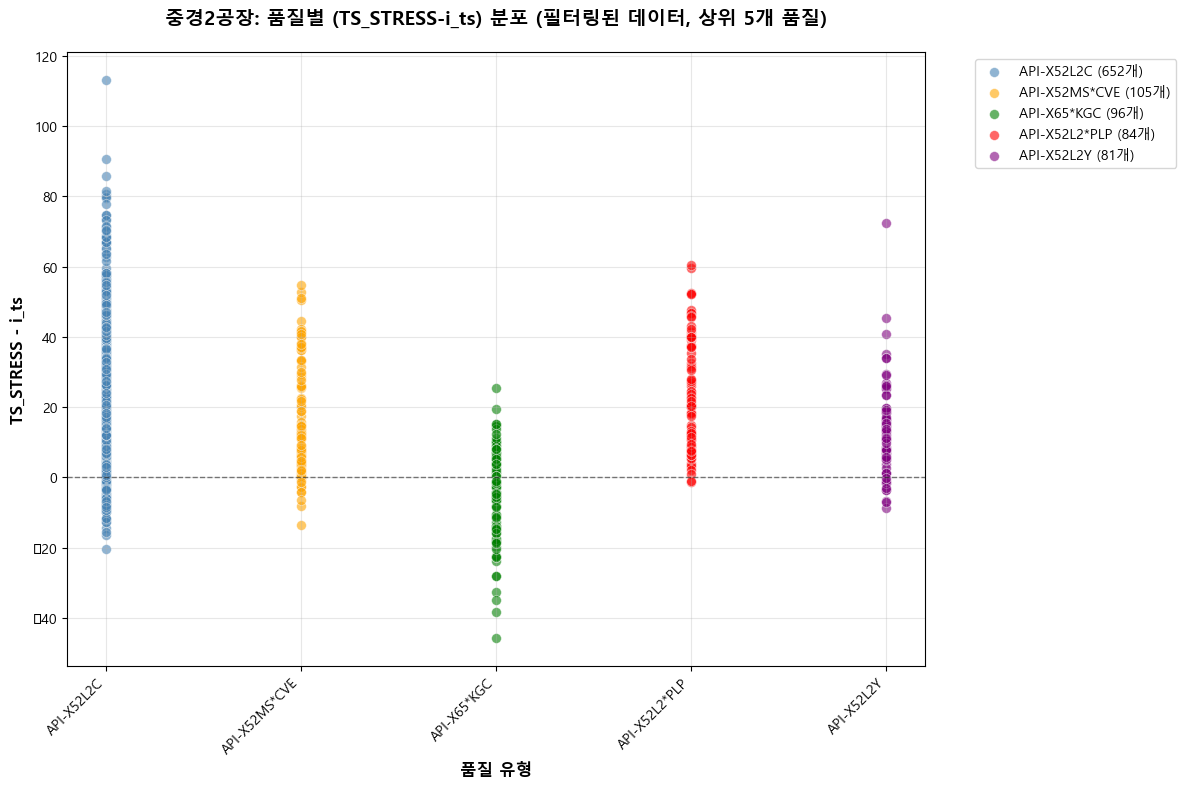


분석 완료:
- 필터링된 전체 데이터 포인트: 1368
- 상위 5개 품질 유형 데이터 포인트: 1018
- x축: 품질, y축: (TS_STRESS-i_ts)로 시각화했습니다.
- 0 기준선을 추가하여 양수/음수 영역을 구분했습니다.


In [16]:
# 필터링된 중경2공장 데이터로 품질 vs (TS_STRESS-i_ts) 산점도 시각화 (수정된 버전)

# TS_STRESS-i_ts 새로운 컬럼 생성
filtered_junggyeong2_data_copy2 = filtered_junggyeong2_data.copy()
filtered_junggyeong2_data_copy2['ts_diff_corrected'] = filtered_junggyeong2_data_copy2['ts_stress'] - filtered_junggyeong2_data_copy2['i_ts']

# 결측치 제거
clean_filtered_data_ts_diff2 = filtered_junggyeong2_data_copy2.dropna(subset=['quality', 'ts_diff_corrected'])

# quality 컬럼의 데이터 타입 확인
print("필터링된 데이터의 quality 컬럼 고유값 확인:")
quality_counts_ts_diff2 = clean_filtered_data_ts_diff2['quality'].value_counts()
print(quality_counts_ts_diff2.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_ts_diff2 = quality_counts_ts_diff2.head(5).index.tolist()
final_filtered_data_ts_diff2 = clean_filtered_data_ts_diff2[clean_filtered_data_ts_diff2['quality'].isin(top_5_qualities_ts_diff2)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_ts_diff2}")
print(f"최종 필터링된 데이터 개수: {len(final_filtered_data_ts_diff2)}")

# TS_STRESS-i_ts 데이터 기본 통계
print(f"\n(TS_STRESS-i_ts) 기본 통계:")
print(final_filtered_data_ts_diff2['ts_diff_corrected'].describe())

# 색상 맵 설정 (각 품질별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']
color_map = dict(zip(top_5_qualities_ts_diff2, colors))

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_ts_diff2):
    quality_data = final_filtered_data_ts_diff2[final_filtered_data_ts_diff2['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['ts_diff_corrected'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('TS_STRESS - i_ts', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 (TS_STRESS-i_ts) 분포 (필터링된 데이터, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_ts_diff2)), top_5_qualities_ts_diff2, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 0 기준선 추가
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- 필터링된 전체 데이터 포인트: {len(clean_filtered_data_ts_diff2)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(final_filtered_data_ts_diff2)}")
print(f"- x축: 품질, y축: (TS_STRESS-i_ts)로 시각화했습니다.")
print(f"- 0 기준선을 추가하여 양수/음수 영역을 구분했습니다.")


필터링된 데이터의 quality 컬럼 고유값 확인:
quality
API-X52L2C         652
API-X52MS*CVE      105
API-X65*KGC         96
API-X52L2*PLP       84
API-X52L2Y          81
API-X52L2C-D        78
API-X52L2*P66       62
API-X52MS*MOM       54
API-X52MS*CVE-D     30
API-X60L2I          24
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['API-X52L2C', 'API-X52MS*CVE', 'API-X65*KGC', 'API-X52L2*PLP', 'API-X52L2Y']
최종 필터링된 데이터 개수: 1018

(YS2_STRESS-I_YS) 기본 통계:
count    1018.000000
mean     -219.163452
std       233.668673
min      -572.000000
25%      -448.750000
50%       -44.876500
75%         8.494250
max        88.742000
Name: ys_diff, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_14896\3452751383.py:51: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\DELL\Desktop\jiwoong-data-anal\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


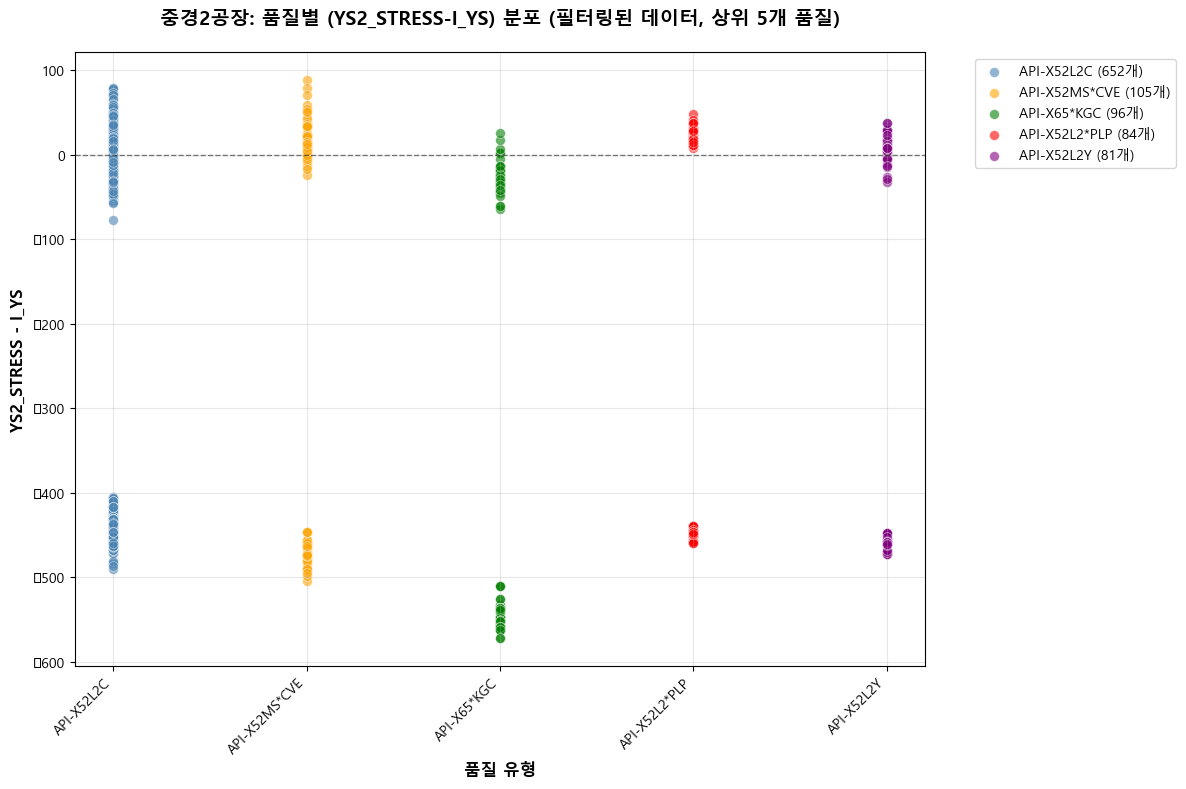


분석 완료:
- 필터링된 전체 데이터 포인트: 1368
- 상위 5개 품질 유형 데이터 포인트: 1018
- x축: 품질, y축: (YS2_STRESS-I_YS)로 시각화했습니다.
- 0 기준선을 추가하여 양수/음수 영역을 구분했습니다.


In [ ]:
# 필터링된 중경2공장 데이터로 품질 vs (YS2_STRESS-I_YS) 산점도 시각화

# YS2_STRESS-I_YS 새로운 컬럼 생성
filtered_junggyeong2_data_copy3 = filtered_junggyeong2_data.copy()
filtered_junggyeong2_data_copy3['ys_diff'] = filtered_junggyeong2_data_copy3['ys2_stress'] - filtered_junggyeong2_data_copy3['i_ys']

# 결측치 제거
clean_filtered_data_ys_diff = filtered_junggyeong2_data_copy3.dropna(subset=['quality', 'ys_diff'])

# quality 컬럼의 데이터 타입 확인
print("필터링된 데이터의 quality 컬럼 고유값 확인:")
quality_counts_ys_diff = clean_filtered_data_ys_diff['quality'].value_counts()
print(quality_counts_ys_diff.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_ys_diff = quality_counts_ys_diff.head(5).index.tolist()
final_filtered_data_ys_diff = clean_filtered_data_ys_diff[clean_filtered_data_ys_diff['quality'].isin(top_5_qualities_ys_diff)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_ys_diff}")
print(f"최종 필터링된 데이터 개수: {len(final_filtered_data_ys_diff)}")

# YS2_STRESS-I_YS 데이터 기본 통계
print(f"\n(YS2_STRESS-I_YS) 기본 통계:")
print(final_filtered_data_ys_diff['ys_diff'].describe())

# 색상 맵 설정 (각 품질별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']
color_map = dict(zip(top_5_qualities_ys_diff, colors))

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_ys_diff):
    quality_data = final_filtered_data_ys_diff[final_filtered_data_ys_diff['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['ys_diff'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('YS2_STRESS - I_YS', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 (YS2_STRESS-I_YS) 분포 (필터링된 데이터, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_ys_diff)), top_5_qualities_ys_diff, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 0 기준선 추가
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- 필터링된 전체 데이터 포인트: {len(clean_filtered_data_ys_diff)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(final_filtered_data_ys_diff)}")
print(f"- x축: 품질, y축: (YS2_STRESS-I_YS)로 시각화했습니다.")
print(f"- 0 기준선을 추가하여 양수/음수 영역을 구분했습니다.")


필터링된 데이터의 quality 컬럼 고유값 확인:
quality
API-X52L2C         652
API-X52MS*CVE      105
API-X65*KGC         96
API-X52L2*PLP       84
API-X52L2Y          81
API-X52L2C-D        78
API-X52L2*P66       62
API-X52MS*MOM       54
API-X52MS*CVE-D     30
API-X60L2I          24
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['API-X52L2C', 'API-X52MS*CVE', 'API-X65*KGC', 'API-X52L2*PLP', 'API-X52L2Y']
최종 필터링된 데이터 개수: 1018

ys2_stress 기본 통계:
count    1018.000000
mean      238.320831
std       233.075770
min         0.000000
25%         0.000000
50%       409.173500
75%       466.649250
max       545.136000
Name: ys2_stress, dtype: float64


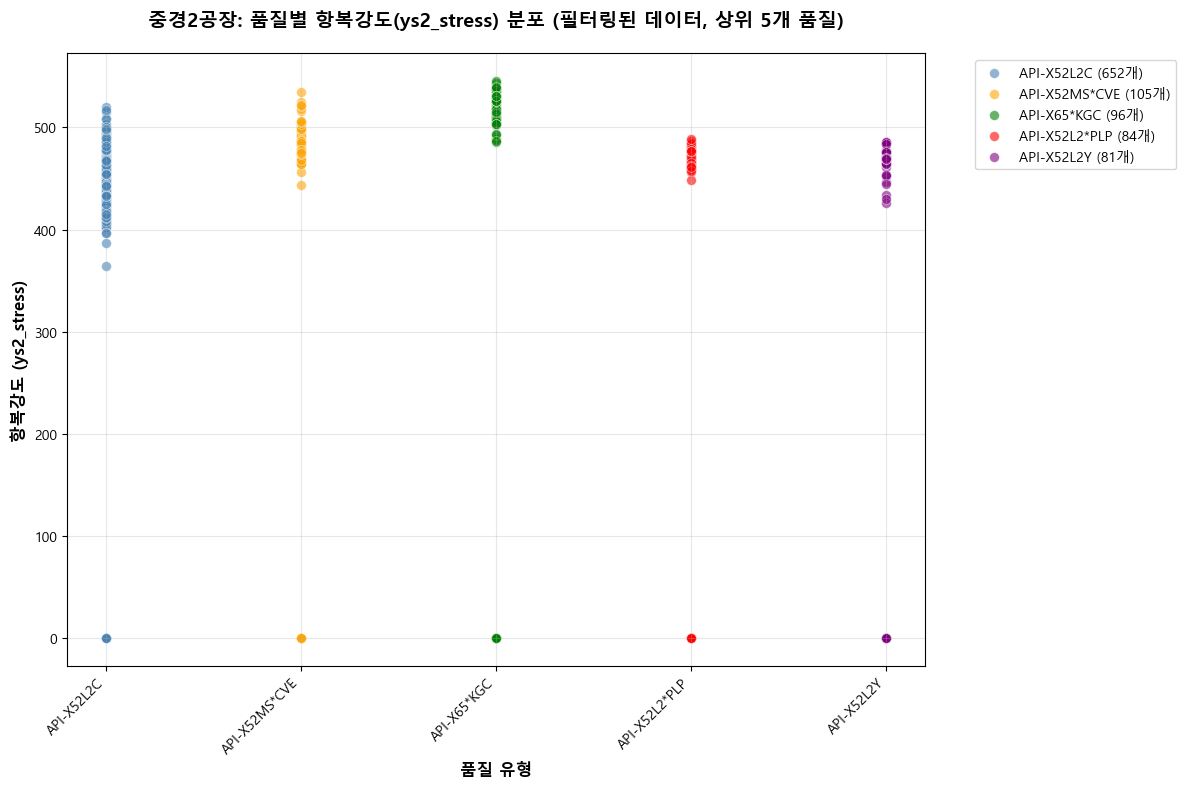


분석 완료:
- 필터링된 전체 데이터 포인트: 1368
- 상위 5개 품질 유형 데이터 포인트: 1018
- x축: 품질, y축: ys2_stress로 시각화했습니다.


In [18]:
# 필터링된 중경2공장 데이터로 품질 vs ys2_stress 산점도 시각화

# 결측치 제거
clean_filtered_data_ys2 = filtered_junggyeong2_data.dropna(subset=['quality', 'ys2_stress'])

# quality 컬럼의 데이터 타입 확인
print("필터링된 데이터의 quality 컬럼 고유값 확인:")
quality_counts_ys2 = clean_filtered_data_ys2['quality'].value_counts()
print(quality_counts_ys2.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_ys2 = quality_counts_ys2.head(5).index.tolist()
final_filtered_data_ys2 = clean_filtered_data_ys2[clean_filtered_data_ys2['quality'].isin(top_5_qualities_ys2)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_ys2}")
print(f"최종 필터링된 데이터 개수: {len(final_filtered_data_ys2)}")

# ys2_stress 데이터 기본 통계
print(f"\nys2_stress 기본 통계:")
print(final_filtered_data_ys2['ys2_stress'].describe())

# 색상 맵 설정 (각 품질별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']
color_map = dict(zip(top_5_qualities_ys2, colors))

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_ys2):
    quality_data = final_filtered_data_ys2[final_filtered_data_ys2['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['ys2_stress'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('항복강도 (ys2_stress)', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 항복강도(ys2_stress) 분포 (필터링된 데이터, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_ys2)), top_5_qualities_ys2, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- 필터링된 전체 데이터 포인트: {len(clean_filtered_data_ys2)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(final_filtered_data_ys2)}")
print(f"- x축: 품질, y축: ys2_stress로 시각화했습니다.")


필터링된 데이터의 quality 컬럼 고유값 확인:
quality
API-X52L2C         652
API-X52MS*CVE      105
API-X65*KGC         96
API-X52L2*PLP       84
API-X52L2Y          81
API-X52L2C-D        78
API-X52L2*P66       62
API-X52MS*MOM       54
API-X52MS*CVE-D     30
API-X60L2I          24
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['API-X52L2C', 'API-X52MS*CVE', 'API-X65*KGC', 'API-X52L2*PLP', 'API-X52L2Y']
최종 필터링된 데이터 개수: 1018

i_ys 기본 통계:
count    1018.000000
mean      457.484283
std        32.879241
min       405.000000
25%       439.000000
50%       450.000000
75%       462.000000
max       572.000000
Name: i_ys, dtype: float64


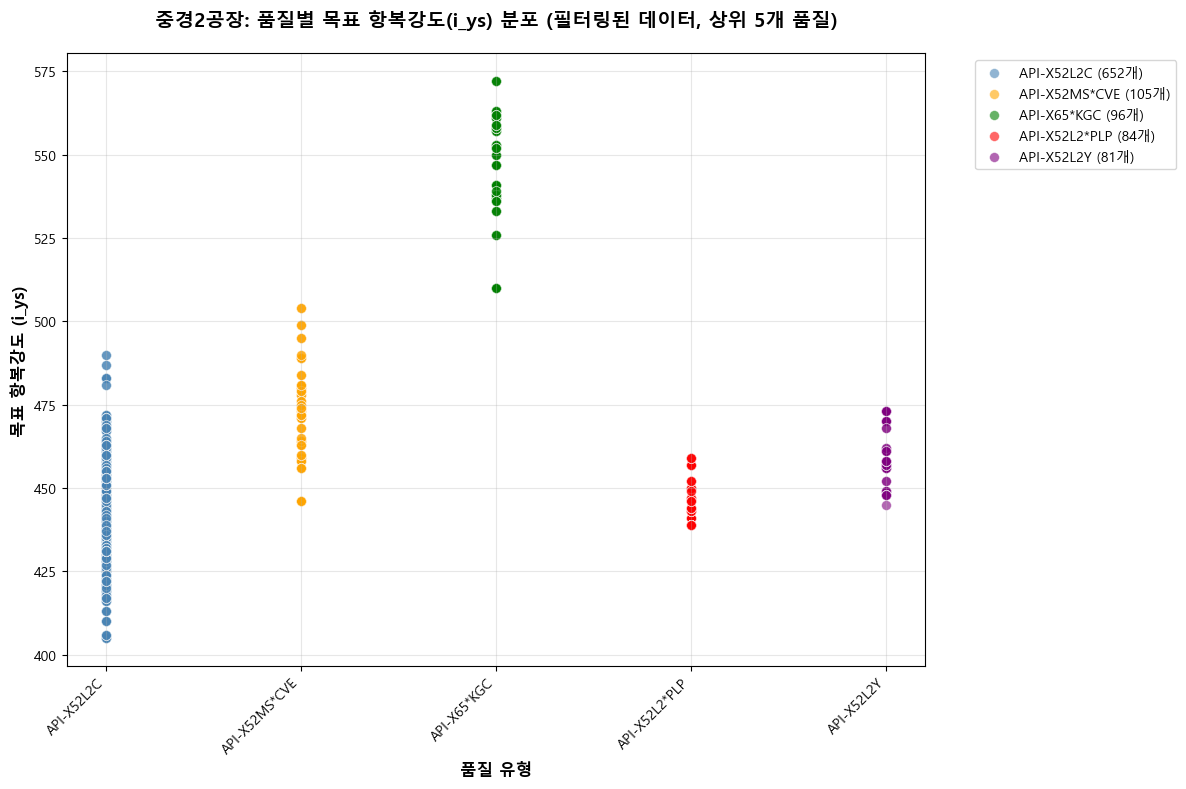


분석 완료:
- 필터링된 전체 데이터 포인트: 1368
- 상위 5개 품질 유형 데이터 포인트: 1018
- x축: 품질, y축: i_ys로 시각화했습니다.


In [19]:
# 필터링된 중경2공장 데이터로 품질 vs i_ys 산점도 시각화

# 결측치 제거
clean_filtered_data_iys = filtered_junggyeong2_data.dropna(subset=['quality', 'i_ys'])

# quality 컬럼의 데이터 타입 확인
print("필터링된 데이터의 quality 컬럼 고유값 확인:")
quality_counts_iys = clean_filtered_data_iys['quality'].value_counts()
print(quality_counts_iys.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_iys = quality_counts_iys.head(5).index.tolist()
final_filtered_data_iys = clean_filtered_data_iys[clean_filtered_data_iys['quality'].isin(top_5_qualities_iys)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_iys}")
print(f"최종 필터링된 데이터 개수: {len(final_filtered_data_iys)}")

# i_ys 데이터 기본 통계
print(f"\ni_ys 기본 통계:")
print(final_filtered_data_iys['i_ys'].describe())

# 색상 맵 설정 (각 품질별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']
color_map = dict(zip(top_5_qualities_iys, colors))

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_iys):
    quality_data = final_filtered_data_iys[final_filtered_data_iys['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['i_ys'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('목표 항복강도 (i_ys)', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 목표 항복강도(i_ys) 분포 (필터링된 데이터, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_iys)), top_5_qualities_iys, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- 필터링된 전체 데이터 포인트: {len(clean_filtered_data_iys)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(final_filtered_data_iys)}")
print(f"- x축: 품질, y축: i_ys로 시각화했습니다.")


In [22]:
# 중경2공장 데이터에서 pcm, ceq, hardness, i_ys, i_ts 값이 0인 데이터 추가 필터링

print("기존 필터링된 중경2공장 데이터 개수:", len(filtered_junggyeong2_data))

# I_YS, I_TS 값이 0인 개수 확인
print("\n추가 필터링 대상 컬럼의 0값 개수:")
print(f"i_ys = 0인 개수: {(filtered_junggyeong2_data['i_ys'] == 0).sum()}")
print(f"i_ts = 0인 개수: {(filtered_junggyeong2_data['i_ts'] == 0).sum()}")

# pcm, ceq, hardness, i_ys, i_ts 값이 모두 0이 아닌 데이터만 필터링
final_filtered_junggyeong2_data = filtered_junggyeong2_data[
    (filtered_junggyeong2_data['pcm'] != 0) & 
    (filtered_junggyeong2_data['ceq'] != 0) & 
    (filtered_junggyeong2_data['hardness'] != 0) &
    (filtered_junggyeong2_data['i_ys'] != 0) &
    (filtered_junggyeong2_data['i_ts'] != 0)
]

print(f"\n최종 필터링 후 중경2공장 데이터 개수: {len(final_filtered_junggyeong2_data)}")
print(f"추가로 제거된 데이터 개수: {len(filtered_junggyeong2_data) - len(final_filtered_junggyeong2_data)}")
print(f"전체 제거된 데이터 개수: {len(junggyeong2_data) - len(final_filtered_junggyeong2_data)}")

# 최종 필터링된 데이터의 기본 통계 확인
print(f"\n최종 필터링된 데이터의 주요 컬럼 기본 통계:")
print("pcm 통계:")
print(final_filtered_junggyeong2_data['pcm'].describe())
print("\nceq 통계:")
print(final_filtered_junggyeong2_data['ceq'].describe())
print("\nhardness 통계:")
print(final_filtered_junggyeong2_data['hardness'].describe())
print("\ni_ys 통계:")
print(final_filtered_junggyeong2_data['i_ys'].describe())
print("\ni_ts 통계:")
print(final_filtered_junggyeong2_data['i_ts'].describe())


기존 필터링된 중경2공장 데이터 개수: 1368

추가 필터링 대상 컬럼의 0값 개수:
i_ys = 0인 개수: 0
i_ts = 0인 개수: 0

최종 필터링 후 중경2공장 데이터 개수: 1368
추가로 제거된 데이터 개수: 0
전체 제거된 데이터 개수: 4000

최종 필터링된 데이터의 주요 컬럼 기본 통계:
pcm 통계:
count    1368.000000
mean        0.124493
std         0.014022
min         0.095000
25%         0.119000
50%         0.125000
75%         0.129000
max         0.175000
Name: pcm, dtype: float64

ceq 통계:
count    1368.000000
mean        0.238550
std         0.040759
min         0.139000
25%         0.233000
50%         0.239000
75%         0.246000
max         0.364000
Name: ceq, dtype: float64

hardness 통계:
count    1368.000000
mean      166.208333
std        11.896711
min       138.800000
25%       158.500000
50%       163.000000
75%       170.000000
max       205.000000
Name: hardness, dtype: float64

i_ys 통계:
count    1368.000000
mean      458.174708
std        32.760210
min       405.000000
25%       438.000000
50%       451.000000
75%       466.000000
max       572.000000
Name: i_ys, dtype: float64

i

In [20]:
# 최종 필터링된 데이터로 품질 vs i_ys 산점도 시각화 (재작성)

# 결측치 제거
clean_final_data_iys = final_filtered_junggyeong2_data.dropna(subset=['quality', 'i_ys'])

# quality 컬럼의 데이터 타입 확인
print("최종 필터링된 데이터의 quality 컬럼 고유값 확인:")
quality_counts_final_iys = clean_final_data_iys['quality'].value_counts()
print(quality_counts_final_iys.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_final_iys = quality_counts_final_iys.head(5).index.tolist()
final_data_iys = clean_final_data_iys[clean_final_data_iys['quality'].isin(top_5_qualities_final_iys)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_final_iys}")
print(f"최종 데이터 개수: {len(final_data_iys)}")

# i_ys 데이터 기본 통계
print(f"\ni_ys 기본 통계:")
print(final_data_iys['i_ys'].describe())

# 색상 맵 설정 (각 품질별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']
color_map = dict(zip(top_5_qualities_final_iys, colors))

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_final_iys):
    quality_data = final_data_iys[final_data_iys['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['i_ys'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('목표 항복강도 (i_ys)', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 목표 항복강도(i_ys) 분포 (최종 필터링된 데이터, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_final_iys)), top_5_qualities_final_iys, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- 최종 필터링된 전체 데이터 포인트: {len(clean_final_data_iys)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(final_data_iys)}")
print(f"- pcm, ceq, hardness, i_ys, i_ts가 모두 0이 아닌 깨끗한 데이터로 시각화했습니다.")


NameError: name 'final_filtered_junggyeong2_data' is not defined

In [ ]:
# 오류 진단: 필터링 조건 단계별 확인

print("단계별 필터링 진단:")
print(f"원본 중경2공장 데이터: {len(junggyeong2_data)}")

# 각 조건별로 단계적 확인
step1 = junggyeong2_data[junggyeong2_data['pcm'] != 0]
print(f"pcm != 0 조건 후: {len(step1)}")

step2 = step1[step1['ceq'] != 0]
print(f"ceq != 0 조건 추가 후: {len(step2)}")

step3 = step2[step2['hardness'] != 0]
print(f"hardness != 0 조건 추가 후: {len(step3)}")

# i_ys, i_ts 컬럼 존재 여부 확인
print(f"\ni_ys 컬럼 존재: {'i_ys' in junggyeong2_data.columns}")
print(f"i_ts 컬럼 존재: {'i_ts' in junggyeong2_data.columns}")

if 'i_ys' in junggyeong2_data.columns:
    print(f"i_ys = 0인 개수: {(junggyeong2_data['i_ys'] == 0).sum()}")
    print(f"i_ys 결측치 개수: {junggyeong2_data['i_ys'].isna().sum()}")
    
if 'i_ts' in junggyeong2_data.columns:
    print(f"i_ts = 0인 개수: {(junggyeong2_data['i_ts'] == 0).sum()}")
    print(f"i_ts 결측치 개수: {junggyeong2_data['i_ts'].isna().sum()}")

# 컬럼명 확인
print(f"\n'i_'로 시작하는 컬럼들:")
i_columns = [col for col in junggyeong2_data.columns if col.lower().startswith('i_')]
print(i_columns)


단계별 필터링 진단:
원본 중경2공장 데이터: 5368
pcm != 0 조건 후: 2843
ceq != 0 조건 추가 후: 1784
hardness != 0 조건 추가 후: 1368

i_ys 컬럼 존재: True
i_ts 컬럼 존재: True
i_ys = 0인 개수: 0
i_ys 결측치 개수: 2
i_ts = 0인 개수: 0
i_ts 결측치 개수: 2

'i_'로 시작하는 컬럼들:
['i_heat_no', 'i_coil_no', 'i_ys', 'i_ts', 'i_el']


최종 필터링된 데이터의 quality 컬럼 고유값 확인:
quality
API-X52L2C         652
API-X52MS*CVE      105
API-X65*KGC         96
API-X52L2*PLP       84
API-X52L2Y          81
API-X52L2C-D        78
API-X52L2*P66       62
API-X52MS*MOM       54
API-X52MS*CVE-D     30
API-X60L2I          24
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['API-X52L2C', 'API-X52MS*CVE', 'API-X65*KGC', 'API-X52L2*PLP', 'API-X52L2Y']
최종 데이터 개수: 1018

(YS2_STRESS-I_YS) 기본 통계:
count    1018.000000
mean     -219.163452
std       233.668673
min      -572.000000
25%      -448.750000
50%       -44.876500
75%         8.494250
max        88.742000
Name: ys_diff_final, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_14896\1010895173.py:51: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\DELL\Desktop\jiwoong-data-anal\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


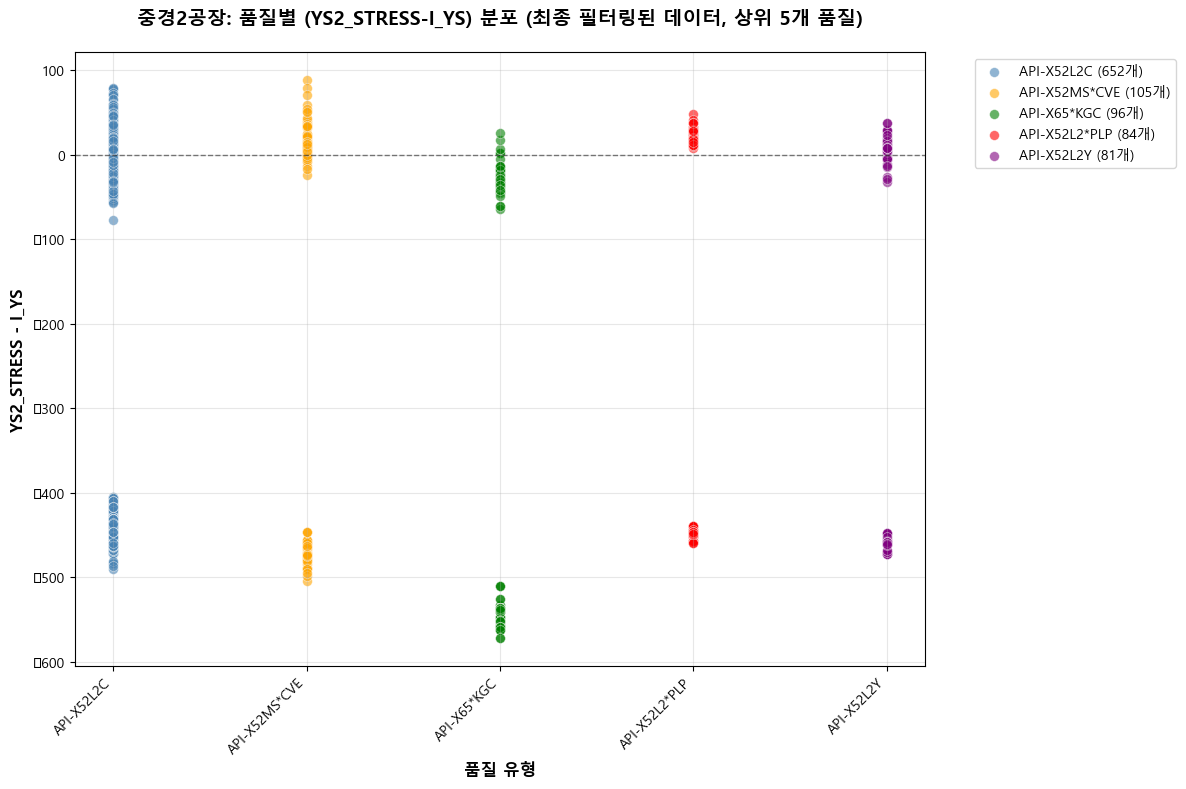


분석 완료:
- 최종 필터링된 전체 데이터 포인트: 1368
- 상위 5개 품질 유형 데이터 포인트: 1018
- x축: 품질, y축: (YS2_STRESS-I_YS)로 시각화했습니다.
- 0 기준선을 추가하여 양수/음수 영역을 구분했습니다.


In [24]:
# 최종 필터링된 데이터로 품질 vs (YS2_STRESS-I_YS) 산점도 시각화

# YS2_STRESS-I_YS 새로운 컬럼 생성
final_data_copy = final_filtered_junggyeong2_data.copy()
final_data_copy['ys_diff_final'] = final_data_copy['ys2_stress'] - final_data_copy['i_ys']

# 결측치 제거
clean_final_ys_diff = final_data_copy.dropna(subset=['quality', 'ys_diff_final'])

# quality 컬럼의 데이터 타입 확인
print("최종 필터링된 데이터의 quality 컬럼 고유값 확인:")
quality_counts_final_ys = clean_final_ys_diff['quality'].value_counts()
print(quality_counts_final_ys.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_final_ys = quality_counts_final_ys.head(5).index.tolist()
final_ys_diff_data = clean_final_ys_diff[clean_final_ys_diff['quality'].isin(top_5_qualities_final_ys)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_final_ys}")
print(f"최종 데이터 개수: {len(final_ys_diff_data)}")

# YS2_STRESS-I_YS 데이터 기본 통계
print(f"\n(YS2_STRESS-I_YS) 기본 통계:")
print(final_ys_diff_data['ys_diff_final'].describe())

# 색상 맵 설정 (각 품질별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']
color_map = dict(zip(top_5_qualities_final_ys, colors))

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_final_ys):
    quality_data = final_ys_diff_data[final_ys_diff_data['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['ys_diff_final'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('YS2_STRESS - I_YS', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 (YS2_STRESS-I_YS) 분포 (최종 필터링된 데이터, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_final_ys)), top_5_qualities_final_ys, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 0 기준선 추가
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- 최종 필터링된 전체 데이터 포인트: {len(clean_final_ys_diff)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(final_ys_diff_data)}")
print(f"- x축: 품질, y축: (YS2_STRESS-I_YS)로 시각화했습니다.")
print(f"- 0 기준선을 추가하여 양수/음수 영역을 구분했습니다.")


In [25]:
# I_YS = 0인 값들이 제대로 제외되었는지 확인

print("현재 사용 중인 데이터셋 확인:")
print(f"final_filtered_junggyeong2_data 존재 여부: {'final_filtered_junggyeong2_data' in locals()}")

# final_filtered_junggyeong2_data가 없다면 다시 생성
if 'final_filtered_junggyeong2_data' not in locals():
    print("final_filtered_junggyeong2_data가 없어서 다시 생성합니다...")
    # pcm, ceq, hardness, i_ys, i_ts 값이 모두 0이 아닌 데이터만 필터링
    final_filtered_junggyeong2_data = filtered_junggyeong2_data[
        (filtered_junggyeong2_data['pcm'] != 0) & 
        (filtered_junggyeong2_data['ceq'] != 0) & 
        (filtered_junggyeong2_data['hardness'] != 0) &
        (filtered_junggyeong2_data['i_ys'] != 0) &
        (filtered_junggyeong2_data['i_ts'] != 0)
    ]

print(f"\n데이터 확인:")
print(f"filtered_junggyeong2_data 개수: {len(filtered_junggyeong2_data)}")
print(f"final_filtered_junggyeong2_data 개수: {len(final_filtered_junggyeong2_data)}")

# I_YS = 0인 값들 확인
print(f"\nfiltered_junggyeong2_data에서 i_ys = 0인 개수: {(filtered_junggyeong2_data['i_ys'] == 0).sum()}")
print(f"final_filtered_junggyeong2_data에서 i_ys = 0인 개수: {(final_filtered_junggyeong2_data['i_ys'] == 0).sum()}")

print(f"\nfiltered_junggyeong2_data에서 i_ts = 0인 개수: {(filtered_junggyeong2_data['i_ts'] == 0).sum()}")
print(f"final_filtered_junggyeong2_data에서 i_ts = 0인 개수: {(final_filtered_junggyeong2_data['i_ts'] == 0).sum()}")

# I_YS 값 범위 확인
print(f"\nfinal_filtered_junggyeong2_data의 i_ys 값 범위:")
print(f"최솟값: {final_filtered_junggyeong2_data['i_ys'].min()}")
print(f"최댓값: {final_filtered_junggyeong2_data['i_ys'].max()}")
print(f"고유값 개수: {final_filtered_junggyeong2_data['i_ys'].nunique()}")

# 실제로 제대로 필터링되었는지 확인
if (final_filtered_junggyeong2_data['i_ys'] == 0).sum() == 0:
    print("\n✅ I_YS = 0인 값들이 모두 제외되었습니다!")
else:
    print(f"\n❌ 아직 I_YS = 0인 값이 {(final_filtered_junggyeong2_data['i_ys'] == 0).sum()}개 남아있습니다.")


현재 사용 중인 데이터셋 확인:
final_filtered_junggyeong2_data 존재 여부: True

데이터 확인:
filtered_junggyeong2_data 개수: 1368
final_filtered_junggyeong2_data 개수: 1368

filtered_junggyeong2_data에서 i_ys = 0인 개수: 0
final_filtered_junggyeong2_data에서 i_ys = 0인 개수: 0

filtered_junggyeong2_data에서 i_ts = 0인 개수: 0
final_filtered_junggyeong2_data에서 i_ts = 0인 개수: 0

final_filtered_junggyeong2_data의 i_ys 값 범위:
최솟값: 405.0
최댓값: 572.0
고유값 개수: 119

✅ I_YS = 0인 값들이 모두 제외되었습니다!


검증된 최종 데이터의 quality 컬럼 고유값:
quality
API-X52L2C         652
API-X52MS*CVE      105
API-X65*KGC         96
API-X52L2*PLP       84
API-X52L2Y          81
API-X52L2C-D        78
API-X52L2*P66       62
API-X52MS*MOM       54
API-X52MS*CVE-D     30
API-X60L2I          24
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['API-X52L2C', 'API-X52MS*CVE', 'API-X65*KGC', 'API-X52L2*PLP', 'API-X52L2Y']
최종 플롯 데이터 개수: 1018

(YS2_STRESS-I_YS) 기본 통계:
count    1018.000000
mean     -219.163452
std       233.668673
min      -572.000000
25%      -448.750000
50%       -44.876500
75%         8.494250
max        88.742000
Name: ys_diff_verified, dtype: float64

데이터 검증:
i_ys = 0인 개수: 0
i_ts = 0인 개수: 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_14896\2369968077.py:55: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\DELL\Desktop\jiwoong-data-anal\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


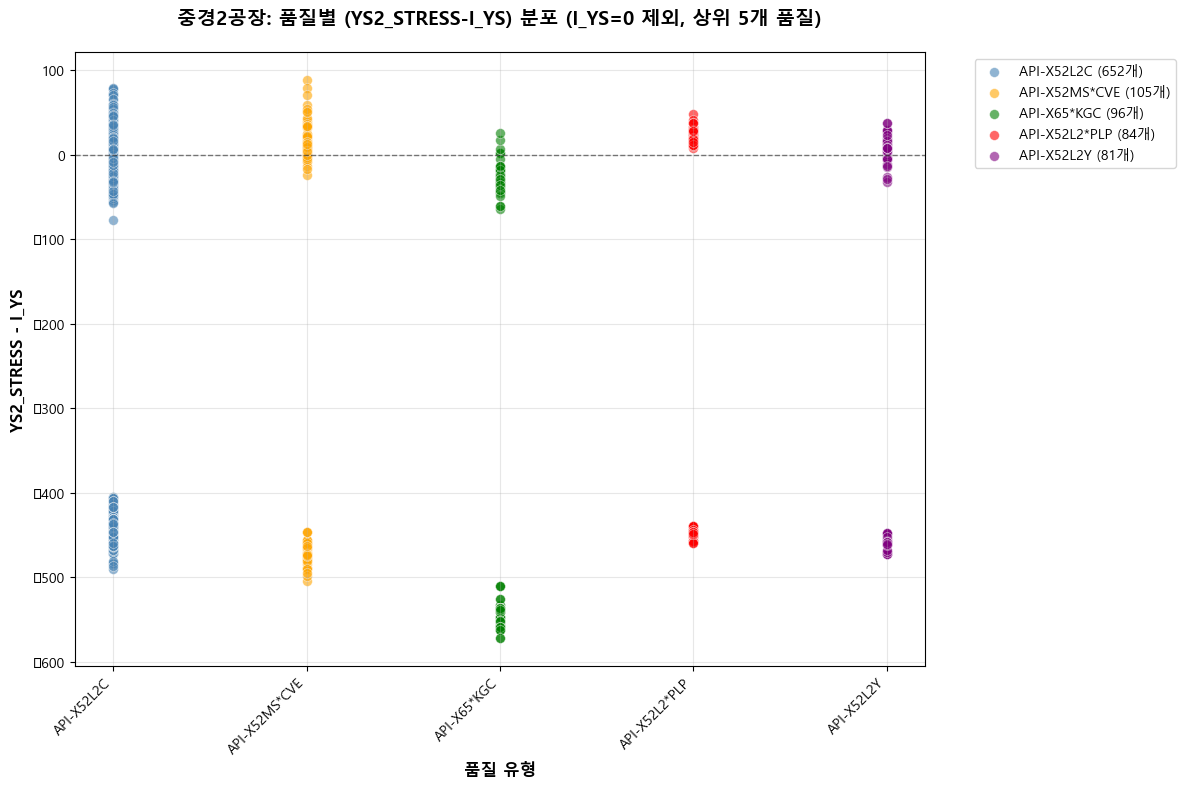


최종 분석 완료:
- I_YS=0, I_TS=0 제외된 데이터 포인트: 1368
- 상위 5개 품질 유형 데이터 포인트: 1018
- 깨끗한 데이터로 품질별 항복강도 성능 차이를 시각화했습니다.


In [26]:
# 검증된 최종 필터링 데이터로 품질 vs (YS2_STRESS-I_YS) 산점도 재시각화

# YS2_STRESS-I_YS 차이값 계산
final_data_verified = final_filtered_junggyeong2_data.copy()
final_data_verified['ys_diff_verified'] = final_data_verified['ys2_stress'] - final_data_verified['i_ys']

# 결측치 제거
clean_verified_data = final_data_verified.dropna(subset=['quality', 'ys_diff_verified'])

# quality 컬럼의 데이터 확인
print("검증된 최종 데이터의 quality 컬럼 고유값:")
quality_counts_verified = clean_verified_data['quality'].value_counts()
print(quality_counts_verified.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_verified = quality_counts_verified.head(5).index.tolist()
final_plot_data = clean_verified_data[clean_verified_data['quality'].isin(top_5_qualities_verified)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_verified}")
print(f"최종 플롯 데이터 개수: {len(final_plot_data)}")

# YS2_STRESS-I_YS 데이터 기본 통계
print(f"\n(YS2_STRESS-I_YS) 기본 통계:")
print(final_plot_data['ys_diff_verified'].describe())

# 0값 확인
print(f"\n데이터 검증:")
print(f"i_ys = 0인 개수: {(final_plot_data['i_ys'] == 0).sum()}")
print(f"i_ts = 0인 개수: {(final_plot_data['i_ts'] == 0).sum()}")

# 색상 맵 설정
colors = ['steelblue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_verified):
    quality_data = final_plot_data[final_plot_data['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['ys_diff_verified'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('YS2_STRESS - I_YS', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 (YS2_STRESS-I_YS) 분포 (I_YS=0 제외, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_verified)), top_5_qualities_verified, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 0 기준선 추가
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n최종 분석 완료:")
print(f"- I_YS=0, I_TS=0 제외된 데이터 포인트: {len(clean_verified_data)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(final_plot_data)}")
print(f"- 깨끗한 데이터로 품질별 항복강도 성능 차이를 시각화했습니다.")


최종 필터링된 데이터의 quality 컬럼 고유값:
quality
API-X52L2C         652
API-X52MS*CVE      105
API-X65*KGC         96
API-X52L2*PLP       84
API-X52L2Y          81
API-X52L2C-D        78
API-X52L2*P66       62
API-X52MS*MOM       54
API-X52MS*CVE-D     30
API-X60L2I          24
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['API-X52L2C', 'API-X52MS*CVE', 'API-X65*KGC', 'API-X52L2*PLP', 'API-X52L2Y']
최종 데이터 개수: 1018

i_ys 기본 통계:
count    1018.000000
mean      457.484283
std        32.879241
min       405.000000
25%       439.000000
50%       450.000000
75%       462.000000
max       572.000000
Name: i_ys, dtype: float64

데이터 검증:
i_ys = 0인 개수: 0
i_ys 최솟값: 405.0


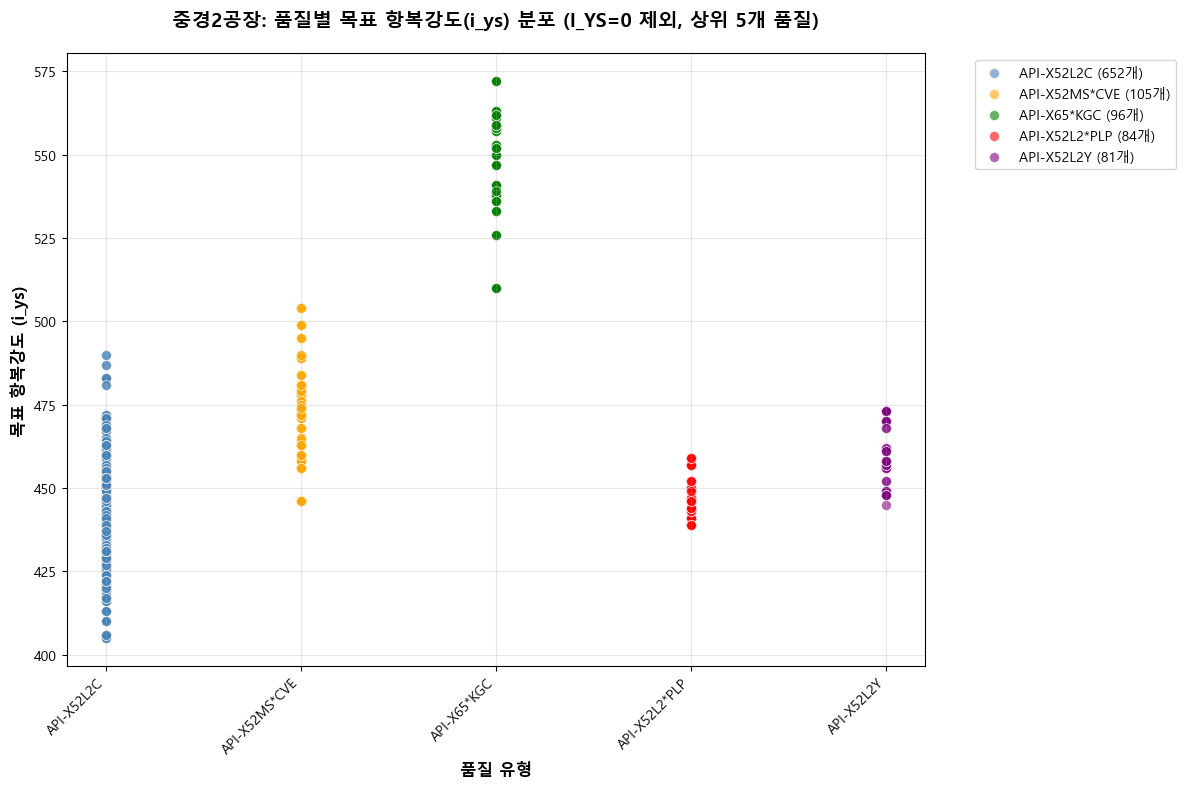


분석 완료:
- I_YS=0 제외된 데이터 포인트: 1368
- 상위 5개 품질 유형 데이터 포인트: 1018
- 품질별 목표 항복강도 분포를 시각화했습니다.


In [27]:
# 최종 필터링된 데이터로 품질 vs i_ys 산점도 시각화

# 결측치 제거
clean_final_iys = final_filtered_junggyeong2_data.dropna(subset=['quality', 'i_ys'])

# quality 컬럼의 데이터 확인
print("최종 필터링된 데이터의 quality 컬럼 고유값:")
quality_counts_final_iys = clean_final_iys['quality'].value_counts()
print(quality_counts_final_iys.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_final_iys = quality_counts_final_iys.head(5).index.tolist()
final_iys_data = clean_final_iys[clean_final_iys['quality'].isin(top_5_qualities_final_iys)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_final_iys}")
print(f"최종 데이터 개수: {len(final_iys_data)}")

# i_ys 데이터 기본 통계
print(f"\ni_ys 기본 통계:")
print(final_iys_data['i_ys'].describe())

# 0값 확인
print(f"\n데이터 검증:")
print(f"i_ys = 0인 개수: {(final_iys_data['i_ys'] == 0).sum()}")
print(f"i_ys 최솟값: {final_iys_data['i_ys'].min()}")

# 색상 맵 설정 (각 품질별로 다른 색상)
colors = ['steelblue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_final_iys):
    quality_data = final_iys_data[final_iys_data['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['i_ys'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('목표 항복강도 (i_ys)', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 목표 항복강도(i_ys) 분포 (I_YS=0 제외, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_final_iys)), top_5_qualities_final_iys, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n분석 완료:")
print(f"- I_YS=0 제외된 데이터 포인트: {len(clean_final_iys)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(final_iys_data)}")
print(f"- 품질별 목표 항복강도 분포를 시각화했습니다.")


In [28]:
# 중경2공장 데이터에서 pcm, ceq, hardness, i_ys, i_ts, ys2_stress 값이 0인 데이터 최종 필터링

print("기존 최종 필터링된 중경2공장 데이터 개수:", len(final_filtered_junggyeong2_data))

# ys2_stress 값이 0인 개수 확인
print(f"\nys2_stress = 0인 개수: {(final_filtered_junggyeong2_data['ys2_stress'] == 0).sum()}")
print(f"ys2_stress 결측치 개수: {final_filtered_junggyeong2_data['ys2_stress'].isna().sum()}")

# pcm, ceq, hardness, i_ys, i_ts, ys2_stress 값이 모두 0이 아닌 데이터만 필터링
ultra_final_filtered_data = final_filtered_junggyeong2_data[
    (final_filtered_junggyeong2_data['pcm'] != 0) & 
    (final_filtered_junggyeong2_data['ceq'] != 0) & 
    (final_filtered_junggyeong2_data['hardness'] != 0) &
    (final_filtered_junggyeong2_data['i_ys'] != 0) &
    (final_filtered_junggyeong2_data['i_ts'] != 0) &
    (final_filtered_junggyeong2_data['ys2_stress'] != 0)
]

print(f"\n최종 필터링 후 중경2공장 데이터 개수: {len(ultra_final_filtered_data)}")
print(f"ys2_stress=0 제외로 추가 제거된 데이터 개수: {len(final_filtered_junggyeong2_data) - len(ultra_final_filtered_data)}")
print(f"전체 제거된 데이터 개수: {len(junggyeong2_data) - len(ultra_final_filtered_data)}")

# 최종 필터링된 데이터의 기본 통계 확인
print(f"\n최종 필터링된 데이터의 주요 컬럼 기본 통계:")
print("ys2_stress 통계:")
print(ultra_final_filtered_data['ys2_stress'].describe())
print("\ni_ys 통계:")
print(ultra_final_filtered_data['i_ys'].describe())

# 0값 검증
print(f"\n최종 검증:")
print(f"pcm = 0인 개수: {(ultra_final_filtered_data['pcm'] == 0).sum()}")
print(f"ceq = 0인 개수: {(ultra_final_filtered_data['ceq'] == 0).sum()}")
print(f"hardness = 0인 개수: {(ultra_final_filtered_data['hardness'] == 0).sum()}")
print(f"i_ys = 0인 개수: {(ultra_final_filtered_data['i_ys'] == 0).sum()}")
print(f"i_ts = 0인 개수: {(ultra_final_filtered_data['i_ts'] == 0).sum()}")
print(f"ys2_stress = 0인 개수: {(ultra_final_filtered_data['ys2_stress'] == 0).sum()}")

if all([
    (ultra_final_filtered_data['pcm'] == 0).sum() == 0,
    (ultra_final_filtered_data['ceq'] == 0).sum() == 0,
    (ultra_final_filtered_data['hardness'] == 0).sum() == 0,
    (ultra_final_filtered_data['i_ys'] == 0).sum() == 0,
    (ultra_final_filtered_data['i_ts'] == 0).sum() == 0,
    (ultra_final_filtered_data['ys2_stress'] == 0).sum() == 0
]):
    print("\n✅ 모든 0값들이 성공적으로 제외되었습니다!")
else:
    print("\n❌ 아직 0값이 남아있는 컬럼이 있습니다.")


기존 최종 필터링된 중경2공장 데이터 개수: 1368

ys2_stress = 0인 개수: 656
ys2_stress 결측치 개수: 0

최종 필터링 후 중경2공장 데이터 개수: 712
ys2_stress=0 제외로 추가 제거된 데이터 개수: 656
전체 제거된 데이터 개수: 4656

최종 필터링된 데이터의 주요 컬럼 기본 통계:
ys2_stress 통계:
count    712.000000
mean     464.953713
std       34.073096
min      364.796000
25%      437.574500
50%      464.663500
75%      485.715000
max      561.532770
Name: ys2_stress, dtype: float64

i_ys 통계:
count    712.000000
mean     458.414326
std       32.286838
min      405.000000
25%      438.750000
50%      451.000000
75%      467.000000
max      572.000000
Name: i_ys, dtype: float64

최종 검증:
pcm = 0인 개수: 0
ceq = 0인 개수: 0
hardness = 0인 개수: 0
i_ys = 0인 개수: 0
i_ts = 0인 개수: 0
ys2_stress = 0인 개수: 0

✅ 모든 0값들이 성공적으로 제외되었습니다!


완전히 깨끗한 데이터의 quality 컬럼 고유값:
quality
API-X52L2C         326
API-X52MS*CVE       66
API-X65*KGC         48
API-X52L2*PLP       42
API-X52L2Y          41
API-X52L2C-D        39
API-X52MS*MOM       36
API-X52L2*P66       31
API-X52MS*CVE-D     20
API-X60L2I          12
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['API-X52L2C', 'API-X52MS*CVE', 'API-X65*KGC', 'API-X52L2*PLP', 'API-X52L2Y']
최종 플롯 데이터 개수: 523

(YS2_STRESS-I_YS) 기본 통계:
count    523.000000
mean       6.077641
std       28.263303
min      -77.204000
25%      -14.392500
50%        7.613000
75%       24.008500
max       88.742000
Name: ys_diff_ultra, dtype: float64

최종 데이터 검증:
i_ys = 0인 개수: 0
ys2_stress = 0인 개수: 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_14896\1403311864.py:55: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\DELL\Desktop\jiwoong-data-anal\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


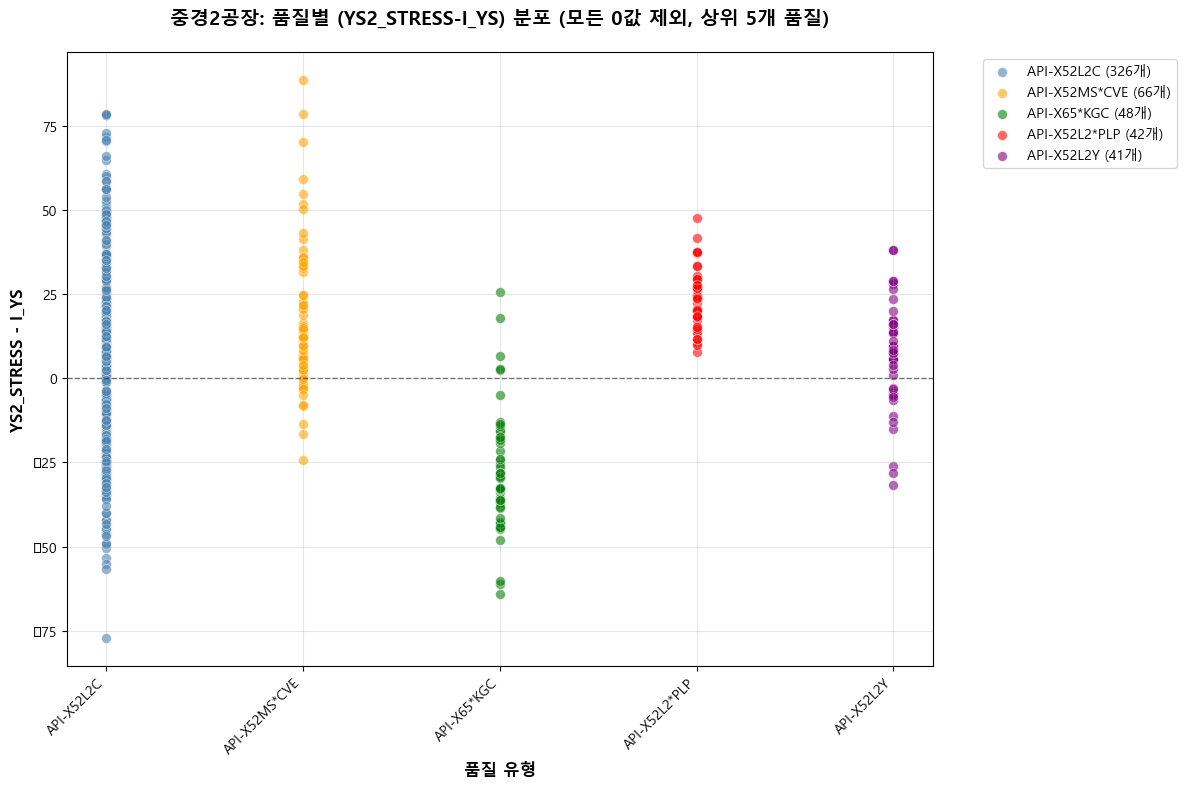


완전 깨끗한 데이터 분석 완료:
- 모든 0값 제외된 데이터 포인트: 712
- 상위 5개 품질 유형 데이터 포인트: 523
- pcm, ceq, hardness, i_ys, i_ts, ys2_stress 모두 0이 아닌 완전히 깨끗한 데이터입니다.


In [29]:
# 완전히 깨끗한 데이터로 품질 vs (YS2_STRESS-I_YS) 산점도 최종 시각화

# YS2_STRESS-I_YS 차이값 계산
ultra_clean_data = ultra_final_filtered_data.copy()
ultra_clean_data['ys_diff_ultra'] = ultra_clean_data['ys2_stress'] - ultra_clean_data['i_ys']

# 결측치 제거
clean_ultra_data = ultra_clean_data.dropna(subset=['quality', 'ys_diff_ultra'])

# quality 컬럼의 데이터 확인
print("완전히 깨끗한 데이터의 quality 컬럼 고유값:")
quality_counts_ultra = clean_ultra_data['quality'].value_counts()
print(quality_counts_ultra.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_ultra = quality_counts_ultra.head(5).index.tolist()
ultra_plot_data = clean_ultra_data[clean_ultra_data['quality'].isin(top_5_qualities_ultra)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_ultra}")
print(f"최종 플롯 데이터 개수: {len(ultra_plot_data)}")

# YS2_STRESS-I_YS 데이터 기본 통계
print(f"\n(YS2_STRESS-I_YS) 기본 통계:")
print(ultra_plot_data['ys_diff_ultra'].describe())

# 0값 최종 검증
print(f"\n최종 데이터 검증:")
print(f"i_ys = 0인 개수: {(ultra_plot_data['i_ys'] == 0).sum()}")
print(f"ys2_stress = 0인 개수: {(ultra_plot_data['ys2_stress'] == 0).sum()}")

# 색상 맵 설정
colors = ['steelblue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_ultra):
    quality_data = ultra_plot_data[ultra_plot_data['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['ys_diff_ultra'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('YS2_STRESS - I_YS', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 (YS2_STRESS-I_YS) 분포 (모든 0값 제외, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_ultra)), top_5_qualities_ultra, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 0 기준선 추가
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n완전 깨끗한 데이터 분석 완료:")
print(f"- 모든 0값 제외된 데이터 포인트: {len(clean_ultra_data)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(ultra_plot_data)}")
print(f"- pcm, ceq, hardness, i_ys, i_ts, ys2_stress 모두 0이 아닌 완전히 깨끗한 데이터입니다.")


In [30]:
# 중경2공장 데이터에서 pcm, ceq, hardness, i_ys, i_ts, ys2_stress, ts_stress 값이 0인 데이터 완전 필터링

print("기존 ultra_final_filtered_data 개수:", len(ultra_final_filtered_data))

# ts_stress 값이 0인 개수 확인
print(f"\nts_stress = 0인 개수: {(ultra_final_filtered_data['ts_stress'] == 0).sum()}")
print(f"ts_stress 결측치 개수: {ultra_final_filtered_data['ts_stress'].isna().sum()}")

# 모든 주요 컬럼들이 0이 아닌 데이터만 필터링
perfect_clean_data = ultra_final_filtered_data[
    (ultra_final_filtered_data['pcm'] != 0) & 
    (ultra_final_filtered_data['ceq'] != 0) & 
    (ultra_final_filtered_data['hardness'] != 0) &
    (ultra_final_filtered_data['i_ys'] != 0) &
    (ultra_final_filtered_data['i_ts'] != 0) &
    (ultra_final_filtered_data['ys2_stress'] != 0) &
    (ultra_final_filtered_data['ts_stress'] != 0)
]

print(f"\n완전 필터링 후 중경2공장 데이터 개수: {len(perfect_clean_data)}")
print(f"ts_stress=0 제외로 추가 제거된 데이터 개수: {len(ultra_final_filtered_data) - len(perfect_clean_data)}")
print(f"원본 대비 전체 제거된 데이터 개수: {len(junggyeong2_data) - len(perfect_clean_data)}")
print(f"데이터 보존율: {len(perfect_clean_data)/len(junggyeong2_data)*100:.1f}%")

# 완전 필터링된 데이터의 기본 통계 확인
print(f"\n완전 필터링된 데이터의 주요 컬럼 기본 통계:")
print("ts_stress 통계:")
print(perfect_clean_data['ts_stress'].describe())
print("\nys2_stress 통계:")
print(perfect_clean_data['ys2_stress'].describe())
print("\ni_ts 통계:")
print(perfect_clean_data['i_ts'].describe())
print("\ni_ys 통계:")
print(perfect_clean_data['i_ys'].describe())

# 모든 0값 최종 검증
print(f"\n완전 데이터 검증:")
print(f"pcm = 0인 개수: {(perfect_clean_data['pcm'] == 0).sum()}")
print(f"ceq = 0인 개수: {(perfect_clean_data['ceq'] == 0).sum()}")
print(f"hardness = 0인 개수: {(perfect_clean_data['hardness'] == 0).sum()}")
print(f"i_ys = 0인 개수: {(perfect_clean_data['i_ys'] == 0).sum()}")
print(f"i_ts = 0인 개수: {(perfect_clean_data['i_ts'] == 0).sum()}")
print(f"ys2_stress = 0인 개수: {(perfect_clean_data['ys2_stress'] == 0).sum()}")
print(f"ts_stress = 0인 개수: {(perfect_clean_data['ts_stress'] == 0).sum()}")

# 모든 조건 검증
zero_counts = [
    (perfect_clean_data['pcm'] == 0).sum(),
    (perfect_clean_data['ceq'] == 0).sum(),
    (perfect_clean_data['hardness'] == 0).sum(),
    (perfect_clean_data['i_ys'] == 0).sum(),
    (perfect_clean_data['i_ts'] == 0).sum(),
    (perfect_clean_data['ys2_stress'] == 0).sum(),
    (perfect_clean_data['ts_stress'] == 0).sum()
]

if all(count == 0 for count in zero_counts):
    print("\n✅ 모든 주요 컬럼의 0값들이 성공적으로 제외되었습니다!")
else:
    print("\n❌ 아직 0값이 남아있는 컬럼이 있습니다.")


기존 ultra_final_filtered_data 개수: 712

ts_stress = 0인 개수: 0
ts_stress 결측치 개수: 0

완전 필터링 후 중경2공장 데이터 개수: 712
ts_stress=0 제외로 추가 제거된 데이터 개수: 0
원본 대비 전체 제거된 데이터 개수: 4656
데이터 보존율: 13.3%

완전 필터링된 데이터의 주요 컬럼 기본 통계:
ts_stress 통계:
count    712.000000
mean     539.931803
std       30.969958
min      487.618000
25%      520.236000
50%      533.163500
75%      544.130000
max      639.474000
Name: ts_stress, dtype: float64

ys2_stress 통계:
count    712.000000
mean     464.953713
std       34.073096
min      364.796000
25%      437.574500
50%      464.663500
75%      485.715000
max      561.532770
Name: ys2_stress, dtype: float64

i_ts 통계:
count    712.000000
mean     529.251404
std       33.165527
min      477.000000
25%      510.000000
50%      521.000000
75%      533.000000
max      650.000000
Name: i_ts, dtype: float64

i_ys 통계:
count    712.000000
mean     458.414326
std       32.286838
min      405.000000
25%      438.750000
50%      451.000000
75%      467.000000
max      572.000000
Name: i_ys

완벽하게 깨끗한 데이터의 quality 컬럼 고유값:
quality
API-X52L2C         326
API-X52MS*CVE       66
API-X65*KGC         48
API-X52L2*PLP       42
API-X52L2Y          41
API-X52L2C-D        39
API-X52MS*MOM       36
API-X52L2*P66       31
API-X52MS*CVE-D     20
API-X60L2I          12
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['API-X52L2C', 'API-X52MS*CVE', 'API-X65*KGC', 'API-X52L2*PLP', 'API-X52L2Y']
최종 완벽 플롯 데이터 개수: 523

(YS2_STRESS-I_YS) 기본 통계:
count    523.000000
mean       6.077641
std       28.263303
min      -77.204000
25%      -14.392500
50%        7.613000
75%       24.008500
max       88.742000
Name: ys_diff_perfect, dtype: float64

완벽한 데이터 최종 검증:
i_ys = 0인 개수: 0
ys2_stress = 0인 개수: 0
i_ts = 0인 개수: 0
ts_stress = 0인 개수: 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_14896\1429412068.py:57: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\DELL\Desktop\jiwoong-data-anal\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


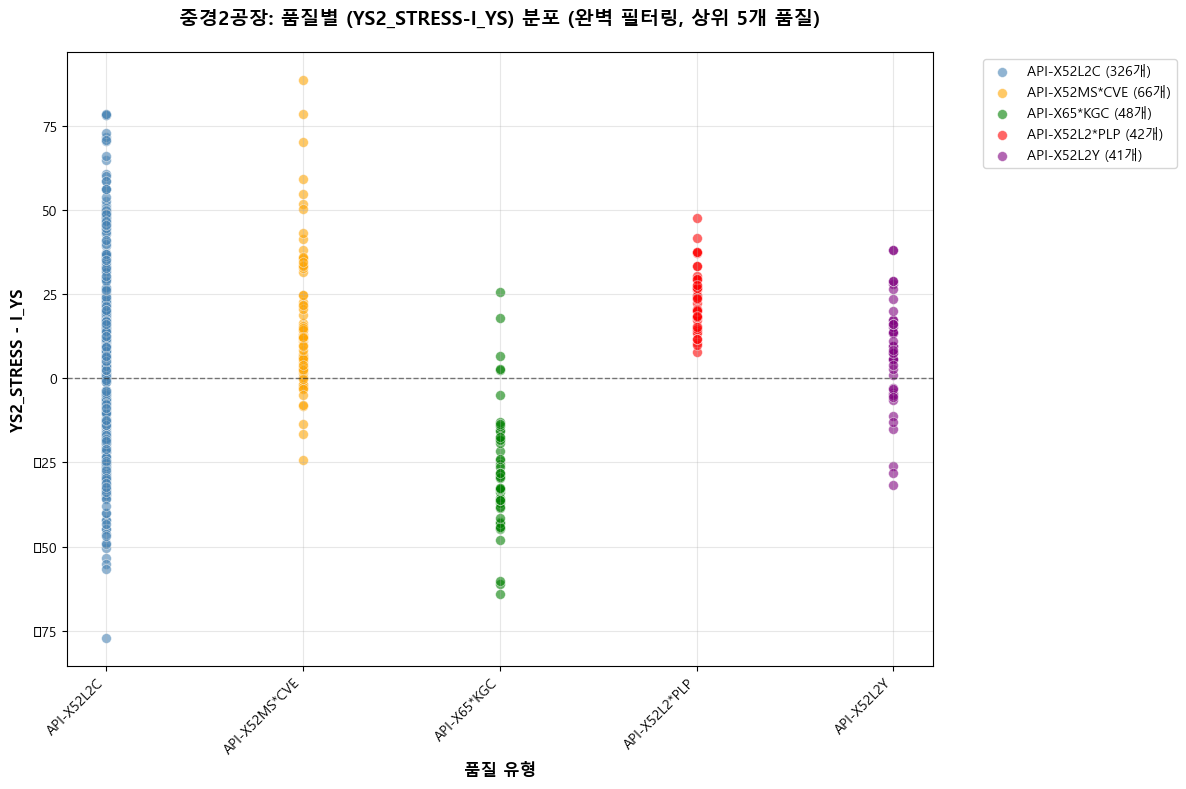


완벽한 데이터 분석 완료:
- 모든 주요 0값 제외된 데이터 포인트: 712
- 상위 5개 품질 유형 데이터 포인트: 523
- pcm, ceq, hardness, i_ys, i_ts, ys2_stress, ts_stress 모두 0이 아닌 완벽한 데이터입니다.
- 원본 데이터 대비 13.3% 보존되었습니다.


In [31]:
# 완벽하게 깨끗한 데이터로 품질 vs (YS2_STRESS-I_YS) 산점도 최종 완성 시각화

# YS2_STRESS-I_YS 차이값 계산
perfect_data = perfect_clean_data.copy()
perfect_data['ys_diff_perfect'] = perfect_data['ys2_stress'] - perfect_data['i_ys']

# 결측치 제거
clean_perfect_data = perfect_data.dropna(subset=['quality', 'ys_diff_perfect'])

# quality 컬럼의 데이터 확인
print("완벽하게 깨끗한 데이터의 quality 컬럼 고유값:")
quality_counts_perfect = clean_perfect_data['quality'].value_counts()
print(quality_counts_perfect.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_perfect = quality_counts_perfect.head(5).index.tolist()
perfect_plot_data = clean_perfect_data[clean_perfect_data['quality'].isin(top_5_qualities_perfect)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_perfect}")
print(f"최종 완벽 플롯 데이터 개수: {len(perfect_plot_data)}")

# YS2_STRESS-I_YS 데이터 기본 통계
print(f"\n(YS2_STRESS-I_YS) 기본 통계:")
print(perfect_plot_data['ys_diff_perfect'].describe())

# 완벽한 데이터 검증
print(f"\n완벽한 데이터 최종 검증:")
print(f"i_ys = 0인 개수: {(perfect_plot_data['i_ys'] == 0).sum()}")
print(f"ys2_stress = 0인 개수: {(perfect_plot_data['ys2_stress'] == 0).sum()}")
print(f"i_ts = 0인 개수: {(perfect_plot_data['i_ts'] == 0).sum()}")
print(f"ts_stress = 0인 개수: {(perfect_plot_data['ts_stress'] == 0).sum()}")

# 색상 맵 설정
colors = ['steelblue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_perfect):
    quality_data = perfect_plot_data[perfect_plot_data['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['ys_diff_perfect'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('YS2_STRESS - I_YS', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 (YS2_STRESS-I_YS) 분포 (완벽 필터링, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_perfect)), top_5_qualities_perfect, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 0 기준선 추가
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n완벽한 데이터 분석 완료:")
print(f"- 모든 주요 0값 제외된 데이터 포인트: {len(clean_perfect_data)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(perfect_plot_data)}")
print(f"- pcm, ceq, hardness, i_ys, i_ts, ys2_stress, ts_stress 모두 0이 아닌 완벽한 데이터입니다.")
print(f"- 원본 데이터 대비 {len(perfect_clean_data)/len(junggyeong2_data)*100:.1f}% 보존되었습니다.")


완벽하게 깨끗한 데이터의 quality 컬럼 고유값 (TS 분석):
quality
API-X52L2C         326
API-X52MS*CVE       66
API-X65*KGC         48
API-X52L2*PLP       42
API-X52L2Y          41
API-X52L2C-D        39
API-X52MS*MOM       36
API-X52L2*P66       31
API-X52MS*CVE-D     20
API-X60L2I          12
Name: count, dtype: int64

가장 많은 5개 품질 유형: ['API-X52L2C', 'API-X52MS*CVE', 'API-X65*KGC', 'API-X52L2*PLP', 'API-X52L2Y']
최종 완벽 플롯 데이터 개수: 523

(TS_STRESS-I_TS) 기본 통계:
count    523.000000
mean      11.089881
std       14.541487
min      -20.326000
25%        2.057500
50%        8.163000
75%       16.792000
max       90.567000
Name: ts_diff_perfect, dtype: float64

완벽한 데이터 최종 검증:
i_ts = 0인 개수: 0
ts_stress = 0인 개수: 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_14896\2694717761.py:55: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\DELL\Desktop\jiwoong-data-anal\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


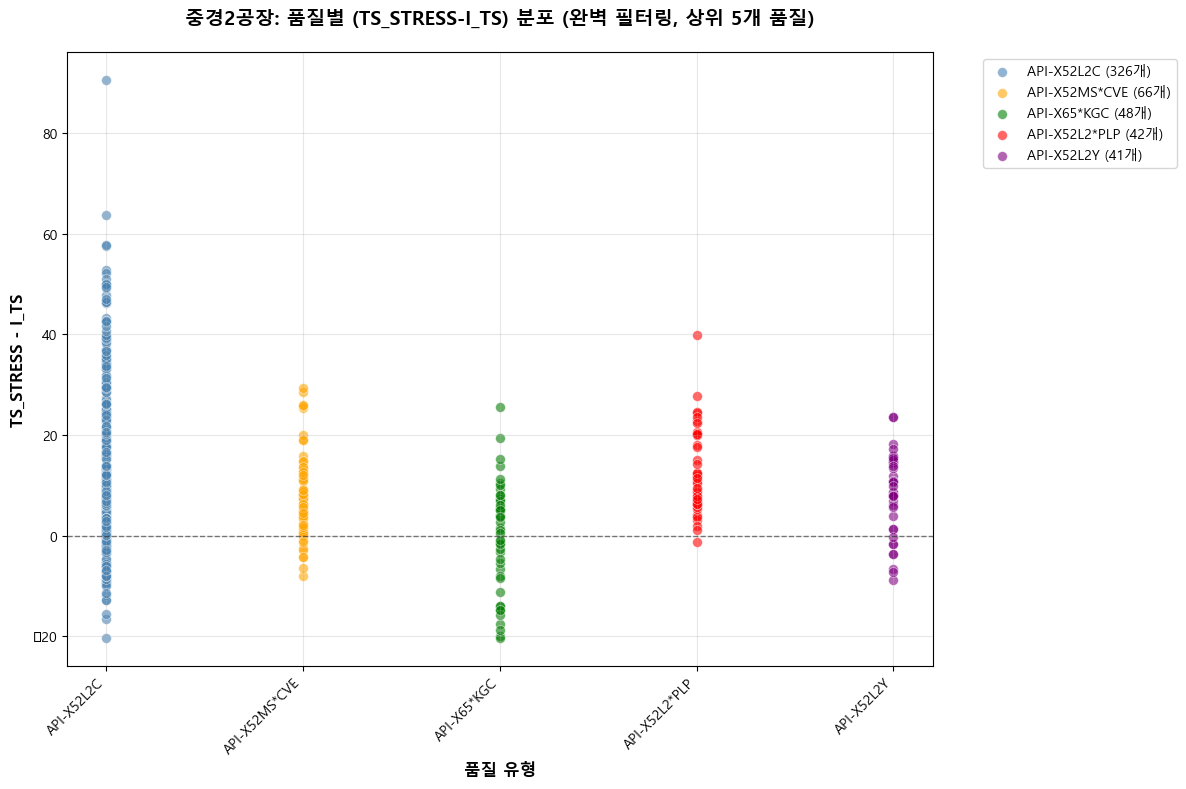


인장강도 차이 분석 완료:
- 모든 주요 0값 제외된 데이터 포인트: 712
- 상위 5개 품질 유형 데이터 포인트: 523
- 품질별 목표 인장강도 대비 실제 성능 차이를 시각화했습니다.
- 양수: 목표 초과, 음수: 목표 미달, 0 근처: 목표 달성


In [32]:
# 완벽하게 깨끗한 데이터로 품질 vs (TS_STRESS-I_TS) 산점도 시각화

# TS_STRESS-I_TS 차이값 계산
perfect_data_ts = perfect_clean_data.copy()
perfect_data_ts['ts_diff_perfect'] = perfect_data_ts['ts_stress'] - perfect_data_ts['i_ts']

# 결측치 제거
clean_perfect_data_ts = perfect_data_ts.dropna(subset=['quality', 'ts_diff_perfect'])

# quality 컬럼의 데이터 확인
print("완벽하게 깨끗한 데이터의 quality 컬럼 고유값 (TS 분석):")
quality_counts_perfect_ts = clean_perfect_data_ts['quality'].value_counts()
print(quality_counts_perfect_ts.head(10))

# 가장 많은 5개의 quality 값만 선택
top_5_qualities_perfect_ts = quality_counts_perfect_ts.head(5).index.tolist()
perfect_plot_data_ts = clean_perfect_data_ts[clean_perfect_data_ts['quality'].isin(top_5_qualities_perfect_ts)]

print(f"\n가장 많은 5개 품질 유형: {top_5_qualities_perfect_ts}")
print(f"최종 완벽 플롯 데이터 개수: {len(perfect_plot_data_ts)}")

# TS_STRESS-I_TS 데이터 기본 통계
print(f"\n(TS_STRESS-I_TS) 기본 통계:")
print(perfect_plot_data_ts['ts_diff_perfect'].describe())

# 완벽한 데이터 검증
print(f"\n완벽한 데이터 최종 검증:")
print(f"i_ts = 0인 개수: {(perfect_plot_data_ts['i_ts'] == 0).sum()}")
print(f"ts_stress = 0인 개수: {(perfect_plot_data_ts['ts_stress'] == 0).sum()}")

# 색상 맵 설정
colors = ['steelblue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(12, 8))

# 각 품질별로 산점도 그리기
for i, quality_type in enumerate(top_5_qualities_perfect_ts):
    quality_data = perfect_plot_data_ts[perfect_plot_data_ts['quality'] == quality_type]
    plt.scatter([i] * len(quality_data), quality_data['ts_diff_perfect'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{quality_type} ({len(quality_data)}개)', 
               edgecolors='white', linewidth=0.5)

plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('TS_STRESS - I_TS', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 (TS_STRESS-I_TS) 분포 (완벽 필터링, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(len(top_5_qualities_perfect_ts)), top_5_qualities_perfect_ts, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 0 기준선 추가
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, linewidth=1)

# 레이아웃 조정
plt.tight_layout()
plt.show()

print(f"\n인장강도 차이 분석 완료:")
print(f"- 모든 주요 0값 제외된 데이터 포인트: {len(clean_perfect_data_ts)}")
print(f"- 상위 5개 품질 유형 데이터 포인트: {len(perfect_plot_data_ts)}")
print(f"- 품질별 목표 인장강도 대비 실제 성능 차이를 시각화했습니다.")
print(f"- 양수: 목표 초과, 음수: 목표 미달, 0 근처: 목표 달성")


In [33]:
# 중경2공장 데이터 중 API-X52 계열, ys2_stress 360~530 범위 데이터 필터링 및 산점도

# API-X52 계열 데이터 찾기
print("완벽한 데이터에서 API-X52 관련 데이터 검색:")
print("quality 컬럼의 고유값들:")
quality_values = perfect_clean_data['quality'].unique()
for value in sorted(quality_values):
    print(f"  - {value}")

# API-X52가 포함된 품질 찾기
api_x52_qualities = [q for q in quality_values if 'x52' in str(q).lower() or 'api' in str(q).lower()]
print(f"\nAPI-X52 관련 품질들: {api_x52_qualities}")

# p_spec 컬럼에서도 확인
print(f"\np_spec 컬럼의 고유값들:")
spec_values = perfect_clean_data['p_spec'].unique()
api_x52_specs = [s for s in spec_values if 'x52' in str(s).lower() or 'api' in str(s).lower()]
print(f"API-X52 관련 p_spec들: {api_x52_specs}")

# API-X52 계열 데이터 필터링 (quality 또는 p_spec에서)
api_x52_data = perfect_clean_data[
    (perfect_clean_data['quality'].str.contains('x52|api', case=False, na=False)) |
    (perfect_clean_data['p_spec'].str.contains('x52|api', case=False, na=False))
]

print(f"\nAPI-X52 계열 데이터 개수: {len(api_x52_data)}")

# ys2_stress 360~530 범위 추가 필터링
ys2_filtered_data = api_x52_data[
    (api_x52_data['ys2_stress'] >= 360) & 
    (api_x52_data['ys2_stress'] <= 530)
]

print(f"ys2_stress 360~530 범위 데이터 개수: {len(ys2_filtered_data)}")

if len(ys2_filtered_data) > 0:
    print(f"\n필터링된 데이터의 ys2_stress 통계:")
    print(ys2_filtered_data['ys2_stress'].describe())
    
    print(f"\n필터링된 데이터의 품질 분포:")
    print(ys2_filtered_data['quality'].value_counts())
    
    print(f"\n필터링된 데이터의 p_spec 분포:")
    print(ys2_filtered_data['p_spec'].value_counts())
else:
    print("\n조건에 맞는 데이터가 없습니다. 조건을 다시 확인해보겠습니다.")
    
    # 대안 검색
    print("\n대안 검색 - 'X52'가 포함된 모든 컬럼들:")
    x52_in_quality = perfect_clean_data[perfect_clean_data['quality'].str.contains('52', case=False, na=False)]
    x52_in_spec = perfect_clean_data[perfect_clean_data['p_spec'].str.contains('52', case=False, na=False)]
    
    print(f"quality에 '52'가 포함된 데이터: {len(x52_in_quality)}개")
    if len(x52_in_quality) > 0:
        print("해당 quality 값들:", x52_in_quality['quality'].unique())
        
    print(f"p_spec에 '52'가 포함된 데이터: {len(x52_in_spec)}개")
    if len(x52_in_spec) > 0:
        print("해당 p_spec 값들:", x52_in_spec['p_spec'].unique())


완벽한 데이터에서 API-X52 관련 데이터 검색:
quality 컬럼의 고유값들:
  - API-X52
  - API-X52L2*KRE
  - API-X52L2*P66
  - API-X52L2*PLP
  - API-X52L2C
  - API-X52L2C-D
  - API-X52L2Y
  - API-X52MS*CVE
  - API-X52MS*CVE-D
  - API-X52MS*MOM
  - API-X52MS*SGEN
  - API-X56L2
  - API-X60L2I
  - API-X65*KGC
  - API-X65L2*HALA
  - API-X65L2*KRE
  - API-X65L2I

API-X52 관련 품질들: ['API-X52', 'API-X52L2C', 'API-X65*KGC', 'API-X56L2', 'API-X52L2Y', 'API-X52L2C-D', 'API-X60L2I', 'API-X52L2*PLP', 'API-X52L2*KRE', 'API-X52L2*P66', 'API-X52MS*MOM', 'API-X52MS*CVE', 'API-X52MS*CVE-D', 'API-X52MS*SGEN', 'API-X65L2*KRE', 'API-X65L2I', 'API-X65L2*HALA']

p_spec 컬럼의 고유값들:
API-X52 관련 p_spec들: ['NX52L2', 'NX52L2T', 'NX52MS', 'NX52L1']

API-X52 계열 데이터 개수: 712
ys2_stress 360~530 범위 데이터 개수: 676

필터링된 데이터의 ys2_stress 통계:
count    676.000000
mean     460.866967
std       29.811826
min      364.796000
25%      436.331750
50%      463.002500
75%      481.368750
max      528.681000
Name: ys2_stress, dtype: float64

필터링된 데이터의 품질 분포:
quality

산점도용 최종 데이터 개수: 676

품질별 데이터 분포:
quality
API-X52L2C         326
API-X52MS*CVE       65
API-X52L2*PLP       42
API-X52L2Y          41
API-X52L2C-D        39
API-X52MS*MOM       36
API-X65*KGC         35
API-X52L2*P66       31
API-X52MS*CVE-D     20
API-X52MS*SGEN      11
API-X65L2*HALA       7
API-X52              6
API-X52L2*KRE        6
API-X60L2I           5
API-X65L2I           5
API-X56L2            1
Name: count, dtype: int64


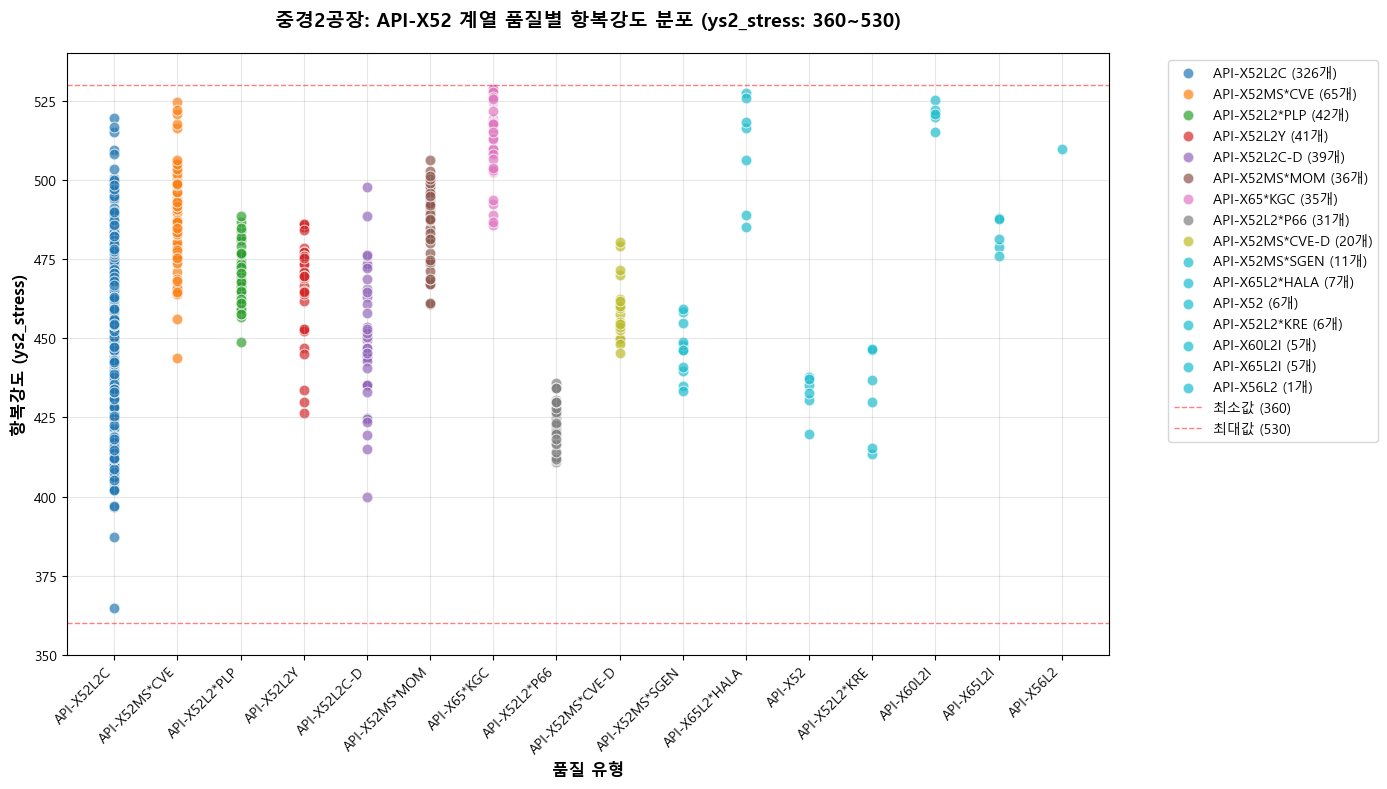


상세 분석:
- 전체 데이터 포인트: 676
- ys2_stress 범위: 364.8 ~ 528.7
- 평균 항복강도: 460.9
- 표준편차: 29.8


In [34]:
# API-X52 계열, ys2_stress 360~530 범위 데이터 산점도 시각화

if len(ys2_filtered_data) > 0:
    # 결측치 제거
    clean_ys2_filtered = ys2_filtered_data.dropna(subset=['quality', 'ys2_stress'])
    
    print(f"산점도용 최종 데이터 개수: {len(clean_ys2_filtered)}")
    
    # 품질별 분포 확인
    quality_counts_filtered = clean_ys2_filtered['quality'].value_counts()
    print(f"\n품질별 데이터 분포:")
    print(quality_counts_filtered)
    
    # 모든 품질 유형 사용 (5개 제한 없이)
    all_qualities = quality_counts_filtered.index.tolist()
    
    # 색상 설정 (품질 개수에 맞게)
    import matplotlib.cm as cm
    colors = cm.tab10(range(len(all_qualities)))
    
    plt.figure(figsize=(14, 8))
    
    # 각 품질별로 산점도 그리기
    for i, quality_type in enumerate(all_qualities):
        quality_data = clean_ys2_filtered[clean_ys2_filtered['quality'] == quality_type]
        plt.scatter([i] * len(quality_data), quality_data['ys2_stress'], 
                   alpha=0.7, s=60, c=[colors[i]], 
                   label=f'{quality_type} ({len(quality_data)}개)', 
                   edgecolors='white', linewidth=0.8)
    
    plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
    plt.ylabel('항복강도 (ys2_stress)', fontsize=12, fontweight='bold')
    plt.title('중경2공장: API-X52 계열 품질별 항복강도 분포 (ys2_stress: 360~530)', fontsize=14, fontweight='bold', pad=20)
    plt.xticks(range(len(all_qualities)), all_qualities, rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    
    # 범위 표시선 추가
    plt.axhline(y=360, color='red', linestyle='--', alpha=0.5, linewidth=1, label='최소값 (360)')
    plt.axhline(y=530, color='red', linestyle='--', alpha=0.5, linewidth=1, label='최대값 (530)')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Y축 범위 설정
    plt.ylim(350, 540)
    
    # 레이아웃 조정
    plt.tight_layout()
    plt.show()
    
    # 통계 정보
    print(f"\n상세 분석:")
    print(f"- 전체 데이터 포인트: {len(clean_ys2_filtered)}")
    print(f"- ys2_stress 범위: {clean_ys2_filtered['ys2_stress'].min():.1f} ~ {clean_ys2_filtered['ys2_stress'].max():.1f}")
    print(f"- 평균 항복강도: {clean_ys2_filtered['ys2_stress'].mean():.1f}")
    print(f"- 표준편차: {clean_ys2_filtered['ys2_stress'].std():.1f}")
    
else:
    print("조건에 맞는 데이터가 없어서 산점도를 그릴 수 없습니다.")
    print("다른 조건으로 다시 시도해보겠습니다.")
    
    # 전체 데이터에서 ys2_stress 360~530 범위만 필터링
    general_ys2_filtered = perfect_clean_data[
        (perfect_clean_data['ys2_stress'] >= 360) & 
        (perfect_clean_data['ys2_stress'] <= 530)
    ]
    
    print(f"\n전체 데이터에서 ys2_stress 360~530 범위: {len(general_ys2_filtered)}개")
    
    if len(general_ys2_filtered) > 0:
        # 상위 5개 품질만 선택
        quality_counts_general = general_ys2_filtered['quality'].value_counts()
        top_5_qualities = quality_counts_general.head(5).index.tolist()
        top_5_data = general_ys2_filtered[general_ys2_filtered['quality'].isin(top_5_qualities)]
        
        colors = ['steelblue', 'orange', 'green', 'red', 'purple']
        
        plt.figure(figsize=(12, 8))
        
        for i, quality_type in enumerate(top_5_qualities):
            quality_data = top_5_data[top_5_data['quality'] == quality_type]
            plt.scatter([i] * len(quality_data), quality_data['ys2_stress'], 
                       alpha=0.6, s=50, c=colors[i], 
                       label=f'{quality_type} ({len(quality_data)}개)', 
                       edgecolors='white', linewidth=0.5)
        
        plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
        plt.ylabel('항복강도 (ys2_stress)', fontsize=12, fontweight='bold')
        plt.title('중경2공장: 품질별 항복강도 분포 (ys2_stress: 360~530, 상위 5개 품질)', fontsize=14, fontweight='bold', pad=20)
        plt.xticks(range(len(top_5_qualities)), top_5_qualities, rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # 범위 표시선
        plt.axhline(y=360, color='red', linestyle='--', alpha=0.5, linewidth=1)
        plt.axhline(y=530, color='red', linestyle='--', alpha=0.5, linewidth=1)
        plt.ylim(350, 540)
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n대안 분석 완료:")
        print(f"- 전체 데이터 포인트: {len(top_5_data)}")
        print(f"- 상위 5개 품질: {top_5_qualities}")


Stripplot용 데이터 개수: 676
품질별 분포:
quality
API-X52L2C         326
API-X52MS*CVE       65
API-X52L2*PLP       42
API-X52L2Y          41
API-X52L2C-D        39
API-X52MS*MOM       36
API-X65*KGC         35
API-X52L2*P66       31
API-X52MS*CVE-D     20
API-X52MS*SGEN      11
API-X65L2*HALA       7
API-X52              6
API-X52L2*KRE        6
API-X60L2I           5
API-X65L2I           5
API-X56L2            1
Name: count, dtype: int64

상위 8개 품질 선택 후 데이터 개수: 615


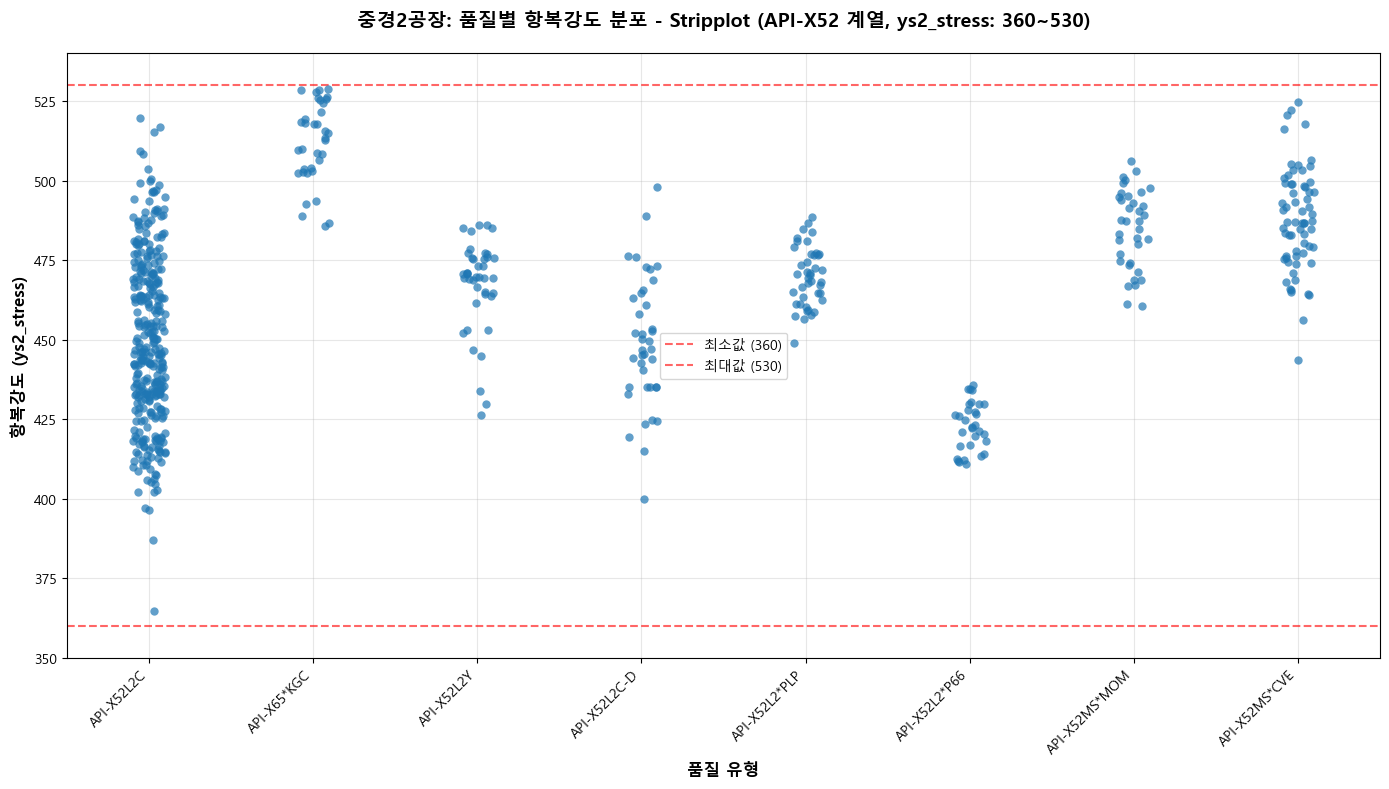


Stripplot 분석 결과:
- 시각화된 데이터 포인트: 615
- 품질 유형 개수: 8
- ys2_stress 범위: 364.8 ~ 528.7
- 평균 항복강도: 460.5
- 표준편차: 29.7

품질별 상세 통계:
API-X52L2C: 개수=326, 평균=449.6, 표준편차=26.5
API-X52MS*CVE: 개수=65, 평균=487.9, 표준편차=16.2
API-X52L2*PLP: 개수=42, 평균=469.9, 표준편차=9.3
API-X52L2Y: 개수=41, 평균=467.2, 표준편차=14.5
API-X52L2C-D: 개수=39, 평균=449.2, 표준편차=20.7
API-X52MS*MOM: 개수=36, 평균=485.0, 표준편차=12.4
API-X65*KGC: 개수=35, 평균=512.0, 표준편차=12.6
API-X52L2*P66: 개수=31, 평균=422.8, 표준편차=7.6


In [35]:
# ys2_stress 360~530 범위 데이터를 stripplot으로 시각화

import seaborn as sns

# 데이터 준비 (이전 셀에서 필터링된 데이터 사용)
if len(ys2_filtered_data) > 0:
    # API-X52 계열 데이터가 있는 경우
    plot_data = ys2_filtered_data.dropna(subset=['quality', 'ys2_stress']).copy()
    title_suffix = "API-X52 계열"
else:
    # 전체 데이터에서 ys2_stress 범위만 필터링
    plot_data = perfect_clean_data[
        (perfect_clean_data['ys2_stress'] >= 360) & 
        (perfect_clean_data['ys2_stress'] <= 530)
    ].dropna(subset=['quality', 'ys2_stress']).copy()
    title_suffix = "전체 데이터"

print(f"Stripplot용 데이터 개수: {len(plot_data)}")
print(f"품질별 분포:")
print(plot_data['quality'].value_counts())

# 상위 품질들만 선택 (너무 많으면 가독성이 떨어짐)
top_qualities = plot_data['quality'].value_counts().head(8).index.tolist()
filtered_plot_data = plot_data[plot_data['quality'].isin(top_qualities)]

print(f"\n상위 8개 품질 선택 후 데이터 개수: {len(filtered_plot_data)}")

# 그래프 크기 설정
plt.figure(figsize=(14, 8))

# Stripplot 생성
sns.stripplot(data=filtered_plot_data, 
              x='quality', 
              y='ys2_stress',
              size=6,
              alpha=0.7,
              jitter=True)

# 그래프 꾸미기
plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('항복강도 (ys2_stress)', fontsize=12, fontweight='bold')
plt.title(f'중경2공장: 품질별 항복강도 분포 - Stripplot ({title_suffix}, ys2_stress: 360~530)', 
          fontsize=14, fontweight='bold', pad=20)

# X축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 범위 표시선 추가
plt.axhline(y=360, color='red', linestyle='--', alpha=0.6, linewidth=1.5, label='최소값 (360)')
plt.axhline(y=530, color='red', linestyle='--', alpha=0.6, linewidth=1.5, label='최대값 (530)')

# Y축 범위 설정
plt.ylim(350, 540)

# 그리드 추가
plt.grid(True, alpha=0.3)

# 범례 추가
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 통계 정보
print(f"\nStripplot 분석 결과:")
print(f"- 시각화된 데이터 포인트: {len(filtered_plot_data)}")
print(f"- 품질 유형 개수: {len(top_qualities)}")
print(f"- ys2_stress 범위: {filtered_plot_data['ys2_stress'].min():.1f} ~ {filtered_plot_data['ys2_stress'].max():.1f}")
print(f"- 평균 항복강도: {filtered_plot_data['ys2_stress'].mean():.1f}")
print(f"- 표준편차: {filtered_plot_data['ys2_stress'].std():.1f}")

# 품질별 통계
print(f"\n품질별 상세 통계:")
for quality in top_qualities:
    quality_data = filtered_plot_data[filtered_plot_data['quality'] == quality]['ys2_stress']
    print(f"{quality}: 개수={len(quality_data)}, 평균={quality_data.mean():.1f}, 표준편차={quality_data.std():.1f}")


두께 분석용 데이터 개수: 676
품질별 분포:
quality
API-X52L2C         326
API-X52MS*CVE       65
API-X52L2*PLP       42
API-X52L2Y          41
API-X52L2C-D        39
API-X52MS*MOM       36
API-X65*KGC         35
API-X52L2*P66       31
API-X52MS*CVE-D     20
API-X52MS*SGEN      11
API-X65L2*HALA       7
API-X52              6
API-X52L2*KRE        6
API-X60L2I           5
API-X65L2I           5
API-X56L2            1
Name: count, dtype: int64

p_thick_mm 기본 통계:
count    676.000000
mean       9.924926
std        2.249835
min        6.350000
25%        9.300000
50%        9.500000
75%        9.500000
max       19.100000
Name: p_thick_mm, dtype: float64

상위 8개 품질 선택 후 데이터 개수: 615


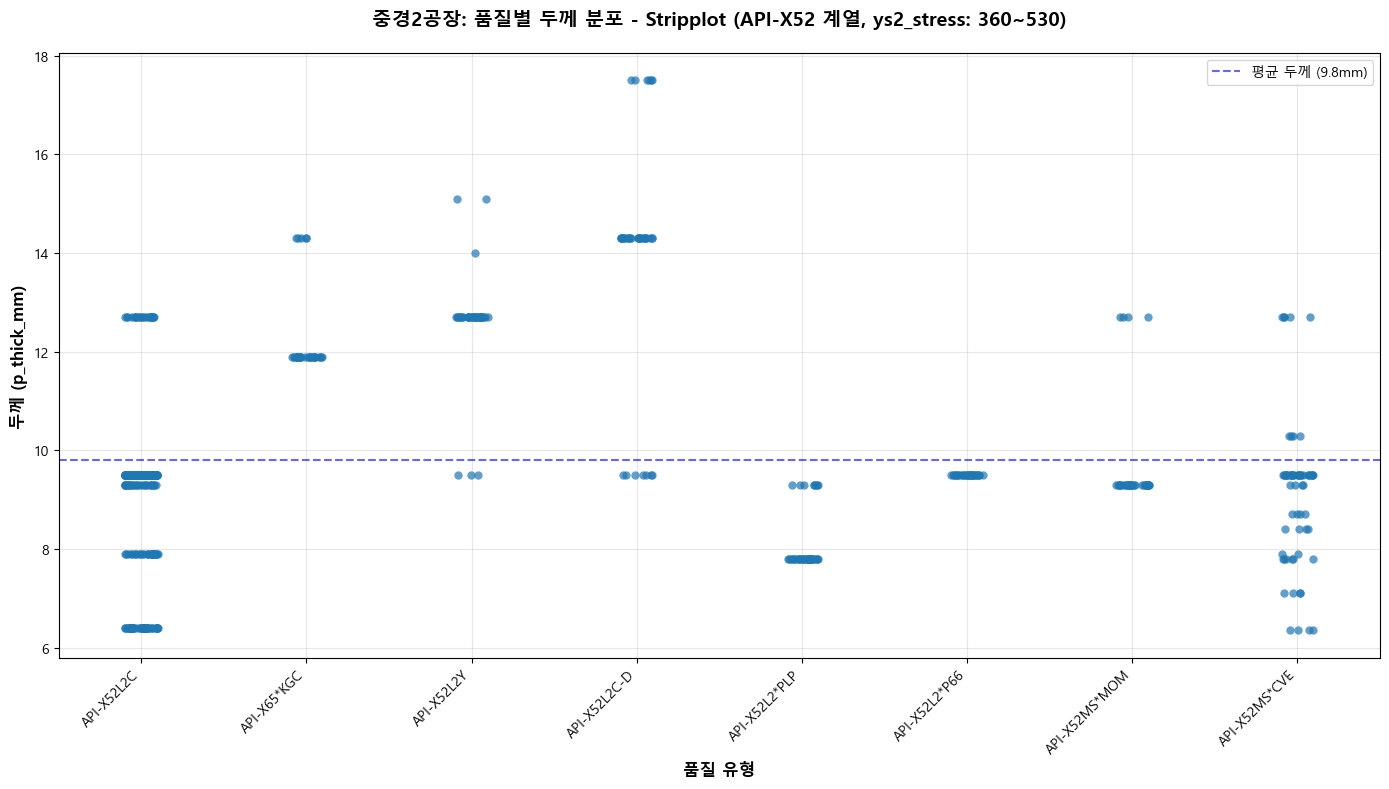


두께 분포 분석 결과:
- 시각화된 데이터 포인트: 615
- 품질 유형 개수: 8
- p_thick_mm 범위: 6.3 ~ 17.5 mm
- 평균 두께: 9.8 mm
- 표준편차: 2.1 mm

품질별 두께 상세 통계:
API-X52L2C: 개수=326, 평균=9.1mm, 표준편차=1.5mm, 범위=6.4~12.7mm
API-X52MS*CVE: 개수=65, 평균=9.1mm, 표준편차=1.5mm, 범위=6.3~12.7mm
API-X52L2*PLP: 개수=42, 평균=8.1mm, 표준편차=0.6mm, 범위=7.8~9.3mm
API-X52L2Y: 개수=41, 평균=12.6mm, 표준편차=1.0mm, 범위=9.5~15.1mm
API-X52L2C-D: 개수=39, 평균=13.9mm, 표준편차=2.4mm, 범위=9.5~17.5mm
API-X52MS*MOM: 개수=36, 평균=9.7mm, 표준편차=1.1mm, 범위=9.3~12.7mm
API-X65*KGC: 개수=35, 평균=12.2mm, 표준편차=0.9mm, 범위=11.9~14.3mm
API-X52L2*P66: 개수=31, 평균=9.5mm, 표준편차=0.0mm, 범위=9.5~9.5mm

두께별 데이터 개수 (상위 10개):
9.5mm: 264개
9.3mm: 72개
12.7mm: 68개
6.4mm: 51개
7.8mm: 40개
14.3mm: 31개
11.9mm: 30개
7.9mm: 30개
17.5mm: 6개
8.4mm: 4개


In [36]:
# 동일 데이터에서 p_thick_mm 분포를 stripplot으로 시각화

# 데이터 준비 (이전과 동일한 필터링된 데이터 사용)
if len(ys2_filtered_data) > 0:
    # API-X52 계열 데이터가 있는 경우
    thickness_data = ys2_filtered_data.dropna(subset=['quality', 'p_thick_mm']).copy()
    title_suffix = "API-X52 계열"
else:
    # 전체 데이터에서 ys2_stress 범위만 필터링
    base_data = perfect_clean_data[
        (perfect_clean_data['ys2_stress'] >= 360) & 
        (perfect_clean_data['ys2_stress'] <= 530)
    ]
    thickness_data = base_data.dropna(subset=['quality', 'p_thick_mm']).copy()
    title_suffix = "전체 데이터"

print(f"두께 분석용 데이터 개수: {len(thickness_data)}")
print(f"품질별 분포:")
print(thickness_data['quality'].value_counts())

print(f"\np_thick_mm 기본 통계:")
print(thickness_data['p_thick_mm'].describe())

# 상위 품질들만 선택
top_qualities_thickness = thickness_data['quality'].value_counts().head(8).index.tolist()
filtered_thickness_data = thickness_data[thickness_data['quality'].isin(top_qualities_thickness)]

print(f"\n상위 8개 품질 선택 후 데이터 개수: {len(filtered_thickness_data)}")

# 그래프 크기 설정
plt.figure(figsize=(14, 8))

# Stripplot 생성
sns.stripplot(data=filtered_thickness_data, 
              x='quality', 
              y='p_thick_mm',
              size=6,
              alpha=0.7,
              jitter=True)

# 그래프 꾸미기
plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('두께 (p_thick_mm)', fontsize=12, fontweight='bold')
plt.title(f'중경2공장: 품질별 두께 분포 - Stripplot ({title_suffix}, ys2_stress: 360~530)', 
          fontsize=14, fontweight='bold', pad=20)

# X축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 두께 범위에 따른 참조선 추가 (일반적인 강판 두께 범위)
thickness_min = filtered_thickness_data['p_thick_mm'].min()
thickness_max = filtered_thickness_data['p_thick_mm'].max()
thickness_mean = filtered_thickness_data['p_thick_mm'].mean()

plt.axhline(y=thickness_mean, color='blue', linestyle='--', alpha=0.6, linewidth=1.5, 
           label=f'평균 두께 ({thickness_mean:.1f}mm)')

# 그리드 추가
plt.grid(True, alpha=0.3)

# 범례 추가
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 통계 정보
print(f"\n두께 분포 분석 결과:")
print(f"- 시각화된 데이터 포인트: {len(filtered_thickness_data)}")
print(f"- 품질 유형 개수: {len(top_qualities_thickness)}")
print(f"- p_thick_mm 범위: {thickness_min:.1f} ~ {thickness_max:.1f} mm")
print(f"- 평균 두께: {thickness_mean:.1f} mm")
print(f"- 표준편차: {filtered_thickness_data['p_thick_mm'].std():.1f} mm")

# 품질별 두께 통계
print(f"\n품질별 두께 상세 통계:")
for quality in top_qualities_thickness:
    quality_thickness = filtered_thickness_data[filtered_thickness_data['quality'] == quality]['p_thick_mm']
    print(f"{quality}: 개수={len(quality_thickness)}, 평균={quality_thickness.mean():.1f}mm, "
          f"표준편차={quality_thickness.std():.1f}mm, 범위={quality_thickness.min():.1f}~{quality_thickness.max():.1f}mm")

# 두께별 데이터 개수 분포
print(f"\n두께별 데이터 개수 (상위 10개):")
thickness_counts = filtered_thickness_data['p_thick_mm'].value_counts().head(10)
for thickness, count in thickness_counts.items():
    print(f"{thickness}mm: {count}개")


In [37]:
# 처음부터 다시 시작: 중경2공장 데이터 완전 필터링

# 1단계: 중경2공장 데이터 추출
print("1단계: 중경2공장 데이터 추출")
junggyeong2_clean = data[data['wc_desc'].str.contains('중경2공장', na=False)]
print(f"중경2공장 원본 데이터 개수: {len(junggyeong2_clean)}")

# 2단계: 지정된 컬럼들의 0값 확인
print(f"\n2단계: 각 컬럼별 0값 개수 확인")
target_columns = ['pcm', 'ceq', 'hardness', 'ys2_stress', 'i_ys', 'ts_stress', 'i_ts']

for col in target_columns:
    if col in junggyeong2_clean.columns:
        zero_count = (junggyeong2_clean[col] == 0).sum()
        na_count = junggyeong2_clean[col].isna().sum()
        print(f"{col}: 0값 {zero_count}개, 결측치 {na_count}개")
    else:
        print(f"{col}: 컬럼이 존재하지 않음")

# 3단계: 모든 지정 컬럼이 0이 아닌 데이터만 필터링
print(f"\n3단계: 완전 필터링 수행")
clean_junggyeong2 = junggyeong2_clean.copy()

for col in target_columns:
    if col in clean_junggyeong2.columns:
        before_count = len(clean_junggyeong2)
        clean_junggyeong2 = clean_junggyeong2[clean_junggyeong2[col] != 0]
        after_count = len(clean_junggyeong2)
        removed = before_count - after_count
        print(f"{col} != 0 필터링: {removed}개 제거, 남은 데이터: {after_count}개")

print(f"\n4단계: 최종 결과")
print(f"원본 중경2공장 데이터: {len(junggyeong2_clean)}개")
print(f"완전 필터링 후 데이터: {len(clean_junggyeong2)}개")
print(f"제거된 데이터: {len(junggyeong2_clean) - len(clean_junggyeong2)}개")
print(f"데이터 보존율: {len(clean_junggyeong2)/len(junggyeong2_clean)*100:.1f}%")

# 5단계: 최종 검증
print(f"\n5단계: 최종 검증 (모든 컬럼의 0값 개수)")
for col in target_columns:
    if col in clean_junggyeong2.columns:
        zero_count = (clean_junggyeong2[col] == 0).sum()
        print(f"{col}: 0값 {zero_count}개")

# 6단계: 필터링된 데이터의 기본 통계
print(f"\n6단계: 필터링된 데이터의 기본 통계")
for col in target_columns:
    if col in clean_junggyeong2.columns:
        print(f"\n{col} 통계:")
        print(clean_junggyeong2[col].describe())

# 검증 결과
all_zero_counts = []
for col in target_columns:
    if col in clean_junggyeong2.columns:
        all_zero_counts.append((clean_junggyeong2[col] == 0).sum())

if all(count == 0 for count in all_zero_counts):
    print(f"\n✅ 모든 지정 컬럼의 0값이 성공적으로 제거되었습니다!")
    print(f"최종 깨끗한 데이터: {len(clean_junggyeong2)}개")
else:
    print(f"\n❌ 일부 컬럼에 아직 0값이 남아있습니다.")

# 전역 변수로 저장 (이후 분석에 사용)
final_clean_data = clean_junggyeong2.copy()
print(f"\n데이터가 'final_clean_data' 변수에 저장되었습니다.")


1단계: 중경2공장 데이터 추출
중경2공장 원본 데이터 개수: 5368

2단계: 각 컬럼별 0값 개수 확인
pcm: 0값 2525개, 결측치 0개
ceq: 0값 2210개, 결측치 0개
hardness: 0값 2715개, 결측치 0개
ys2_stress: 0값 2322개, 결측치 0개
i_ys: 0값 0개, 결측치 2개
ts_stress: 0값 0개, 결측치 0개
i_ts: 0값 0개, 결측치 2개

3단계: 완전 필터링 수행
pcm != 0 필터링: 2525개 제거, 남은 데이터: 2843개
ceq != 0 필터링: 1059개 제거, 남은 데이터: 1784개
hardness != 0 필터링: 416개 제거, 남은 데이터: 1368개
ys2_stress != 0 필터링: 656개 제거, 남은 데이터: 712개
i_ys != 0 필터링: 0개 제거, 남은 데이터: 712개
ts_stress != 0 필터링: 0개 제거, 남은 데이터: 712개
i_ts != 0 필터링: 0개 제거, 남은 데이터: 712개

4단계: 최종 결과
원본 중경2공장 데이터: 5368개
완전 필터링 후 데이터: 712개
제거된 데이터: 4656개
데이터 보존율: 13.3%

5단계: 최종 검증 (모든 컬럼의 0값 개수)
pcm: 0값 0개
ceq: 0값 0개
hardness: 0값 0개
ys2_stress: 0값 0개
i_ys: 0값 0개
ts_stress: 0값 0개
i_ts: 0값 0개

6단계: 필터링된 데이터의 기본 통계

pcm 통계:
count    712.000000
mean       0.123638
std        0.014411
min        0.095000
25%        0.118000
50%        0.125000
75%        0.129000
max        0.175000
Name: pcm, dtype: float64

ceq 통계:
count    712.000000
mean       0.235900
std        0.042

Stripplot용 데이터 개수: 712

품질별 데이터 분포:
quality
API-X52L2C         326
API-X52MS*CVE       66
API-X65*KGC         48
API-X52L2*PLP       42
API-X52L2Y          41
API-X52L2C-D        39
API-X52MS*MOM       36
API-X52L2*P66       31
API-X52MS*CVE-D     20
API-X60L2I          12
Name: count, dtype: int64

두께(p_thick_mm) 기본 통계:
count    712.000000
mean      10.151503
std        2.436097
min        6.350000
25%        9.300000
50%        9.500000
75%       11.900000
max       19.100000
Name: p_thick_mm, dtype: float64

상위 8개 품질 선택:
1. API-X52L2C: 326개
2. API-X52MS*CVE: 66개
3. API-X65*KGC: 48개
4. API-X52L2*PLP: 42개
5. API-X52L2Y: 41개
6. API-X52L2C-D: 39개
7. API-X52MS*MOM: 36개
8. API-X52L2*P66: 31개

최종 시각화 데이터 개수: 629


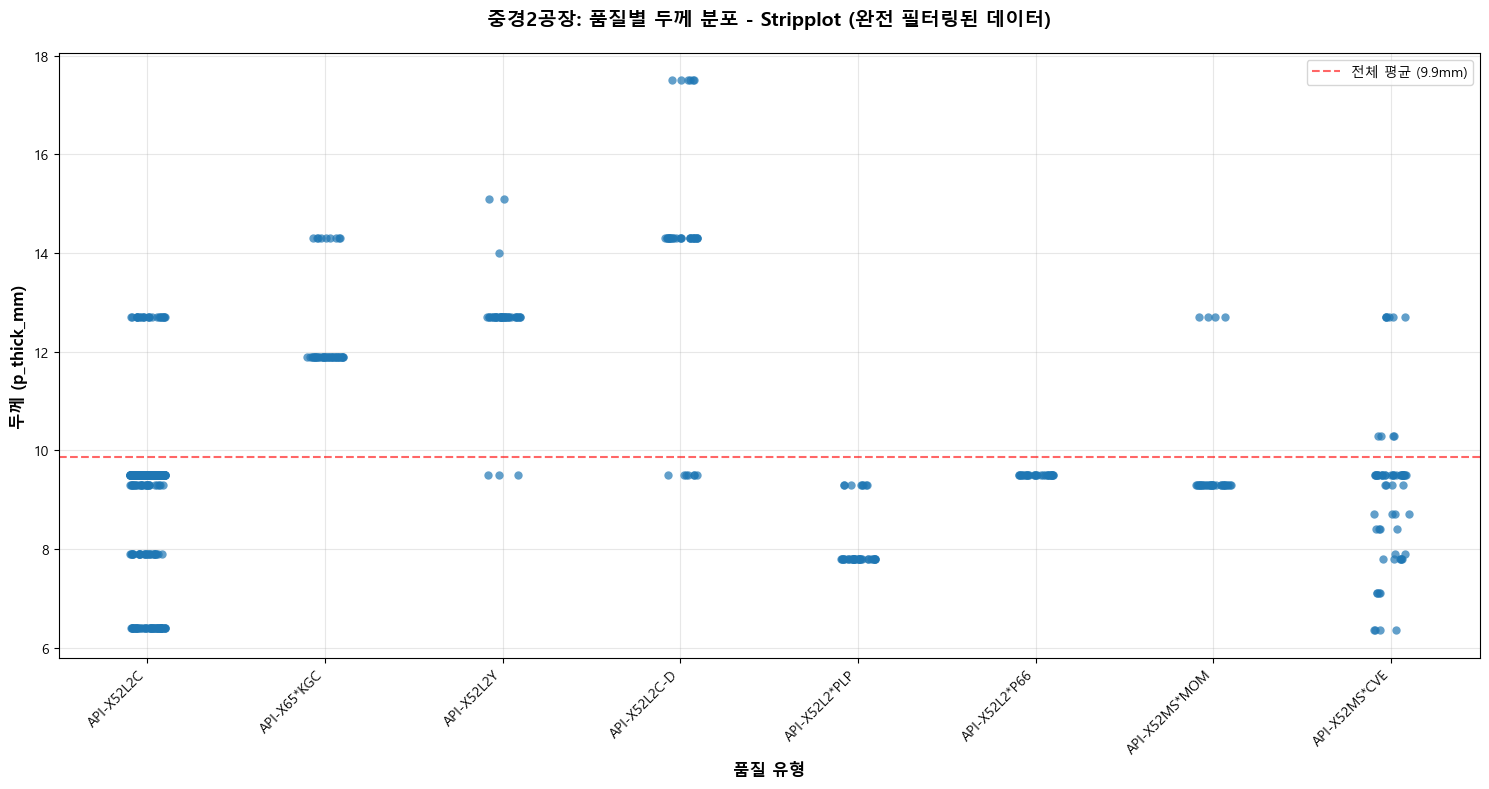


=== 품질별 두께 분석 결과 ===
전체 통계:
- 데이터 포인트: 629개
- 두께 범위: 6.3 ~ 17.5 mm
- 평균 두께: 9.9 mm
- 표준편차: 2.1 mm

품질별 상세 통계:
API-X52L2C:
  - 개수: 326개
  - 평균: 9.1mm
  - 표준편차: 1.5mm
  - 범위: 6.4 ~ 12.7mm
API-X52MS*CVE:
  - 개수: 66개
  - 평균: 9.2mm
  - 표준편차: 1.5mm
  - 범위: 6.3 ~ 12.7mm
API-X65*KGC:
  - 개수: 48개
  - 평균: 12.3mm
  - 표준편차: 0.9mm
  - 범위: 11.9 ~ 14.3mm
API-X52L2*PLP:
  - 개수: 42개
  - 평균: 8.1mm
  - 표준편차: 0.6mm
  - 범위: 7.8 ~ 9.3mm
API-X52L2Y:
  - 개수: 41개
  - 평균: 12.6mm
  - 표준편차: 1.0mm
  - 범위: 9.5 ~ 15.1mm
API-X52L2C-D:
  - 개수: 39개
  - 평균: 13.9mm
  - 표준편차: 2.4mm
  - 범위: 9.5 ~ 17.5mm
API-X52MS*MOM:
  - 개수: 36개
  - 평균: 9.7mm
  - 표준편차: 1.1mm
  - 범위: 9.3 ~ 12.7mm
API-X52L2*P66:
  - 개수: 31개
  - 평균: 9.5mm
  - 표준편차: 0.0mm
  - 범위: 9.5 ~ 9.5mm

가장 많이 사용되는 두께 (상위 15개):
9.5mm: 264개 (42.0%)
9.3mm: 72개 (11.4%)
12.7mm: 69개 (11.0%)
6.4mm: 51개 (8.1%)
7.8mm: 40개 (6.4%)
11.9mm: 39개 (6.2%)
14.3mm: 35개 (5.6%)
7.9mm: 30개 (4.8%)
17.5mm: 6개 (1.0%)
8.4mm: 4개 (0.6%)
8.7mm: 4개 (0.6%)
10.3mm: 4개 (0.6%)
7.1mm: 4개 (0.6%)
6.35mm: 

In [38]:
# 깨끗한 데이터로 품질 vs 두께 stripplot 시각화

# 결측치 제거
plot_data = final_clean_data.dropna(subset=['quality', 'p_thick_mm']).copy()

print(f"Stripplot용 데이터 개수: {len(plot_data)}")

# 품질별 분포 확인
print(f"\n품질별 데이터 분포:")
quality_counts = plot_data['quality'].value_counts()
print(quality_counts.head(10))

# 두께 기본 통계
print(f"\n두께(p_thick_mm) 기본 통계:")
print(plot_data['p_thick_mm'].describe())

# 상위 8개 품질만 선택 (가독성을 위해)
top_qualities = quality_counts.head(8).index.tolist()
filtered_plot_data = plot_data[plot_data['quality'].isin(top_qualities)]

print(f"\n상위 8개 품질 선택:")
for i, quality in enumerate(top_qualities):
    count = len(filtered_plot_data[filtered_plot_data['quality'] == quality])
    print(f"{i+1}. {quality}: {count}개")

print(f"\n최종 시각화 데이터 개수: {len(filtered_plot_data)}")

# 그래프 크기 설정
plt.figure(figsize=(15, 8))

# Stripplot 생성
sns.stripplot(data=filtered_plot_data, 
              x='quality', 
              y='p_thick_mm',
              size=6,
              alpha=0.7,
              jitter=True)

# 그래프 꾸미기
plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('두께 (p_thick_mm)', fontsize=12, fontweight='bold')
plt.title('중경2공장: 품질별 두께 분포 - Stripplot (완전 필터링된 데이터)', 
          fontsize=14, fontweight='bold', pad=20)

# X축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 평균 두께선 추가
mean_thickness = filtered_plot_data['p_thick_mm'].mean()
plt.axhline(y=mean_thickness, color='red', linestyle='--', alpha=0.6, linewidth=1.5, 
           label=f'전체 평균 ({mean_thickness:.1f}mm)')

# 그리드 추가
plt.grid(True, alpha=0.3)

# 범례 추가
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 상세 분석 결과
print(f"\n=== 품질별 두께 분석 결과 ===")
print(f"전체 통계:")
print(f"- 데이터 포인트: {len(filtered_plot_data)}개")
print(f"- 두께 범위: {filtered_plot_data['p_thick_mm'].min():.1f} ~ {filtered_plot_data['p_thick_mm'].max():.1f} mm")
print(f"- 평균 두께: {mean_thickness:.1f} mm")
print(f"- 표준편차: {filtered_plot_data['p_thick_mm'].std():.1f} mm")

print(f"\n품질별 상세 통계:")
for quality in top_qualities:
    quality_data = filtered_plot_data[filtered_plot_data['quality'] == quality]['p_thick_mm']
    print(f"{quality}:")
    print(f"  - 개수: {len(quality_data)}개")
    print(f"  - 평균: {quality_data.mean():.1f}mm")
    print(f"  - 표준편차: {quality_data.std():.1f}mm")
    print(f"  - 범위: {quality_data.min():.1f} ~ {quality_data.max():.1f}mm")

# 두께별 분포 (상위 15개)
print(f"\n가장 많이 사용되는 두께 (상위 15개):")
thickness_distribution = filtered_plot_data['p_thick_mm'].value_counts().head(15)
for thickness, count in thickness_distribution.items():
    percentage = (count / len(filtered_plot_data)) * 100
    print(f"{thickness}mm: {count}개 ({percentage:.1f}%)")


전체 데이터 개수: 712

품질별 데이터 분포:
quality
API-X52L2C         326
API-X52MS*CVE       66
API-X65*KGC         48
API-X52L2*PLP       42
API-X52L2Y          41
API-X52L2C-D        39
API-X52MS*MOM       36
API-X52L2*P66       31
API-X52MS*CVE-D     20
API-X60L2I          12
Name: count, dtype: int64

상위 5개 품질 선택:
1. API-X52L2C: 326개
2. API-X52MS*CVE: 66개
3. API-X65*KGC: 48개
4. API-X52L2*PLP: 42개
5. API-X52L2Y: 41개

최종 시각화 데이터 개수: 523

상위 5개 품질의 두께(p_thick_mm) 통계:
count    523.000000
mean       9.599044
std        1.923956
min        6.350000
25%        8.400000
50%        9.500000
75%        9.500000
max       15.100000
Name: p_thick_mm, dtype: float64


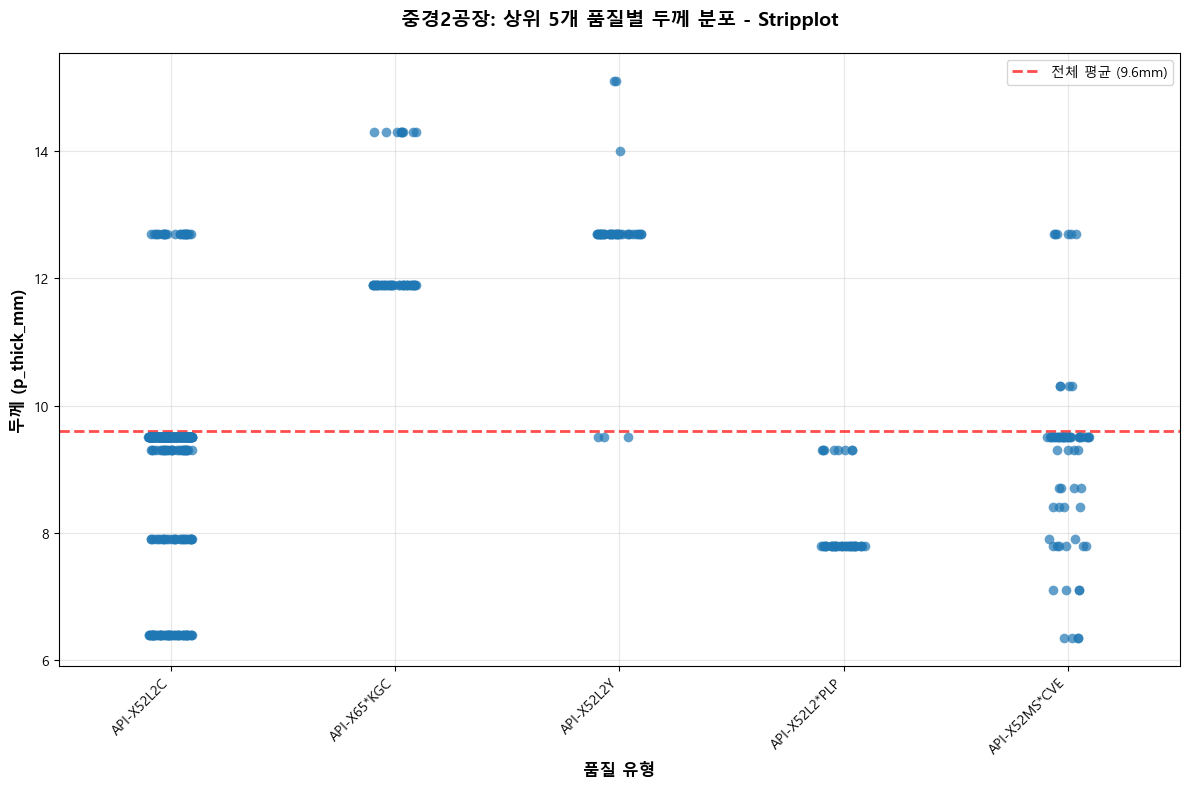


=== 상위 5개 품질별 두께 분석 결과 ===
전체 통계:
- 데이터 포인트: 523개
- 두께 범위: 6.3 ~ 15.1 mm
- 평균 두께: 9.6 mm
- 표준편차: 1.9 mm

각 품질별 상세 통계:

1. API-X52L2C:
   - 개수: 326개
   - 평균: 9.1mm
   - 표준편차: 1.5mm
   - 범위: 6.4 ~ 12.7mm
   - 중앙값: 9.5mm

2. API-X52MS*CVE:
   - 개수: 66개
   - 평균: 9.2mm
   - 표준편차: 1.5mm
   - 범위: 6.3 ~ 12.7mm
   - 중앙값: 9.5mm

3. API-X65*KGC:
   - 개수: 48개
   - 평균: 12.3mm
   - 표준편차: 0.9mm
   - 범위: 11.9 ~ 14.3mm
   - 중앙값: 11.9mm

4. API-X52L2*PLP:
   - 개수: 42개
   - 평균: 8.1mm
   - 표준편차: 0.6mm
   - 범위: 7.8 ~ 9.3mm
   - 중앙값: 7.8mm

5. API-X52L2Y:
   - 개수: 41개
   - 평균: 12.6mm
   - 표준편차: 1.0mm
   - 범위: 9.5 ~ 15.1mm
   - 중앙값: 12.7mm

각 품질별 주요 두께 분포 (상위 5개):

API-X52L2C:
   9.5mm: 195개 (59.8%)
   6.4mm: 51개 (15.6%)
   7.9mm: 28개 (8.6%)
   9.3mm: 28개 (8.6%)
   12.7mm: 24개 (7.4%)

API-X52MS*CVE:
   9.5mm: 28개 (42.4%)
   12.7mm: 6개 (9.1%)
   7.8mm: 6개 (9.1%)
   10.3mm: 4개 (6.1%)
   8.7mm: 4개 (6.1%)

API-X65*KGC:
   11.9mm: 39개 (81.2%)
   14.3mm: 9개 (18.8%)

API-X52L2*PLP:
   7.8mm: 34개 (81.0%)
   9.3mm: 

In [39]:
# 상위 5개 품질로 품질 vs 두께 stripplot 시각화

# 결측치 제거
plot_data = final_clean_data.dropna(subset=['quality', 'p_thick_mm']).copy()

print(f"전체 데이터 개수: {len(plot_data)}")

# 품질별 분포 확인
print(f"\n품질별 데이터 분포:")
quality_counts = plot_data['quality'].value_counts()
print(quality_counts.head(10))

# 상위 5개 품질만 선택
top_5_qualities = quality_counts.head(5).index.tolist()
top_5_data = plot_data[plot_data['quality'].isin(top_5_qualities)]

print(f"\n상위 5개 품질 선택:")
for i, quality in enumerate(top_5_qualities):
    count = len(top_5_data[top_5_data['quality'] == quality])
    print(f"{i+1}. {quality}: {count}개")

print(f"\n최종 시각화 데이터 개수: {len(top_5_data)}")

# 두께 기본 통계
print(f"\n상위 5개 품질의 두께(p_thick_mm) 통계:")
print(top_5_data['p_thick_mm'].describe())

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# Stripplot 생성
sns.stripplot(data=top_5_data, 
              x='quality', 
              y='p_thick_mm',
              size=7,
              alpha=0.7,
              jitter=True)

# 그래프 꾸미기
plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('두께 (p_thick_mm)', fontsize=12, fontweight='bold')
plt.title('중경2공장: 상위 5개 품질별 두께 분포 - Stripplot', 
          fontsize=14, fontweight='bold', pad=20)

# X축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 평균 두께선 추가
mean_thickness = top_5_data['p_thick_mm'].mean()
plt.axhline(y=mean_thickness, color='red', linestyle='--', alpha=0.7, linewidth=2, 
           label=f'전체 평균 ({mean_thickness:.1f}mm)')

# 그리드 추가
plt.grid(True, alpha=0.3)

# 범례 추가
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 상세 분석 결과
print(f"\n=== 상위 5개 품질별 두께 분석 결과 ===")
print(f"전체 통계:")
print(f"- 데이터 포인트: {len(top_5_data)}개")
print(f"- 두께 범위: {top_5_data['p_thick_mm'].min():.1f} ~ {top_5_data['p_thick_mm'].max():.1f} mm")
print(f"- 평균 두께: {mean_thickness:.1f} mm")
print(f"- 표준편차: {top_5_data['p_thick_mm'].std():.1f} mm")

print(f"\n각 품질별 상세 통계:")
for i, quality in enumerate(top_5_qualities):
    quality_data = top_5_data[top_5_data['quality'] == quality]['p_thick_mm']
    print(f"\n{i+1}. {quality}:")
    print(f"   - 개수: {len(quality_data)}개")
    print(f"   - 평균: {quality_data.mean():.1f}mm")
    print(f"   - 표준편차: {quality_data.std():.1f}mm") 
    print(f"   - 범위: {quality_data.min():.1f} ~ {quality_data.max():.1f}mm")
    print(f"   - 중앙값: {quality_data.median():.1f}mm")

# 품질별 주요 두께 분포
print(f"\n각 품질별 주요 두께 분포 (상위 5개):")
for quality in top_5_qualities:
    quality_thickness = top_5_data[top_5_data['quality'] == quality]['p_thick_mm']
    thickness_dist = quality_thickness.value_counts().head(5)
    print(f"\n{quality}:")
    for thickness, count in thickness_dist.items():
        percentage = (count / len(quality_thickness)) * 100
        print(f"   {thickness}mm: {count}개 ({percentage:.1f}%)")

# 전체 데이터에서 가장 많이 사용되는 두께
print(f"\n전체에서 가장 많이 사용되는 두께 (상위 10개):")
overall_thickness = top_5_data['p_thick_mm'].value_counts().head(10)
for thickness, count in overall_thickness.items():
    percentage = (count / len(top_5_data)) * 100
    print(f"{thickness}mm: {count}개 ({percentage:.1f}%)")


전체 데이터 개수: 712

상위 5개 품질 선택:
1. API-X52L2C: 326개
2. API-X52MS*CVE: 66개
3. API-X65*KGC: 48개
4. API-X52L2*PLP: 42개
5. API-X52L2Y: 41개

최종 시각화 데이터 개수: 523


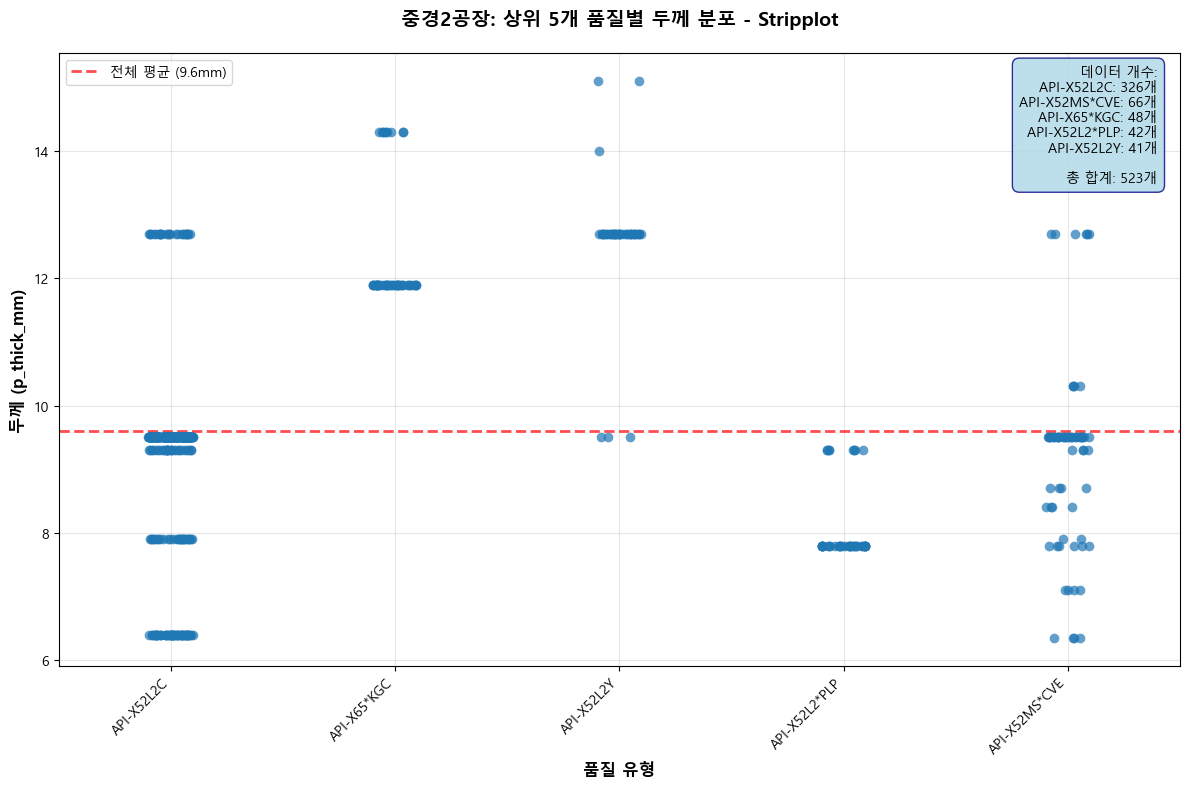


=== 요약 통계 ===
전체 통계:
- 총 데이터 포인트: 523개
- 두께 범위: 6.3 ~ 15.1 mm
- 평균 두께: 9.6 mm
- 표준편차: 1.9 mm

품질별 데이터 분포:
1. API-X52L2C: 326개 (62.3%) - 평균 두께: 9.1mm
2. API-X52MS*CVE: 66개 (12.6%) - 평균 두께: 9.2mm
3. API-X65*KGC: 48개 (9.2%) - 평균 두께: 12.3mm
4. API-X52L2*PLP: 42개 (8.0%) - 평균 두께: 8.1mm
5. API-X52L2Y: 41개 (7.8%) - 평균 두께: 12.6mm


In [40]:
# 상위 5개 품질로 품질 vs 두께 stripplot 시각화 (데이터 개수 박스 포함)

# 결측치 제거
plot_data = final_clean_data.dropna(subset=['quality', 'p_thick_mm']).copy()

print(f"전체 데이터 개수: {len(plot_data)}")

# 품질별 분포 확인
quality_counts = plot_data['quality'].value_counts()

# 상위 5개 품질만 선택
top_5_qualities = quality_counts.head(5).index.tolist()
top_5_data = plot_data[plot_data['quality'].isin(top_5_qualities)]

print(f"\n상위 5개 품질 선택:")
for i, quality in enumerate(top_5_qualities):
    count = len(top_5_data[top_5_data['quality'] == quality])
    print(f"{i+1}. {quality}: {count}개")

print(f"\n최종 시각화 데이터 개수: {len(top_5_data)}")

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# Stripplot 생성
sns.stripplot(data=top_5_data, 
              x='quality', 
              y='p_thick_mm',
              size=7,
              alpha=0.7,
              jitter=True)

# 그래프 꾸미기
plt.xlabel('품질 유형', fontsize=12, fontweight='bold')
plt.ylabel('두께 (p_thick_mm)', fontsize=12, fontweight='bold')
plt.title('중경2공장: 상위 5개 품질별 두께 분포 - Stripplot', 
          fontsize=14, fontweight='bold', pad=20)

# X축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 평균 두께선 추가
mean_thickness = top_5_data['p_thick_mm'].mean()
plt.axhline(y=mean_thickness, color='red', linestyle='--', alpha=0.7, linewidth=2, 
           label=f'전체 평균 ({mean_thickness:.1f}mm)')

# 그리드 추가
plt.grid(True, alpha=0.3)

# 범례 추가
plt.legend()

# 각 품질별 데이터 개수를 오른쪽 상단 박스에 표시
count_text = "데이터 개수:\n"
for i, quality in enumerate(top_5_qualities):
    count = len(top_5_data[top_5_data['quality'] == quality])
    count_text += f"{quality}: {count}개\n"

count_text += f"\n총 합계: {len(top_5_data)}개"

# 텍스트 박스 추가 (오른쪽 상단)
plt.text(0.98, 0.98, count_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', 
                  facecolor='lightblue', 
                  alpha=0.8,
                  edgecolor='navy',
                  linewidth=1))

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 간단한 요약 통계
print(f"\n=== 요약 통계 ===")
print(f"전체 통계:")
print(f"- 총 데이터 포인트: {len(top_5_data)}개")
print(f"- 두께 범위: {top_5_data['p_thick_mm'].min():.1f} ~ {top_5_data['p_thick_mm'].max():.1f} mm")
print(f"- 평균 두께: {mean_thickness:.1f} mm")
print(f"- 표준편차: {top_5_data['p_thick_mm'].std():.1f} mm")

print(f"\n품질별 데이터 분포:")
for i, quality in enumerate(top_5_qualities):
    count = len(top_5_data[top_5_data['quality'] == quality])
    percentage = (count / len(top_5_data)) * 100
    quality_mean = top_5_data[top_5_data['quality'] == quality]['p_thick_mm'].mean()
    print(f"{i+1}. {quality}: {count}개 ({percentage:.1f}%) - 평균 두께: {quality_mean:.1f}mm")


전체 데이터 개수: 712

품종(p_spec)별 데이터 분포:
p_spec
NX52L2T       305
NX52L2        192
NX65KGC        48
NX52MS         47
Z359C2SSCG     41
NX65L2         27
Z359C2         22
NX60L2         12
Z359C2CGCO      8
N5LBT           4
Name: count, dtype: int64

상위 5개 품종 선택:
1. NX52L2T: 305개
2. NX52L2: 192개
3. NX65KGC: 48개
4. NX52MS: 47개
5. Z359C2SSCG: 41개

최종 시각화 데이터 개수: 633

상위 5개 품종의 ys2_stress 통계:
count    633.000000
mean     461.649439
std       31.257153
min      364.796000
25%      436.234000
50%      463.473000
75%      482.232000
max      545.136000
Name: ys2_stress, dtype: float64


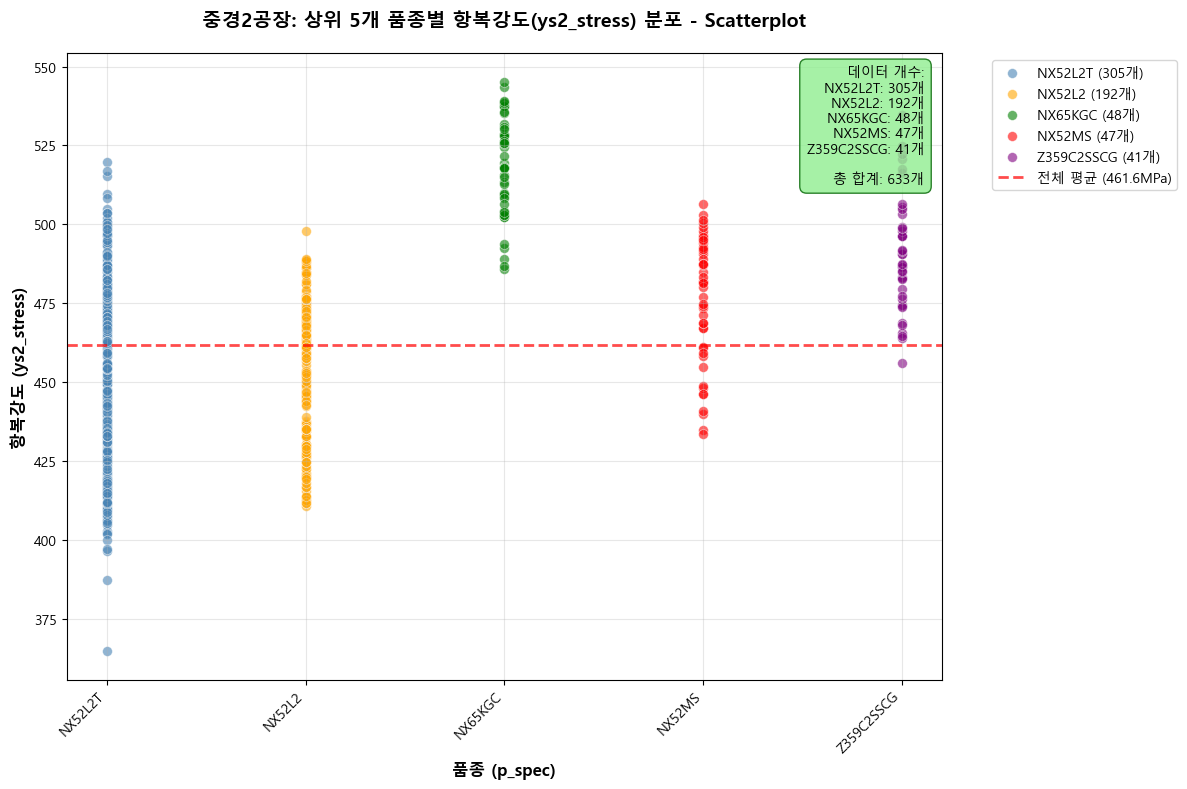


=== 상위 5개 품종별 항복강도 분석 결과 ===
전체 통계:
- 총 데이터 포인트: 633개
- ys2_stress 범위: 364.8 ~ 545.1 MPa
- 평균 항복강도: 461.6 MPa
- 표준편차: 31.3 MPa

각 품종별 상세 통계:

1. NX52L2T:
   - 개수: 305개
   - 평균: 451.2 MPa
   - 표준편차: 28.1 MPa
   - 범위: 364.8 ~ 519.7 MPa
   - 중앙값: 447.1 MPa

2. NX52L2:
   - 개수: 192개
   - 평균: 454.3 MPa
   - 표준편차: 21.6 MPa
   - 범위: 410.8 ~ 497.9 MPa
   - 중앙값: 459.4 MPa

3. NX65KGC:
   - 개수: 48개
   - 평균: 518.8 MPa
   - 표준편차: 15.7 MPa
   - 범위: 485.7 ~ 545.1 MPa
   - 중앙값: 518.8 MPa

4. NX52MS:
   - 개수: 47개
   - 평균: 476.0 MPa
   - 표준편차: 20.2 MPa
   - 범위: 433.5 ~ 506.3 MPa
   - 중앙값: 481.4 MPa

5. Z359C2SSCG:
   - 개수: 41개
   - 평균: 490.7 MPa
   - 표준편차: 18.2 MPa
   - 범위: 456.2 ~ 534.7 MPa
   - 중앙값: 487.4 MPa

품종별 항복강도 분포 구간:
NX52L2T: Q1=431.9, Q3=472.3 (IQR=40.4)
NX52L2: Q1=435.3, Q3=471.4 (IQR=36.1)
NX65KGC: Q1=507.9, Q3=530.5 (IQR=22.6)
NX52MS: Q1=461.0, Q3=492.5 (IQR=31.5)
Z359C2SSCG: Q1=477.3, Q3=499.1 (IQR=21.8)


In [41]:
# 상위 5개 품종(p_spec)별 ys2_stress 분포 scatterplot

# 결측치 제거
spec_data = final_clean_data.dropna(subset=['p_spec', 'ys2_stress']).copy()

print(f"전체 데이터 개수: {len(spec_data)}")

# 품종별 분포 확인
print(f"\n품종(p_spec)별 데이터 분포:")
spec_counts = spec_data['p_spec'].value_counts()
print(spec_counts.head(10))

# 상위 5개 품종만 선택
top_5_specs = spec_counts.head(5).index.tolist()
top_5_spec_data = spec_data[spec_data['p_spec'].isin(top_5_specs)]

print(f"\n상위 5개 품종 선택:")
for i, spec in enumerate(top_5_specs):
    count = len(top_5_spec_data[top_5_spec_data['p_spec'] == spec])
    print(f"{i+1}. {spec}: {count}개")

print(f"\n최종 시각화 데이터 개수: {len(top_5_spec_data)}")

# ys2_stress 기본 통계
print(f"\n상위 5개 품종의 ys2_stress 통계:")
print(top_5_spec_data['ys2_stress'].describe())

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 색상 설정
colors = ['steelblue', 'orange', 'green', 'red', 'purple']

# 각 품종별로 scatterplot 그리기
for i, spec in enumerate(top_5_specs):
    spec_ys_data = top_5_spec_data[top_5_spec_data['p_spec'] == spec]
    plt.scatter([i] * len(spec_ys_data), spec_ys_data['ys2_stress'], 
               alpha=0.6, s=50, c=colors[i], 
               label=f'{spec} ({len(spec_ys_data)}개)', 
               edgecolors='white', linewidth=0.5)

# 그래프 꾸미기
plt.xlabel('품종 (p_spec)', fontsize=12, fontweight='bold')
plt.ylabel('항복강도 (ys2_stress)', fontsize=12, fontweight='bold')
plt.title('중경2공장: 상위 5개 품종별 항복강도(ys2_stress) 분포 - Scatterplot', 
          fontsize=14, fontweight='bold', pad=20)

# X축 설정
plt.xticks(range(len(top_5_specs)), top_5_specs, rotation=45, ha='right')

# 평균 항복강도선 추가
mean_ys2 = top_5_spec_data['ys2_stress'].mean()
plt.axhline(y=mean_ys2, color='red', linestyle='--', alpha=0.7, linewidth=2, 
           label=f'전체 평균 ({mean_ys2:.1f}MPa)')

# 그리드 추가
plt.grid(True, alpha=0.3)

# 범례 추가
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 각 품종별 데이터 개수를 오른쪽 상단 박스에 표시
count_text = "데이터 개수:\n"
for i, spec in enumerate(top_5_specs):
    count = len(top_5_spec_data[top_5_spec_data['p_spec'] == spec])
    count_text += f"{spec}: {count}개\n"

count_text += f"\n총 합계: {len(top_5_spec_data)}개"

# 텍스트 박스 추가 (오른쪽 상단)
plt.text(0.98, 0.98, count_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', 
                  facecolor='lightgreen', 
                  alpha=0.8,
                  edgecolor='darkgreen',
                  linewidth=1))

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 상세 분석 결과
print(f"\n=== 상위 5개 품종별 항복강도 분석 결과 ===")
print(f"전체 통계:")
print(f"- 총 데이터 포인트: {len(top_5_spec_data)}개")
print(f"- ys2_stress 범위: {top_5_spec_data['ys2_stress'].min():.1f} ~ {top_5_spec_data['ys2_stress'].max():.1f} MPa")
print(f"- 평균 항복강도: {mean_ys2:.1f} MPa")
print(f"- 표준편차: {top_5_spec_data['ys2_stress'].std():.1f} MPa")

print(f"\n각 품종별 상세 통계:")
for i, spec in enumerate(top_5_specs):
    spec_ys_data = top_5_spec_data[top_5_spec_data['p_spec'] == spec]['ys2_stress']
    print(f"\n{i+1}. {spec}:")
    print(f"   - 개수: {len(spec_ys_data)}개")
    print(f"   - 평균: {spec_ys_data.mean():.1f} MPa")
    print(f"   - 표준편차: {spec_ys_data.std():.1f} MPa") 
    print(f"   - 범위: {spec_ys_data.min():.1f} ~ {spec_ys_data.max():.1f} MPa")
    print(f"   - 중앙값: {spec_ys_data.median():.1f} MPa")

# 품종별 항복강도 분포 구간 분석
print(f"\n품종별 항복강도 분포 구간:")
for spec in top_5_specs:
    spec_ys_data = top_5_spec_data[top_5_spec_data['p_spec'] == spec]['ys2_stress']
    q1 = spec_ys_data.quantile(0.25)
    q3 = spec_ys_data.quantile(0.75)
    print(f"{spec}: Q1={q1:.1f}, Q3={q3:.1f} (IQR={q3-q1:.1f})")


Stripplot용 데이터:
- 상위 5개 품종: ['NX52L2T', 'NX52L2', 'NX65KGC', 'NX52MS', 'Z359C2SSCG']
- 총 데이터 개수: 633


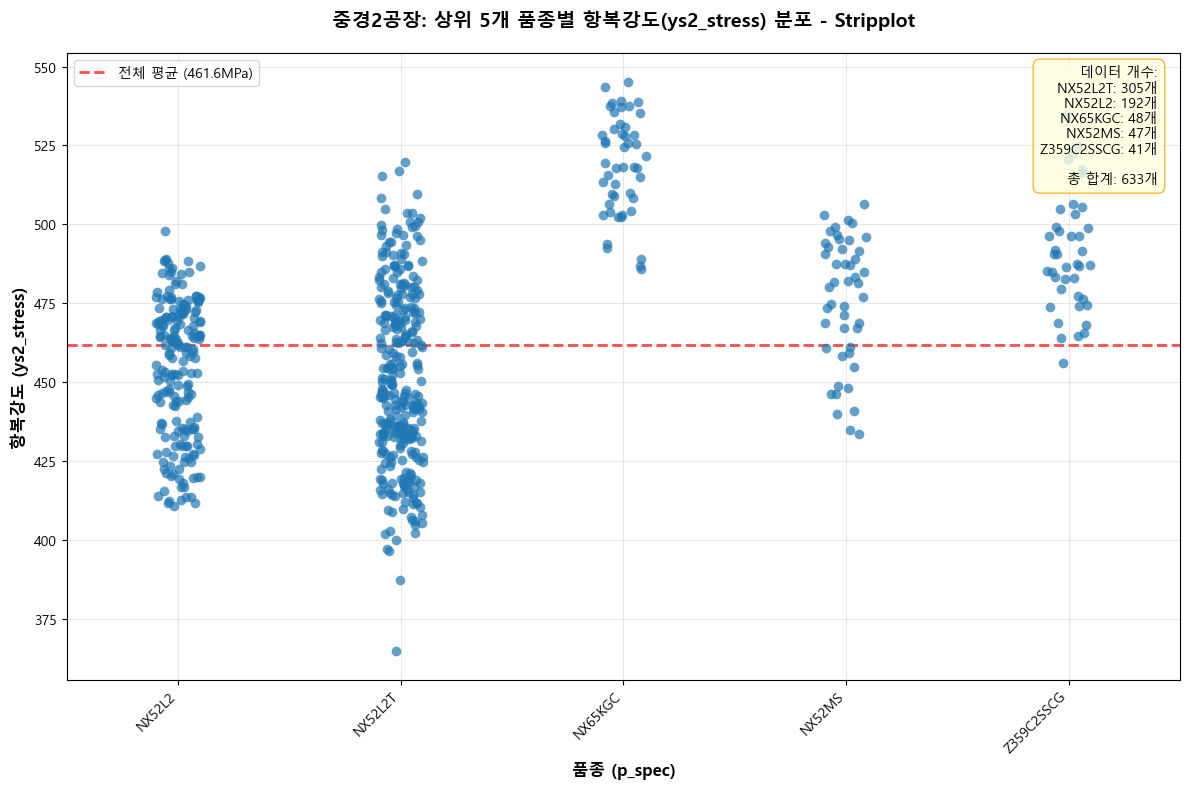


=== Stripplot vs Scatterplot 비교 ===
Stripplot 장점:
- 개별 데이터 포인트의 밀도를 더 명확하게 표시
- Jitter 효과로 겹치는 값들을 분산시켜 모든 데이터 가시화
- 분포의 집중도와 이상치를 더 쉽게 식별

Scatterplot 장점:
- 각 품종별로 색상을 구분하여 시각적 구별 용이
- 범례를 통한 품종별 데이터 개수 직접 확인
- 전통적인 산점도 형태로 익숙한 시각화

=== 품종별 분포 패턴 분석 ===

1. NX52L2T:
   - 데이터 개수: 305개
   - 평균: 451.2 MPa
   - 중앙값: 447.1 MPa
   - 표준편차: 28.1 MPa
   - 비대칭도: 0.10 (우편향)
   - 첨도: -0.60 (평평)
   - 변동계수: 6.2% (일관성 높음)

2. NX52L2:
   - 데이터 개수: 192개
   - 평균: 454.3 MPa
   - 중앙값: 459.4 MPa
   - 표준편차: 21.6 MPa
   - 비대칭도: -0.35 (좌편향)
   - 첨도: -0.98 (평평)
   - 변동계수: 4.8% (일관성 높음)

3. NX65KGC:
   - 데이터 개수: 48개
   - 평균: 518.8 MPa
   - 중앙값: 518.8 MPa
   - 표준편차: 15.7 MPa
   - 비대칭도: -0.36 (좌편향)
   - 첨도: -0.69 (평평)
   - 변동계수: 3.0% (일관성 높음)

4. NX52MS:
   - 데이터 개수: 47개
   - 평균: 476.0 MPa
   - 중앙값: 481.4 MPa
   - 표준편차: 20.2 MPa
   - 비대칭도: -0.55 (좌편향)
   - 첨도: -0.77 (평평)
   - 변동계수: 4.2% (일관성 높음)

5. Z359C2SSCG:
   - 데이터 개수: 41개
   - 평균: 490.7 MPa
   - 중앙값: 487.4 MPa
   - 표준편차: 18.2 MPa
   - 비대칭도: 0.42 (우편향)
   

In [42]:
# 상위 5개 품종(p_spec)별 ys2_stress 분포 stripplot

# 이전 셀에서 준비된 데이터 사용
print(f"Stripplot용 데이터:")
print(f"- 상위 5개 품종: {top_5_specs}")
print(f"- 총 데이터 개수: {len(top_5_spec_data)}")

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# Stripplot 생성
sns.stripplot(data=top_5_spec_data, 
              x='p_spec', 
              y='ys2_stress',
              size=7,
              alpha=0.7,
              jitter=True)

# 그래프 꾸미기
plt.xlabel('품종 (p_spec)', fontsize=12, fontweight='bold')
plt.ylabel('항복강도 (ys2_stress)', fontsize=12, fontweight='bold')
plt.title('중경2공장: 상위 5개 품종별 항복강도(ys2_stress) 분포 - Stripplot', 
          fontsize=14, fontweight='bold', pad=20)

# X축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 평균 항복강도선 추가
mean_ys2 = top_5_spec_data['ys2_stress'].mean()
plt.axhline(y=mean_ys2, color='red', linestyle='--', alpha=0.7, linewidth=2, 
           label=f'전체 평균 ({mean_ys2:.1f}MPa)')

# 그리드 추가
plt.grid(True, alpha=0.3)

# 범례 추가
plt.legend()

# 각 품종별 데이터 개수를 오른쪽 상단 박스에 표시
count_text = "데이터 개수:\n"
for spec in top_5_specs:
    count = len(top_5_spec_data[top_5_spec_data['p_spec'] == spec])
    count_text += f"{spec}: {count}개\n"

count_text += f"\n총 합계: {len(top_5_spec_data)}개"

# 텍스트 박스 추가 (오른쪽 상단)
plt.text(0.98, 0.98, count_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', 
                  facecolor='lightyellow', 
                  alpha=0.8,
                  edgecolor='orange',
                  linewidth=1))

# 레이아웃 조정
plt.tight_layout()
plt.show()

# Stripplot vs Scatterplot 비교 설명
print(f"\n=== Stripplot vs Scatterplot 비교 ===")
print(f"Stripplot 장점:")
print(f"- 개별 데이터 포인트의 밀도를 더 명확하게 표시")
print(f"- Jitter 효과로 겹치는 값들을 분산시켜 모든 데이터 가시화")
print(f"- 분포의 집중도와 이상치를 더 쉽게 식별")

print(f"\nScatterplot 장점:")
print(f"- 각 품종별로 색상을 구분하여 시각적 구별 용이")
print(f"- 범례를 통한 품종별 데이터 개수 직접 확인")
print(f"- 전통적인 산점도 형태로 익숙한 시각화")

# 품종별 항복강도 분포 패턴 분석
print(f"\n=== 품종별 분포 패턴 분석 ===")
for i, spec in enumerate(top_5_specs):
    spec_ys_data = top_5_spec_data[top_5_spec_data['p_spec'] == spec]['ys2_stress']
    
    # 분포 특성 계산
    skewness = spec_ys_data.skew()  # 비대칭도
    kurtosis = spec_ys_data.kurtosis()  # 첨도
    
    print(f"\n{i+1}. {spec}:")
    print(f"   - 데이터 개수: {len(spec_ys_data)}개")
    print(f"   - 평균: {spec_ys_data.mean():.1f} MPa")
    print(f"   - 중앙값: {spec_ys_data.median():.1f} MPa")
    print(f"   - 표준편차: {spec_ys_data.std():.1f} MPa")
    print(f"   - 비대칭도: {skewness:.2f} ({'우편향' if skewness > 0 else '좌편향' if skewness < 0 else '대칭'})")
    print(f"   - 첨도: {kurtosis:.2f} ({'뾰족' if kurtosis > 0 else '평평' if kurtosis < 0 else '정상'})")
    
    # 분포 집중도 분석
    cv = (spec_ys_data.std() / spec_ys_data.mean()) * 100  # 변동계수
    print(f"   - 변동계수: {cv:.1f}% ({'일관성 높음' if cv < 10 else '일관성 보통' if cv < 20 else '일관성 낮음'})")

print(f"\n=== 권장사항 ===")
print(f"두 그래프를 함께 보면서:")
print(f"1. Scatterplot: 품종 간 전체적인 차이 파악")
print(f"2. Stripplot: 각 품종 내 세부적인 분포 패턴 분석")
print(f"3. 이상치나 특이값은 stripplot에서 더 쉽게 발견 가능")


In [2]:
uv run extract_jg1_data.py

Note: you may need to restart the kernel to use updated packages.


c:\Users\DELL\Desktop\jiwoong-data-anal\.venv\Scripts\python.exe: No module named uv
